In [16]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
final_x_set = []
final_y_set = []

In [6]:
epochs = 50000
batch_size = 8
num_neurons = 10
seed = 10

histories={}

np.random.seed(seed)
tf.random.set_seed(seed)

#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
final_x_set.append(X_data)
final_y_set.append(Y_data)

idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

In [3]:
# create training and testing vars
X_data = (X_data- np.mean(X_data, axis=0))/ np.std(X_data, axis=0)
X_train, X_test, Y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=seed)
print (X_train.shape, Y_train.shape)
print (X_test.shape, y_test.shape)

(280, 7) (280, 1)
(120, 7) (120, 1)


## Part B - Question 1

In [4]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mse',min_delta=1e-6, patience=0)

# create a network
model = Sequential([
        Dense(num_neurons, activation='relu'),
        Dense(1)
])

opt = tf.keras.optimizers.SGD(lr=0.001, decay=1e-3)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['qn1'] = model.fit(X_train, Y_train,
                             epochs=epochs,
                             batch_size=batch_size,
                             verbose = 2,
                             callbacks=[callback],
                             validation_data=(X_test, y_test))

Epoch 1/50000
35/35 - 0s - loss: 0.5092 - mse: 0.5092 - val_loss: 0.4560 - val_mse: 0.4560
Epoch 2/50000
35/35 - 0s - loss: 0.4323 - mse: 0.4323 - val_loss: 0.3903 - val_mse: 0.3903
Epoch 3/50000
35/35 - 0s - loss: 0.3737 - mse: 0.3737 - val_loss: 0.3402 - val_mse: 0.3402
Epoch 4/50000
35/35 - 0s - loss: 0.3282 - mse: 0.3282 - val_loss: 0.3009 - val_mse: 0.3009
Epoch 5/50000
35/35 - 0s - loss: 0.2918 - mse: 0.2918 - val_loss: 0.2694 - val_mse: 0.2694
Epoch 6/50000
35/35 - 0s - loss: 0.2626 - mse: 0.2626 - val_loss: 0.2438 - val_mse: 0.2438
Epoch 7/50000
35/35 - 0s - loss: 0.2387 - mse: 0.2387 - val_loss: 0.2228 - val_mse: 0.2228
Epoch 8/50000
35/35 - 0s - loss: 0.2188 - mse: 0.2188 - val_loss: 0.2053 - val_mse: 0.2053
Epoch 9/50000
35/35 - 0s - loss: 0.2023 - mse: 0.2023 - val_loss: 0.1906 - val_mse: 0.1906
Epoch 10/50000
35/35 - 0s - loss: 0.1882 - mse: 0.1882 - val_loss: 0.1781 - val_mse: 0.1781
Epoch 11/50000
35/35 - 0s - loss: 0.1760 - mse: 0.1760 - val_loss: 0.1674 - val_mse: 0.16

35/35 - 0s - loss: 0.0442 - mse: 0.0442 - val_loss: 0.0470 - val_mse: 0.0470
Epoch 91/50000
35/35 - 0s - loss: 0.0439 - mse: 0.0439 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 92/50000
35/35 - 0s - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 93/50000
35/35 - 0s - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 94/50000
35/35 - 0s - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 95/50000
35/35 - 0s - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 96/50000
35/35 - 0s - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0455 - val_mse: 0.0455
Epoch 97/50000
35/35 - 0s - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0453 - val_mse: 0.0453
Epoch 98/50000
35/35 - 0s - loss: 0.0422 - mse: 0.0422 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 99/50000
35/35 - 0s - loss: 0.0419 - mse: 0.0419 - val_loss: 0.0448 - val_mse: 0.0448
Epoch 100/50000
35/35 - 0s - loss: 0.0417 - mse: 0.0417 - val_loss: 0.0446 - val_mse: 0.0446
Ep

Epoch 179/50000
35/35 - 0s - loss: 0.0316 - mse: 0.0316 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 180/50000
35/35 - 0s - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 181/50000
35/35 - 0s - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 182/50000
35/35 - 0s - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 183/50000
35/35 - 0s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 184/50000
35/35 - 0s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 185/50000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 186/50000
35/35 - 0s - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 187/50000
35/35 - 0s - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 188/50000
35/35 - 0s - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 189/50000
35/35 - 0s - loss: 0.0309 - mse: 0.0309 - val_loss: 0.

Epoch 268/50000
35/35 - 0s - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 269/50000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 270/50000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 271/50000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 272/50000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 273/50000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 274/50000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 275/50000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 276/50000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 277/50000
35/35 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 278/50000
35/35 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.

Epoch 357/50000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 358/50000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 359/50000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 360/50000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 361/50000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 362/50000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 363/50000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 364/50000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 365/50000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 366/50000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 367/50000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.

Epoch 446/50000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 447/50000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 448/50000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 449/50000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 450/50000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 451/50000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 452/50000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 453/50000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 454/50000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 455/50000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 456/50000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.

Epoch 535/50000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 536/50000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 537/50000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 538/50000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 539/50000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 540/50000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 541/50000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 542/50000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 543/50000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 544/50000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 545/50000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.

35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 624/50000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 625/50000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 626/50000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 627/50000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 628/50000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 629/50000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 630/50000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 631/50000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 632/50000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 633/50000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 

Epoch 712/50000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 713/50000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 714/50000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 715/50000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 716/50000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 717/50000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 718/50000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 719/50000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 720/50000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 721/50000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 722/50000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.

Epoch 801/50000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 802/50000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 803/50000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 804/50000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 805/50000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 806/50000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 807/50000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 808/50000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 809/50000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 810/50000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 811/50000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.

35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 890/50000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 891/50000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 892/50000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 893/50000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 894/50000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 895/50000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 896/50000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 897/50000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 898/50000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 899/50000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 

Epoch 978/50000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 979/50000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 980/50000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 981/50000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 982/50000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 983/50000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 984/50000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 985/50000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 986/50000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 987/50000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 988/50000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.

Epoch 1066/50000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1067/50000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1068/50000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1069/50000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1070/50000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1071/50000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1072/50000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1073/50000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1074/50000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1075/50000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1076/50000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - v

Epoch 1154/50000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1155/50000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1156/50000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1157/50000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1158/50000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1159/50000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1160/50000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1161/50000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1162/50000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1163/50000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1164/50000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - v

Epoch 1242/50000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1243/50000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1244/50000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1245/50000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1246/50000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1247/50000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1248/50000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1249/50000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1250/50000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1251/50000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1252/50000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - v

Epoch 1330/50000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1331/50000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1332/50000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1333/50000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1334/50000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1335/50000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1336/50000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1337/50000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1338/50000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1339/50000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1340/50000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - v

Epoch 1418/50000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1419/50000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1420/50000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1421/50000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1422/50000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1423/50000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1424/50000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1425/50000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1426/50000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1427/50000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1428/50000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - v

Epoch 1506/50000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1507/50000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1508/50000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1509/50000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1510/50000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1511/50000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1512/50000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1513/50000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1514/50000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1515/50000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1516/50000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - v

Epoch 1594/50000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1595/50000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1596/50000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1597/50000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1598/50000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1599/50000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1600/50000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1601/50000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1602/50000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1603/50000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1604/50000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - v

Epoch 1682/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1683/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1684/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1685/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1686/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1687/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1688/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1689/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1690/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1691/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1692/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - v

35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1770/50000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1771/50000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1772/50000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1773/50000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1774/50000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1775/50000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1776/50000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1777/50000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1778/50000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1779/50000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 -

Epoch 1857/50000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 1858/50000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 1859/50000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 1860/50000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 1861/50000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 1862/50000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 1863/50000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 1864/50000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 1865/50000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 1866/50000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 1867/50000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - v

Epoch 1945/50000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1946/50000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1947/50000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1948/50000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1949/50000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1950/50000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1951/50000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1952/50000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1953/50000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1954/50000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1955/50000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - v

Epoch 2033/50000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2034/50000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2035/50000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2036/50000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2037/50000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2038/50000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2039/50000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2040/50000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2041/50000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2042/50000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2043/50000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - v

35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2121/50000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2122/50000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2123/50000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2124/50000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2125/50000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2126/50000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2127/50000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2128/50000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2129/50000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2130/50000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 -

Epoch 2208/50000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2209/50000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2210/50000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2211/50000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2212/50000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2213/50000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2214/50000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2215/50000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2216/50000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2217/50000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2218/50000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - v

35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2296/50000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2297/50000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2298/50000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2299/50000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2300/50000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2301/50000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2302/50000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2303/50000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2304/50000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2305/50000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 -

Epoch 2383/50000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2384/50000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2385/50000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2386/50000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2387/50000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2388/50000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2389/50000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2390/50000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2391/50000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2392/50000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2393/50000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - v

Epoch 2471/50000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2472/50000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2473/50000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2474/50000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2475/50000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2476/50000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2477/50000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2478/50000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2479/50000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2480/50000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2481/50000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - v

Epoch 2559/50000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2560/50000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2561/50000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2562/50000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2563/50000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2564/50000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2565/50000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2566/50000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2567/50000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2568/50000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2569/50000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - v

35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2647/50000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2648/50000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2649/50000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2650/50000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2651/50000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2652/50000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2653/50000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2654/50000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2655/50000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2656/50000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 -

Epoch 2734/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2735/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2736/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2737/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2738/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2739/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2740/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2741/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2742/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2743/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2744/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - v

Epoch 2822/50000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2823/50000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2824/50000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2825/50000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2826/50000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2827/50000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2828/50000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2829/50000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2830/50000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2831/50000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2832/50000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - v

In [5]:
print(histories['qn1'].history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


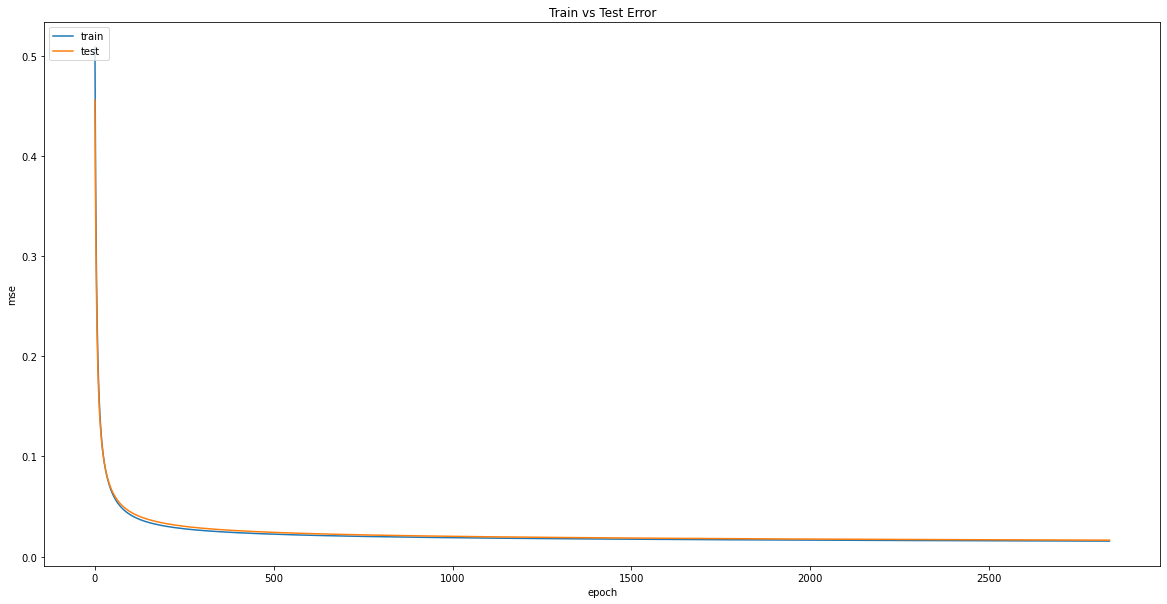

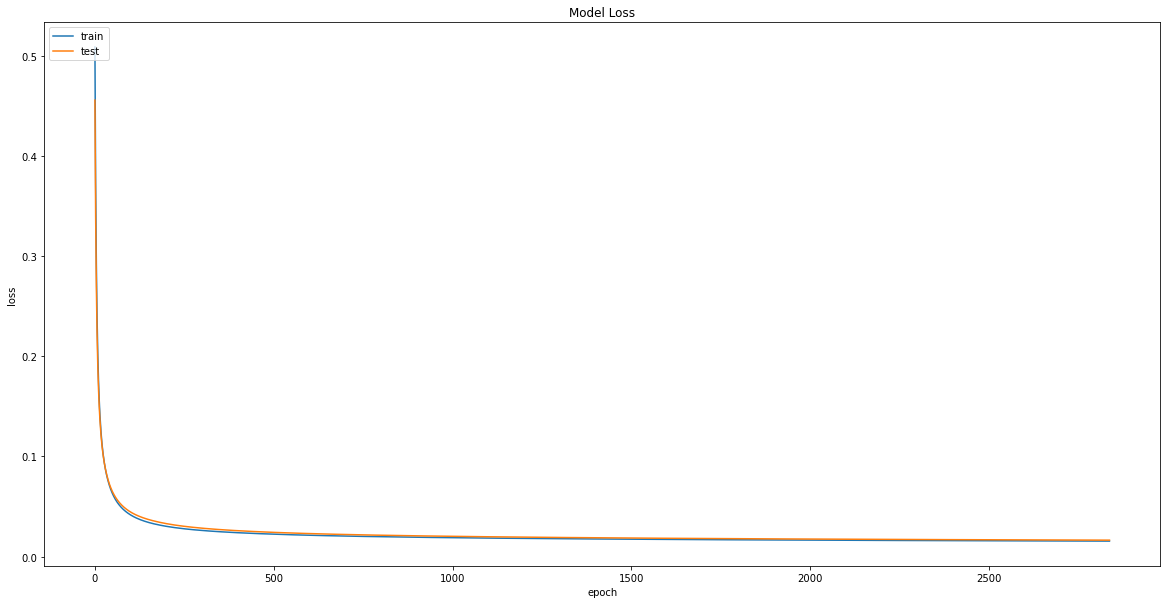

In [6]:
plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['mse'])
plt.plot(histories['qn1'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
y_pred = model.predict(X_test)

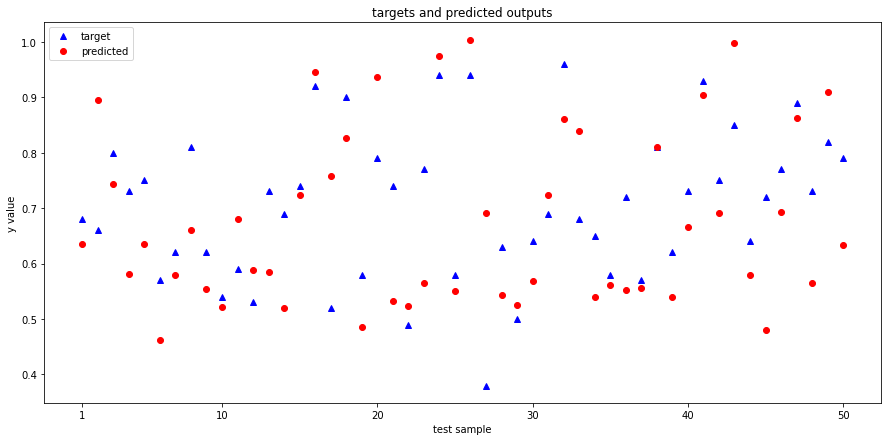

In [8]:
plt.figure(figsize=(15,7))
for i in range(0,50):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, y_pred[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40,50])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

## Part B - Question 2

## Remove 1 Input

In [7]:
epochs = 3000
batch_size = 8
num_neurons = 10
seed = 10

histories={}
x_sets = []
y_sets = []

np.random.seed(seed)
tf.random.set_seed(seed)

#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')

X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[2,3,4,5,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,3,4,5,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,4,5,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)
final_x_set.append(X_data)
final_y_set.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,3,5,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,3,4,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,3,4,5,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,3,4,5,6]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

[[299.   100.     2.   ...   3.5    7.88   0.  ]
 [310.   102.     3.   ...   4.     8.02   1.  ]
 [324.   110.     3.   ...   4.     8.87   1.  ]
 ...
 [329.   113.     5.   ...   4.5    9.45   1.  ]
 [322.   104.     3.   ...   4.     8.84   1.  ]
 [324.   111.     4.   ...   3.     9.01   1.  ]]
[[ 92.     1.     2.     2.     7.88   0.  ]
 [108.     3.     3.5    3.5    8.22   0.  ]
 [112.     4.     4.     4.     9.     1.  ]
 ...
 [106.     2.     2.5    2.5    8.     0.  ]
 [110.     3.     3.5    2.5    8.67   1.  ]
 [ 96.     2.     2.5    1.5    7.89   0.  ]]
[[311.     3.     3.5    3.     8.45   1.  ]
 [324.     4.     3.     3.     9.01   1.  ]
 [312.     2.     2.5    3.     8.12   0.  ]
 ...
 [312.     3.     3.5    4.     8.78   0.  ]
 [316.     3.     3.     3.5    8.     1.  ]
 [330.     5.     5.     4.     9.31   1.  ]]
[[308.   108.     3.5    3.5    8.22   0.  ]
 [324.   100.     4.     5.     8.64   1.  ]
 [326.   111.     4.5    4.     9.23   1.  ]
 ...
 [295.  

In [96]:
len(x_sets)

8

In [97]:
features_acc = []

for i in range(0,8):
    # create training and testing vars
    print("dataset " + str(i))
    x_sets[i] = (x_sets[i]- np.mean(x_sets[i], axis=0))/ np.std(x_sets[i], axis=0)
    X_train, X_test, Y_train, y_test = train_test_split(x_sets[i], y_sets[i], test_size=0.3, random_state=seed)
    print (X_train.shape, Y_train.shape)
    print (X_test.shape, y_test.shape)
    
    # create a network
    model = Sequential([
            Dense(num_neurons, activation='relu'),
            Dense(1)
    ])

    opt = tf.keras.optimizers.SGD(lr=0.001, decay=1e-3)

    model.compile(optimizer=opt,
                  loss="mean_squared_error",
                  metrics=['mse'])

    # learn the network
    histories['qn2_{}'.format(i)] = model.fit(X_train, Y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 verbose = 2,
                                 validation_data=(X_test, y_test))
    
    features_acc.append(histories['qn2_{}'.format(i)].history['val_mse'][epochs-1])

dataset 0
(280, 7) (280, 1)
(120, 7) (120, 1)
Epoch 1/3000
35/35 - 0s - loss: 0.5092 - mse: 0.5092 - val_loss: 0.4560 - val_mse: 0.4560
Epoch 2/3000
35/35 - 0s - loss: 0.4323 - mse: 0.4323 - val_loss: 0.3903 - val_mse: 0.3903
Epoch 3/3000
35/35 - 0s - loss: 0.3737 - mse: 0.3737 - val_loss: 0.3402 - val_mse: 0.3402
Epoch 4/3000
35/35 - 0s - loss: 0.3282 - mse: 0.3282 - val_loss: 0.3009 - val_mse: 0.3009
Epoch 5/3000
35/35 - 0s - loss: 0.2918 - mse: 0.2918 - val_loss: 0.2694 - val_mse: 0.2694
Epoch 6/3000
35/35 - 0s - loss: 0.2626 - mse: 0.2626 - val_loss: 0.2438 - val_mse: 0.2438
Epoch 7/3000
35/35 - 0s - loss: 0.2387 - mse: 0.2387 - val_loss: 0.2228 - val_mse: 0.2228
Epoch 8/3000
35/35 - 0s - loss: 0.2188 - mse: 0.2188 - val_loss: 0.2053 - val_mse: 0.2053
Epoch 9/3000
35/35 - 0s - loss: 0.2023 - mse: 0.2023 - val_loss: 0.1906 - val_mse: 0.1906
Epoch 10/3000
35/35 - 0s - loss: 0.1882 - mse: 0.1882 - val_loss: 0.1781 - val_mse: 0.1781
Epoch 11/3000
35/35 - 0s - loss: 0.1760 - mse: 0.1760

Epoch 89/3000
35/35 - 0s - loss: 0.0444 - mse: 0.0444 - val_loss: 0.0473 - val_mse: 0.0473
Epoch 90/3000
35/35 - 0s - loss: 0.0442 - mse: 0.0442 - val_loss: 0.0470 - val_mse: 0.0470
Epoch 91/3000
35/35 - 0s - loss: 0.0439 - mse: 0.0439 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 92/3000
35/35 - 0s - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 93/3000
35/35 - 0s - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 94/3000
35/35 - 0s - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 95/3000
35/35 - 0s - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 96/3000
35/35 - 0s - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0455 - val_mse: 0.0455
Epoch 97/3000
35/35 - 0s - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0453 - val_mse: 0.0453
Epoch 98/3000
35/35 - 0s - loss: 0.0422 - mse: 0.0422 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 99/3000
35/35 - 0s - loss: 0.0419 - mse: 0.0419 - val_loss: 0.0448 - val_mse: 0.0448

Epoch 179/3000
35/35 - 0s - loss: 0.0316 - mse: 0.0316 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 180/3000
35/35 - 0s - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 181/3000
35/35 - 0s - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 182/3000
35/35 - 0s - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 183/3000
35/35 - 0s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 184/3000
35/35 - 0s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 185/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 186/3000
35/35 - 0s - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 187/3000
35/35 - 0s - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 188/3000
35/35 - 0s - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 189/3000
35/35 - 0s - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0337 - val_

35/35 - 0s - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 269/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 270/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 271/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 272/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 273/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 274/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 275/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 276/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 277/3000
35/35 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 278/3000
35/35 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0291 - val_mse: 0.0291
Epo

Epoch 358/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 359/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 360/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 361/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 362/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 363/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 364/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 365/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 366/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 367/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 368/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0265 - val_

35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 448/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 449/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 450/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 451/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 452/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 453/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 454/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 455/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 456/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 457/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0248 - val_mse: 0.0248
Epo

Epoch 537/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 538/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 539/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 540/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 541/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 542/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 543/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 544/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 545/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 546/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 547/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0235 - val_

35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 627/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 628/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 629/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 630/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 631/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 632/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 633/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 634/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 635/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 636/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0226 - val_mse: 0.0226
Epo

Epoch 716/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 717/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 718/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 719/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 720/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 721/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 722/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 723/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 724/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 725/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 726/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_

35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 806/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 807/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 808/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 809/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 810/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 811/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 812/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 813/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 814/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 815/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epo

Epoch 895/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 896/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 897/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 898/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 899/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 900/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 901/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 902/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 903/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 904/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 905/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0206 - val_

35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 985/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 986/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 987/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 988/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 989/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 990/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 991/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 992/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 993/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 994/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_mse: 0.0202
Epo

Epoch 1073/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1074/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1075/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1076/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1077/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1078/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1079/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1080/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1081/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1082/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1083/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.

35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1162/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1163/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1164/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1165/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1166/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1167/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1168/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1169/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1170/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1171/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 

Epoch 1250/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1251/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1252/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1253/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1254/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1255/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1256/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1257/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1258/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1259/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1260/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.

35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1339/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1340/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1341/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1342/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1343/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1344/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1345/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1346/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1347/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1348/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 

Epoch 1427/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1428/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1429/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1430/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1431/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1432/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1433/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1434/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1435/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1436/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1437/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.

Epoch 1516/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1517/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1518/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1519/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1520/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1521/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1522/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1523/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1524/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1525/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1526/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.

35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1605/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1606/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1607/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1608/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1609/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1610/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1611/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1612/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1613/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1614/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0182 - val_mse: 

Epoch 1693/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1694/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1695/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1696/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1697/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1698/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1699/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1700/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1701/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1702/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1703/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.

35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1782/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1783/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1784/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1785/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1786/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1787/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1788/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1789/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1790/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1791/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 

Epoch 1870/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 1871/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1872/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1873/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1874/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1875/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1876/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1877/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1878/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1879/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1880/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.

35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1959/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1960/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1961/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1962/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1963/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1964/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1965/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1966/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1967/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1968/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 

Epoch 2047/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2048/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2049/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2050/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2051/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2052/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2053/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2054/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2055/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2056/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2057/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.

35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2136/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2137/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2138/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2139/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2140/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2141/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2142/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2143/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2144/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2145/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 

Epoch 2224/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2225/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2226/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2227/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2228/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2229/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2230/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2231/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2232/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2233/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2234/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.

35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2313/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2314/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2315/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2316/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2317/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2318/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2319/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2320/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2321/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2322/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 

Epoch 2401/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2402/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2403/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2404/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2405/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2406/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2407/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2408/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2409/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2410/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2411/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.

35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2490/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2491/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2492/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2493/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2494/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2495/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2496/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2497/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2498/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2499/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 

Epoch 2578/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2579/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2580/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2581/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2582/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2583/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2584/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2585/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2586/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2587/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2588/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.

35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2667/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2668/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2669/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2670/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2671/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2672/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2673/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2674/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2675/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2676/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 

Epoch 2755/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2756/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2757/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2758/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2759/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2760/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2761/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2762/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2763/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2764/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2765/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.

Epoch 2844/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2845/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2846/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2847/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2848/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2849/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2850/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2851/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2852/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2853/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2854/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.

35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2933/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2934/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2935/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2936/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2937/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2938/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2939/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2940/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2941/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2942/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0162 - val_mse: 

Epoch 19/3000
35/35 - 0s - loss: 0.1136 - mse: 0.1136 - val_loss: 0.1256 - val_mse: 0.1256
Epoch 20/3000
35/35 - 0s - loss: 0.1114 - mse: 0.1114 - val_loss: 0.1234 - val_mse: 0.1234
Epoch 21/3000
35/35 - 0s - loss: 0.1093 - mse: 0.1093 - val_loss: 0.1213 - val_mse: 0.1213
Epoch 22/3000
35/35 - 0s - loss: 0.1073 - mse: 0.1073 - val_loss: 0.1192 - val_mse: 0.1192
Epoch 23/3000
35/35 - 0s - loss: 0.1054 - mse: 0.1054 - val_loss: 0.1173 - val_mse: 0.1173
Epoch 24/3000
35/35 - 0s - loss: 0.1036 - mse: 0.1036 - val_loss: 0.1155 - val_mse: 0.1155
Epoch 25/3000
35/35 - 0s - loss: 0.1019 - mse: 0.1019 - val_loss: 0.1138 - val_mse: 0.1138
Epoch 26/3000
35/35 - 0s - loss: 0.1003 - mse: 0.1003 - val_loss: 0.1121 - val_mse: 0.1121
Epoch 27/3000
35/35 - 0s - loss: 0.0987 - mse: 0.0987 - val_loss: 0.1105 - val_mse: 0.1105
Epoch 28/3000
35/35 - 0s - loss: 0.0972 - mse: 0.0972 - val_loss: 0.1090 - val_mse: 0.1090
Epoch 29/3000
35/35 - 0s - loss: 0.0958 - mse: 0.0958 - val_loss: 0.1076 - val_mse: 0.1076

Epoch 109/3000
35/35 - 0s - loss: 0.0546 - mse: 0.0546 - val_loss: 0.0635 - val_mse: 0.0635
Epoch 110/3000
35/35 - 0s - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 111/3000
35/35 - 0s - loss: 0.0542 - mse: 0.0542 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 112/3000
35/35 - 0s - loss: 0.0540 - mse: 0.0540 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 113/3000
35/35 - 0s - loss: 0.0538 - mse: 0.0538 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 114/3000
35/35 - 0s - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 115/3000
35/35 - 0s - loss: 0.0535 - mse: 0.0535 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 116/3000
35/35 - 0s - loss: 0.0533 - mse: 0.0533 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 117/3000
35/35 - 0s - loss: 0.0531 - mse: 0.0531 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 118/3000
35/35 - 0s - loss: 0.0529 - mse: 0.0529 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 119/3000
35/35 - 0s - loss: 0.0527 - mse: 0.0527 - val_loss: 0.0614 - val_

35/35 - 0s - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 199/3000
35/35 - 0s - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0506 - val_mse: 0.0506
Epoch 200/3000
35/35 - 0s - loss: 0.0437 - mse: 0.0437 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 201/3000
35/35 - 0s - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0504 - val_mse: 0.0504
Epoch 202/3000
35/35 - 0s - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0503 - val_mse: 0.0503
Epoch 203/3000
35/35 - 0s - loss: 0.0435 - mse: 0.0435 - val_loss: 0.0503 - val_mse: 0.0503
Epoch 204/3000
35/35 - 0s - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0502 - val_mse: 0.0502
Epoch 205/3000
35/35 - 0s - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0501 - val_mse: 0.0501
Epoch 206/3000
35/35 - 0s - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0500 - val_mse: 0.0500
Epoch 207/3000
35/35 - 0s - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0499 - val_mse: 0.0499
Epoch 208/3000
35/35 - 0s - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0498 - val_mse: 0.0498
Epo

Epoch 288/3000
35/35 - 0s - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 289/3000
35/35 - 0s - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 290/3000
35/35 - 0s - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 291/3000
35/35 - 0s - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 292/3000
35/35 - 0s - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 293/3000
35/35 - 0s - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0444 - val_mse: 0.0444
Epoch 294/3000
35/35 - 0s - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0444 - val_mse: 0.0444
Epoch 295/3000
35/35 - 0s - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 296/3000
35/35 - 0s - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 297/3000
35/35 - 0s - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 298/3000
35/35 - 0s - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0442 - val_

35/35 - 0s - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 378/3000
35/35 - 0s - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 379/3000
35/35 - 0s - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 380/3000
35/35 - 0s - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 381/3000
35/35 - 0s - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 382/3000
35/35 - 0s - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 383/3000
35/35 - 0s - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 384/3000
35/35 - 0s - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 385/3000
35/35 - 0s - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 386/3000
35/35 - 0s - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 387/3000
35/35 - 0s - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0407 - val_mse: 0.0407
Epo

Epoch 467/3000
35/35 - 0s - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 468/3000
35/35 - 0s - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 469/3000
35/35 - 0s - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 470/3000
35/35 - 0s - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 471/3000
35/35 - 0s - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 472/3000
35/35 - 0s - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 473/3000
35/35 - 0s - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 474/3000
35/35 - 0s - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 475/3000
35/35 - 0s - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 476/3000
35/35 - 0s - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 477/3000
35/35 - 0s - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0382 - val_

35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 557/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 558/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 559/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 560/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 561/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 562/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 563/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 564/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 565/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 566/3000
35/35 - 0s - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0364 - val_mse: 0.0364
Epo

Epoch 646/3000
35/35 - 0s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 647/3000
35/35 - 0s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 648/3000
35/35 - 0s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 649/3000
35/35 - 0s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 650/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 651/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 652/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 653/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 654/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 655/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 656/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0349 - val_

35/35 - 0s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 736/3000
35/35 - 0s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 737/3000
35/35 - 0s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 738/3000
35/35 - 0s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 739/3000
35/35 - 0s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 740/3000
35/35 - 0s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 741/3000
35/35 - 0s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 742/3000
35/35 - 0s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 743/3000
35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 744/3000
35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 745/3000
35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0337 - val_mse: 0.0337
Epo

Epoch 825/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 826/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 827/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 828/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 829/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 830/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 831/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 832/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 833/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 834/3000
35/35 - 0s - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 835/3000
35/35 - 0s - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0327 - val_

35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 915/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 916/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 917/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 918/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 919/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 920/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 921/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 922/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 923/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 924/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0319 - val_mse: 0.0319
Epo

Epoch 1004/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 1005/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 1006/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 1007/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 1008/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 1009/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 1010/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 1011/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 1012/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 1013/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 1014/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.

35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 1093/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 1094/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 1095/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 1096/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 1097/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 1098/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 1099/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 1100/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 1101/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 1102/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0305 - val_mse: 

Epoch 1181/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1182/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1183/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1184/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1185/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1186/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1187/3000
35/35 - 0s - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1188/3000
35/35 - 0s - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1189/3000
35/35 - 0s - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1190/3000
35/35 - 0s - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1191/3000
35/35 - 0s - loss: 0.0272 - mse: 0.0272 - val_loss: 0.

35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 1270/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 1271/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 1272/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 1273/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 1274/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 1275/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 1276/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 1277/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 1278/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 1279/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0295 - val_mse: 

Epoch 1358/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1359/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1360/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1361/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1362/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1363/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1364/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1365/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1366/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1367/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1368/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.

35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 1447/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 1448/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 1449/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 1450/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 1451/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 1452/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 1453/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 1454/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 1455/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 1456/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0286 - val_mse: 

Epoch 1535/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1536/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1537/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1538/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1539/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1540/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1541/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1542/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1543/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1544/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1545/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.

35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 1624/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 1625/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 1626/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 1627/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 1628/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 1629/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 1630/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 1631/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 1632/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 1633/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0278 - val_mse: 

Epoch 1712/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 1713/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 1714/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 1715/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 1716/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 1717/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 1718/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 1719/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 1720/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 1721/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 1722/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.

35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1801/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1802/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1803/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1804/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1805/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1806/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1807/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1808/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1809/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1810/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0272 - val_mse: 

Epoch 1889/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1890/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1891/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1892/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1893/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1894/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1895/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1896/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1897/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1898/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1899/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.

35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1978/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1979/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1980/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1981/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1982/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1983/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1984/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1985/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 1986/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 1987/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0266 - val_mse: 

Epoch 2066/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 2067/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 2068/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 2069/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 2070/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 2071/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 2072/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 2073/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 2074/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 2075/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 2076/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.

35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2155/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2156/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2157/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2158/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2159/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2160/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2161/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2162/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2163/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2164/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0262 - val_mse: 

Epoch 2243/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2244/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2245/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2246/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2247/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2248/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2249/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2250/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2251/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 2252/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 2253/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.

Epoch 2332/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 2333/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 2334/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 2335/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 2336/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 2337/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 2338/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 2339/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 2340/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 2341/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 2342/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.

Epoch 2421/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 2422/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 2423/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 2424/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 2425/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 2426/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 2427/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 2428/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 2429/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 2430/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 2431/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.

35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 2510/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 2511/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 2512/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 2513/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 2514/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 2515/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 2516/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 2517/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 2518/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 2519/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0254 - val_mse: 

Epoch 2598/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 2599/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 2600/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 2601/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 2602/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 2603/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 2604/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 2605/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 2606/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 2607/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 2608/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.

35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 2687/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 2688/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 2689/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 2690/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 2691/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 2692/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 2693/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 2694/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 2695/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 2696/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0250 - val_mse: 

Epoch 2775/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 2776/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 2777/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 2778/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 2779/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 2780/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 2781/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 2782/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 2783/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 2784/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 2785/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.

35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 2864/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 2865/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 2866/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 2867/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 2868/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 2869/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 2870/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 2871/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 2872/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 2873/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0247 - val_mse: 

Epoch 2952/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 2953/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 2954/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 2955/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 2956/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 2957/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 2958/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 2959/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 2960/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 2961/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 2962/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.

Epoch 39/3000
35/35 - 0s - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0598 - val_mse: 0.0598
Epoch 40/3000
35/35 - 0s - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0592 - val_mse: 0.0592
Epoch 41/3000
35/35 - 0s - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0586 - val_mse: 0.0586
Epoch 42/3000
35/35 - 0s - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 43/3000
35/35 - 0s - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0575 - val_mse: 0.0575
Epoch 44/3000
35/35 - 0s - loss: 0.0575 - mse: 0.0575 - val_loss: 0.0570 - val_mse: 0.0570
Epoch 45/3000
35/35 - 0s - loss: 0.0571 - mse: 0.0571 - val_loss: 0.0565 - val_mse: 0.0565
Epoch 46/3000
35/35 - 0s - loss: 0.0566 - mse: 0.0566 - val_loss: 0.0560 - val_mse: 0.0560
Epoch 47/3000
35/35 - 0s - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0555 - val_mse: 0.0555
Epoch 48/3000
35/35 - 0s - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0551 - val_mse: 0.0551
Epoch 49/3000
35/35 - 0s - loss: 0.0553 - mse: 0.0553 - val_loss: 0.0546 - val_mse: 0.0546

Epoch 129/3000
35/35 - 0s - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 130/3000
35/35 - 0s - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 131/3000
35/35 - 0s - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 132/3000
35/35 - 0s - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 133/3000
35/35 - 0s - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 134/3000
35/35 - 0s - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 135/3000
35/35 - 0s - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 136/3000
35/35 - 0s - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 137/3000
35/35 - 0s - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 138/3000
35/35 - 0s - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 139/3000
35/35 - 0s - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0361 - val_

35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 219/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 220/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 221/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 222/3000
35/35 - 0s - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 223/3000
35/35 - 0s - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 224/3000
35/35 - 0s - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 225/3000
35/35 - 0s - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 226/3000
35/35 - 0s - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 227/3000
35/35 - 0s - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 228/3000
35/35 - 0s - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0302 - val_mse: 0.0302
Epo

Epoch 308/3000
35/35 - 0s - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0274 - val_mse: 0.0274
Epoch 309/3000
35/35 - 0s - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0274 - val_mse: 0.0274
Epoch 310/3000
35/35 - 0s - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 311/3000
35/35 - 0s - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 312/3000
35/35 - 0s - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 313/3000
35/35 - 0s - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 314/3000
35/35 - 0s - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 315/3000
35/35 - 0s - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 316/3000
35/35 - 0s - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 317/3000
35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 318/3000
35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0271 - val_

35/35 - 0s - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 398/3000
35/35 - 0s - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 399/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 400/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 401/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 402/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 403/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 404/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 405/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 406/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 407/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0252 - val_mse: 0.0252
Epo

Epoch 487/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 488/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 489/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 490/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 491/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 492/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 493/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 494/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 495/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 496/3000
35/35 - 0s - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 497/3000
35/35 - 0s - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0238 - val_

Epoch 577/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 578/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 579/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 580/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 581/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 582/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 583/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 584/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 585/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 586/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 587/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0228 - val_

35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 667/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 668/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 669/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 670/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 671/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 672/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 673/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 674/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 675/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 676/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0220 - val_mse: 0.0220
Epo

Epoch 756/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 757/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 758/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 759/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 760/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 761/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 762/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 763/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 764/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 765/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 766/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0213 - val_

35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 846/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 847/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 848/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 849/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 850/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 851/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 852/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 853/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 854/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 855/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0207 - val_mse: 0.0207
Epo

Epoch 935/3000
35/35 - 0s - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 936/3000
35/35 - 0s - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 937/3000
35/35 - 0s - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 938/3000
35/35 - 0s - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 939/3000
35/35 - 0s - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 940/3000
35/35 - 0s - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 941/3000
35/35 - 0s - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 942/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 943/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 944/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 945/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0203 - val_

Epoch 1024/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1025/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1026/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1027/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1028/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1029/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1030/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1031/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1032/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1033/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1034/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.

35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1113/3000
35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1114/3000
35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1115/3000
35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1116/3000
35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1117/3000
35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1118/3000
35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1119/3000
35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1120/3000
35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1121/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1122/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0195 - val_mse: 

Epoch 1201/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1202/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1203/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1204/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1205/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1206/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1207/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 1208/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 1209/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 1210/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 1211/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.

35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1290/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1291/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1292/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1293/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1294/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1295/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1296/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1297/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1298/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1299/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0188 - val_mse: 

Epoch 1378/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1379/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1380/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1381/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1382/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1383/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1384/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1385/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1386/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1387/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1388/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.

35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1467/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1468/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1469/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1470/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1471/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1472/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1473/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1474/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1475/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1476/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0184 - val_mse: 

Epoch 1555/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1556/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1557/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1558/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1559/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1560/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1561/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1562/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1563/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1564/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1565/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.

35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1644/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1645/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1646/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1647/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1648/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1649/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1650/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 1651/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 1652/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 1653/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0179 - val_mse: 

Epoch 1732/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1733/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1734/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1735/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1736/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1737/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1738/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1739/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1740/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1741/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1742/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.

35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1821/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1822/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1823/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1824/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1825/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1826/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1827/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1828/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1829/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1830/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0176 - val_mse: 

Epoch 1909/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1910/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1911/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1912/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1913/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1914/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1915/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1916/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1917/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1918/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1919/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.

Epoch 1998/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1999/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2000/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2001/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2002/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2003/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2004/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2005/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2006/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2007/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2008/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.

Epoch 2087/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2088/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2089/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2090/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2091/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2092/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2093/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2094/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2095/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2096/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2097/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.

35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2176/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2177/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2178/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2179/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2180/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2181/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2182/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2183/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2184/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2185/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0170 - val_mse: 

Epoch 2264/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2265/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2266/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2267/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2268/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2269/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2270/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2271/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2272/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2273/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2274/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.

35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2353/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2354/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2355/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2356/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2357/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2358/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2359/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2360/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2361/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2362/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0168 - val_mse: 

Epoch 2441/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2442/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2443/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2444/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2445/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2446/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2447/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2448/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2449/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2450/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2451/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.

35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2530/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2531/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2532/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2533/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2534/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2535/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2536/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2537/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2538/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2539/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0165 - val_mse: 

Epoch 2618/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2619/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2620/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2621/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2622/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2623/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2624/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2625/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2626/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2627/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2628/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.

35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2707/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2708/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2709/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2710/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2711/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2712/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2713/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2714/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2715/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2716/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0163 - val_mse: 

Epoch 2795/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2796/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2797/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2798/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2799/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2800/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2801/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2802/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2803/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2804/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2805/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.

35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2884/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2885/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2886/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2887/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2888/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2889/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2890/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2891/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2892/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2893/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0162 - val_mse: 

Epoch 2972/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2973/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2974/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2975/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2976/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2977/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2978/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2979/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2980/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2981/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2982/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.

Epoch 61/3000
35/35 - 0s - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 62/3000
35/35 - 0s - loss: 0.0479 - mse: 0.0479 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 63/3000
35/35 - 0s - loss: 0.0476 - mse: 0.0476 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 64/3000
35/35 - 0s - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 65/3000
35/35 - 0s - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 66/3000
35/35 - 0s - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 67/3000
35/35 - 0s - loss: 0.0463 - mse: 0.0463 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 68/3000
35/35 - 0s - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 69/3000
35/35 - 0s - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 70/3000
35/35 - 0s - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 71/3000
35/35 - 0s - loss: 0.0450 - mse: 0.0450 - val_loss: 0.0342 - val_mse: 0.0342

Epoch 151/3000
35/35 - 0s - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 152/3000
35/35 - 0s - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 153/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 154/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 155/3000
35/35 - 0s - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 156/3000
35/35 - 0s - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 157/3000
35/35 - 0s - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 158/3000
35/35 - 0s - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 159/3000
35/35 - 0s - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 160/3000
35/35 - 0s - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 161/3000
35/35 - 0s - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0247 - val_

35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 241/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 242/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 243/3000
35/35 - 0s - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 244/3000
35/35 - 0s - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 245/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 246/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 247/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 248/3000
35/35 - 0s - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 249/3000
35/35 - 0s - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 250/3000
35/35 - 0s - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0214 - val_mse: 0.0214
Epo

Epoch 330/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 331/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 332/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 333/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 334/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 335/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 336/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 337/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 338/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 339/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 340/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0197 - val_

35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 420/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 421/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 422/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 423/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 424/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 425/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 426/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 427/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 428/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 429/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0187 - val_mse: 0.0187
Epo

Epoch 509/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 510/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 511/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 512/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 513/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 514/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 515/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 516/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 517/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 518/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 519/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0180 - val_

35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 599/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 600/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 601/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 602/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 603/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 604/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 605/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 606/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 607/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 608/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0175 - val_mse: 0.0175
Epo

Epoch 688/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 689/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 690/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 691/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 692/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 693/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 694/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 695/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 696/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 697/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 698/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0171 - val_

35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 778/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 779/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 780/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 781/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 782/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 783/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 784/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 785/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 786/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 787/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0168 - val_mse: 0.0168
Epo

Epoch 867/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 868/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 869/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 870/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 871/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 872/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 873/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 874/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 875/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 876/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 877/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0165 - val_

35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 957/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 958/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 959/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 960/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 961/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 962/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 963/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 964/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 965/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 966/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0163 - val_mse: 0.0163
Epo

Epoch 1045/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1046/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1047/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1048/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1049/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1050/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1051/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1052/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1053/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1054/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1055/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.

35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 1134/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 1135/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 1136/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 1137/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 1138/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 1139/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 1140/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 1141/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 1142/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 1143/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0160 - val_mse: 

Epoch 1222/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1223/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1224/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1225/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1226/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1227/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1228/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1229/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1230/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1231/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1232/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.

Epoch 1311/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1312/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1313/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1314/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1315/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1316/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1317/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1318/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1319/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1320/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1321/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.

35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 1400/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 1401/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 1402/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 1403/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 1404/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 1405/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 1406/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 1407/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 1408/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 1409/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0156 - val_mse: 

Epoch 1488/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1489/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1490/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1491/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1492/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1493/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1494/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1495/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1496/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1497/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1498/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.

35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 1577/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 1578/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 1579/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 1580/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 1581/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 1582/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 1583/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 1584/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 1585/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 1586/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0154 - val_mse: 

Epoch 1665/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 1666/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 1667/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 1668/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 1669/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 1670/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 1671/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 1672/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 1673/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 1674/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 1675/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.

35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 1754/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 1755/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 1756/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 1757/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 1758/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 1759/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 1760/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 1761/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 1762/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 1763/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0152 - val_mse: 

Epoch 1842/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 1843/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 1844/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 1845/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 1846/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 1847/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 1848/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 1849/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 1850/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 1851/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 1852/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.

35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 1931/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 1932/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 1933/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 1934/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 1935/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 1936/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 1937/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 1938/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 1939/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 1940/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0150 - val_mse: 

Epoch 2019/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2020/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2021/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2022/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2023/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2024/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2025/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2026/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2027/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2028/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2029/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.

35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2108/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2109/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2110/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2111/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2112/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2113/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2114/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2115/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2116/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2117/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0149 - val_mse: 

Epoch 2196/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2197/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2198/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2199/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2200/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2201/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2202/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2203/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2204/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2205/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2206/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.

35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2285/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2286/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2287/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2288/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2289/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2290/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2291/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2292/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2293/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2294/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0148 - val_mse: 

Epoch 2373/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2374/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2375/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2376/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2377/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2378/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2379/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2380/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2381/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2382/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2383/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.

35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2462/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2463/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2464/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2465/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2466/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2467/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2468/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2469/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2470/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2471/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0147 - val_mse: 

Epoch 2550/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2551/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2552/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2553/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2554/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2555/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2556/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2557/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2558/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2559/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2560/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.

35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2639/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2640/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2641/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2642/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2643/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2644/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2645/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2646/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2647/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2648/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0146 - val_mse: 

Epoch 2727/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2728/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2729/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2730/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2731/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2732/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2733/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2734/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2735/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2736/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2737/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.

35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2816/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2817/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2818/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2819/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2820/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2821/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2822/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2823/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2824/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2825/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0145 - val_mse: 

Epoch 2904/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2905/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2906/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2907/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2908/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2909/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2910/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2911/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2912/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2913/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2914/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.

35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2993/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2994/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2995/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2996/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2997/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2998/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2999/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 3000/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0144 - val_mse: 0.0144
dataset 4
(280, 6) (280, 1)
(120, 6) (120, 1)
Epoch 1/3000
35/35 - 0s - loss: 0.6757 - mse: 0.6757 - val_loss: 0.5567 - val_mse: 0.5567
Epoch 2/3000
35/35 - 0s - loss: 0.5231 - ms

Epoch 82/3000
35/35 - 0s - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0788 - val_mse: 0.0788
Epoch 83/3000
35/35 - 0s - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0783 - val_mse: 0.0783
Epoch 84/3000
35/35 - 0s - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0777 - val_mse: 0.0777
Epoch 85/3000
35/35 - 0s - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0772 - val_mse: 0.0772
Epoch 86/3000
35/35 - 0s - loss: 0.0569 - mse: 0.0569 - val_loss: 0.0767 - val_mse: 0.0767
Epoch 87/3000
35/35 - 0s - loss: 0.0565 - mse: 0.0565 - val_loss: 0.0761 - val_mse: 0.0761
Epoch 88/3000
35/35 - 0s - loss: 0.0561 - mse: 0.0561 - val_loss: 0.0756 - val_mse: 0.0756
Epoch 89/3000
35/35 - 0s - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0751 - val_mse: 0.0751
Epoch 90/3000
35/35 - 0s - loss: 0.0552 - mse: 0.0552 - val_loss: 0.0746 - val_mse: 0.0746
Epoch 91/3000
35/35 - 0s - loss: 0.0548 - mse: 0.0548 - val_loss: 0.0742 - val_mse: 0.0742
Epoch 92/3000
35/35 - 0s - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0737 - val_mse: 0.0737

Epoch 172/3000
35/35 - 0s - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0522 - val_mse: 0.0522
Epoch 173/3000
35/35 - 0s - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0521 - val_mse: 0.0521
Epoch 174/3000
35/35 - 0s - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0519 - val_mse: 0.0519
Epoch 175/3000
35/35 - 0s - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0518 - val_mse: 0.0518
Epoch 176/3000
35/35 - 0s - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0516 - val_mse: 0.0516
Epoch 177/3000
35/35 - 0s - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0515 - val_mse: 0.0515
Epoch 178/3000
35/35 - 0s - loss: 0.0363 - mse: 0.0363 - val_loss: 0.0513 - val_mse: 0.0513
Epoch 179/3000
35/35 - 0s - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 180/3000
35/35 - 0s - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0510 - val_mse: 0.0510
Epoch 181/3000
35/35 - 0s - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0509 - val_mse: 0.0509
Epoch 182/3000
35/35 - 0s - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0507 - val_

35/35 - 0s - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 262/3000
35/35 - 0s - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 263/3000
35/35 - 0s - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 264/3000
35/35 - 0s - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 265/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0423 - val_mse: 0.0423
Epoch 266/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 267/3000
35/35 - 0s - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 268/3000
35/35 - 0s - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 269/3000
35/35 - 0s - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 270/3000
35/35 - 0s - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 271/3000
35/35 - 0s - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0419 - val_mse: 0.0419
Epo

Epoch 351/3000
35/35 - 0s - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 352/3000
35/35 - 0s - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 353/3000
35/35 - 0s - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 354/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 355/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 356/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 357/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 358/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 359/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 360/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 361/3000
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0371 - val_

35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 441/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 442/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 443/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 444/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 445/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 446/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 447/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 448/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 449/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 450/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0341 - val_mse: 0.0341
Epo

Epoch 530/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 531/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 532/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 533/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 534/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 535/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 536/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 537/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 538/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 539/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 540/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0321 - val_

35/35 - 0s - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 620/3000
35/35 - 0s - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 621/3000
35/35 - 0s - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 622/3000
35/35 - 0s - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 623/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 624/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 625/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 626/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 627/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 628/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 629/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0306 - val_mse: 0.0306
Epo

Epoch 709/3000
35/35 - 0s - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 710/3000
35/35 - 0s - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 711/3000
35/35 - 0s - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 712/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 713/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 714/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 715/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 716/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 717/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 718/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 719/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0294 - val_

35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 799/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 800/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 801/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 802/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 803/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 804/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 805/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 806/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 807/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 808/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epo

Epoch 888/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 889/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 890/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 891/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 892/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 893/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 894/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 895/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 896/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 897/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 898/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0277 - val_

35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 978/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 979/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 980/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 981/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 982/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 983/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 984/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 985/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 986/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 987/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epo

Epoch 1066/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 1067/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 1068/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 1069/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 1070/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 1071/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 1072/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 1073/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 1074/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 1075/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 1076/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.

35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1155/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1156/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1157/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1158/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1159/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1160/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1161/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1162/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1163/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1164/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0260 - val_mse: 

Epoch 1243/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1244/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1245/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1246/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1247/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1248/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1249/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 1250/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 1251/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 1252/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 1253/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.

35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 1332/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 1333/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 1334/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 1335/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 1336/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 1337/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 1338/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 1339/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 1340/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 1341/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0252 - val_mse: 

Epoch 1420/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 1421/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 1422/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1423/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1424/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1425/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1426/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1427/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1428/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1429/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1430/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.

35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 1509/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 1510/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 1511/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 1512/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 1513/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 1514/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 1515/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 1516/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 1517/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 1518/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0245 - val_mse: 

Epoch 1597/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1598/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1599/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1600/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1601/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1602/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1603/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1604/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1605/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1606/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1607/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.

35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1686/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1687/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1688/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1689/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1690/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1691/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1692/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1693/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1694/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1695/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0240 - val_mse: 

Epoch 1774/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1775/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1776/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1777/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1778/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1779/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1780/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1781/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1782/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1783/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1784/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.

35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1863/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1864/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1865/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1866/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1867/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1868/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1869/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 1870/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 1871/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 1872/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0235 - val_mse: 

Epoch 1951/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1952/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1953/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1954/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1955/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1956/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1957/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1958/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1959/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1960/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1961/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.

35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2040/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2041/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2042/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2043/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2044/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2045/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2046/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2047/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2048/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2049/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0232 - val_mse: 

Epoch 2128/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2129/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2130/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2131/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2132/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2133/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2134/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2135/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2136/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2137/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2138/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.

35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 2217/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2218/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2219/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2220/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2221/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2222/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2223/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2224/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2225/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2226/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0228 - val_mse: 

Epoch 2305/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2306/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2307/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2308/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2309/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2310/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2311/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2312/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2313/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2314/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2315/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.

35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2394/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2395/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2396/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2397/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2398/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2399/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2400/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2401/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2402/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2403/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0225 - val_mse: 

Epoch 2482/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2483/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2484/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2485/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2486/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2487/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2488/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2489/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2490/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2491/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2492/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.

35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2571/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2572/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2573/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2574/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2575/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2576/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2577/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2578/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2579/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2580/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0223 - val_mse: 

Epoch 2659/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2660/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2661/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2662/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2663/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2664/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2665/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2666/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2667/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2668/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2669/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.

Epoch 2748/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2749/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2750/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2751/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2752/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2753/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2754/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2755/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2756/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2757/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2758/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.

35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 2837/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 2838/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 2839/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 2840/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 2841/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 2842/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 2843/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2844/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2845/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2846/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0219 - val_mse: 

Epoch 2925/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2926/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2927/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2928/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2929/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2930/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2931/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2932/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2933/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2934/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2935/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.

Epoch 13/3000
35/35 - 0s - loss: 0.1411 - mse: 0.1411 - val_loss: 0.1549 - val_mse: 0.1549
Epoch 14/3000
35/35 - 0s - loss: 0.1371 - mse: 0.1371 - val_loss: 0.1509 - val_mse: 0.1509
Epoch 15/3000
35/35 - 0s - loss: 0.1334 - mse: 0.1334 - val_loss: 0.1471 - val_mse: 0.1471
Epoch 16/3000
35/35 - 0s - loss: 0.1299 - mse: 0.1299 - val_loss: 0.1435 - val_mse: 0.1435
Epoch 17/3000
35/35 - 0s - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1401 - val_mse: 0.1401
Epoch 18/3000
35/35 - 0s - loss: 0.1235 - mse: 0.1235 - val_loss: 0.1369 - val_mse: 0.1369
Epoch 19/3000
35/35 - 0s - loss: 0.1206 - mse: 0.1206 - val_loss: 0.1339 - val_mse: 0.1339
Epoch 20/3000
35/35 - 0s - loss: 0.1178 - mse: 0.1178 - val_loss: 0.1310 - val_mse: 0.1310
Epoch 21/3000
35/35 - 0s - loss: 0.1151 - mse: 0.1151 - val_loss: 0.1282 - val_mse: 0.1282
Epoch 22/3000
35/35 - 0s - loss: 0.1126 - mse: 0.1126 - val_loss: 0.1255 - val_mse: 0.1255
Epoch 23/3000
35/35 - 0s - loss: 0.1102 - mse: 0.1102 - val_loss: 0.1230 - val_mse: 0.1230

Epoch 103/3000
35/35 - 0s - loss: 0.0464 - mse: 0.0464 - val_loss: 0.0543 - val_mse: 0.0543
Epoch 104/3000
35/35 - 0s - loss: 0.0461 - mse: 0.0461 - val_loss: 0.0540 - val_mse: 0.0540
Epoch 105/3000
35/35 - 0s - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0537 - val_mse: 0.0537
Epoch 106/3000
35/35 - 0s - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0534 - val_mse: 0.0534
Epoch 107/3000
35/35 - 0s - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0531 - val_mse: 0.0531
Epoch 108/3000
35/35 - 0s - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0528 - val_mse: 0.0528
Epoch 109/3000
35/35 - 0s - loss: 0.0448 - mse: 0.0448 - val_loss: 0.0526 - val_mse: 0.0526
Epoch 110/3000
35/35 - 0s - loss: 0.0446 - mse: 0.0446 - val_loss: 0.0523 - val_mse: 0.0523
Epoch 111/3000
35/35 - 0s - loss: 0.0444 - mse: 0.0444 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 112/3000
35/35 - 0s - loss: 0.0441 - mse: 0.0441 - val_loss: 0.0518 - val_mse: 0.0518
Epoch 113/3000
35/35 - 0s - loss: 0.0439 - mse: 0.0439 - val_loss: 0.0515 - val_

35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 193/3000
35/35 - 0s - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 194/3000
35/35 - 0s - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 195/3000
35/35 - 0s - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 196/3000
35/35 - 0s - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 197/3000
35/35 - 0s - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0381 - val_mse: 0.0381
Epoch 198/3000
35/35 - 0s - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 199/3000
35/35 - 0s - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 200/3000
35/35 - 0s - loss: 0.0317 - mse: 0.0317 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 201/3000
35/35 - 0s - loss: 0.0316 - mse: 0.0316 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 202/3000
35/35 - 0s - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0376 - val_mse: 0.0376
Epo

Epoch 282/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 283/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 284/3000
35/35 - 0s - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 285/3000
35/35 - 0s - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 286/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 287/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 288/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 289/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 290/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 291/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 292/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0314 - val_

35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 372/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 373/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 374/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 375/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 376/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 377/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 378/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 379/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 380/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 381/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0279 - val_mse: 0.0279
Epo

Epoch 461/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 462/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 463/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 464/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 465/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 466/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 467/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 468/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 469/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 470/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 471/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0256 - val_

35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 551/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 552/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 553/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 554/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 555/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 556/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 557/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 558/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 559/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 560/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0239 - val_mse: 0.0239
Epo

Epoch 640/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 641/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 642/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 643/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 644/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 645/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 646/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 647/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 648/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 649/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 650/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0227 - val_

35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 730/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 731/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 732/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 733/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 734/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 735/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 736/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 737/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 738/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 739/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0217 - val_mse: 0.0217
Epo

Epoch 819/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 820/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 821/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 822/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 823/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 824/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 825/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 826/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 827/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 828/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 829/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0209 - val_

35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 909/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 910/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 911/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 912/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 913/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 914/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 915/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 916/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 917/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 918/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0202 - val_mse: 0.0202
Epo

Epoch 998/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 999/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1000/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1001/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1002/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1003/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1004/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1005/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1006/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1007/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1008/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.01

35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1087/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1088/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1089/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1090/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1091/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1092/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1093/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1094/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1095/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1096/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0192 - val_mse: 

Epoch 1175/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 1176/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 1177/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 1178/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 1179/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 1180/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 1181/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 1182/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 1183/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 1184/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 1185/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.

35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1264/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1265/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1266/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1267/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1268/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1269/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1270/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1271/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1272/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1273/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0184 - val_mse: 

Epoch 1352/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1353/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1354/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1355/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1356/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1357/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1358/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1359/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1360/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1361/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1362/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.

Epoch 1441/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1442/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1443/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1444/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1445/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1446/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1447/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1448/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1449/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1450/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1451/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.

Epoch 1530/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1531/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1532/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1533/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1534/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1535/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1536/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1537/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1538/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1539/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1540/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.

35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1619/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1620/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1621/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1622/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1623/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1624/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1625/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1626/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1627/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1628/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0173 - val_mse: 

Epoch 1707/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1708/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1709/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1710/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1711/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1712/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1713/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1714/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1715/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1716/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1717/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.

35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 1796/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 1797/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1798/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1799/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1800/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1801/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1802/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1803/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1804/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1805/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0168 - val_mse: 

Epoch 1884/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 1885/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 1886/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 1887/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 1888/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 1889/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1890/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1891/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1892/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1893/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1894/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.

35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1973/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1974/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1975/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1976/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1977/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1978/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1979/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1980/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1981/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1982/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0165 - val_mse: 

Epoch 2061/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2062/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2063/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2064/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2065/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2066/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2067/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2068/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2069/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2070/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2071/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.

35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2150/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2151/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2152/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2153/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2154/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2155/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2156/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2157/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2158/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2159/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0161 - val_mse: 

Epoch 2238/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2239/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2240/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2241/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2242/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2243/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2244/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2245/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2246/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2247/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2248/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.

35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2327/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2328/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2329/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2330/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2331/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2332/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2333/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2334/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2335/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2336/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0159 - val_mse: 

Epoch 2415/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2416/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2417/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2418/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2419/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2420/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2421/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2422/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2423/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2424/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2425/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.

35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2504/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2505/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2506/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2507/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2508/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2509/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2510/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2511/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2512/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2513/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0156 - val_mse: 

Epoch 2592/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2593/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2594/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2595/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2596/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2597/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2598/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2599/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2600/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2601/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2602/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.

35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2681/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2682/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2683/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2684/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2685/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2686/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2687/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2688/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2689/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2690/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0154 - val_mse: 

Epoch 2769/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2770/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2771/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2772/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2773/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2774/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2775/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2776/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2777/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2778/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2779/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.

35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2858/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2859/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2860/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2861/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2862/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2863/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2864/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2865/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2866/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2867/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0152 - val_mse: 

Epoch 2946/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2947/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2948/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2949/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2950/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2951/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2952/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2953/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2954/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2955/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2956/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.

Epoch 35/3000
35/35 - 0s - loss: 0.0791 - mse: 0.0791 - val_loss: 0.0781 - val_mse: 0.0781
Epoch 36/3000
35/35 - 0s - loss: 0.0780 - mse: 0.0780 - val_loss: 0.0771 - val_mse: 0.0771
Epoch 37/3000
35/35 - 0s - loss: 0.0769 - mse: 0.0769 - val_loss: 0.0761 - val_mse: 0.0761
Epoch 38/3000
35/35 - 0s - loss: 0.0758 - mse: 0.0758 - val_loss: 0.0751 - val_mse: 0.0751
Epoch 39/3000
35/35 - 0s - loss: 0.0748 - mse: 0.0748 - val_loss: 0.0742 - val_mse: 0.0742
Epoch 40/3000
35/35 - 0s - loss: 0.0738 - mse: 0.0738 - val_loss: 0.0733 - val_mse: 0.0733
Epoch 41/3000
35/35 - 0s - loss: 0.0729 - mse: 0.0729 - val_loss: 0.0724 - val_mse: 0.0724
Epoch 42/3000
35/35 - 0s - loss: 0.0720 - mse: 0.0720 - val_loss: 0.0716 - val_mse: 0.0716
Epoch 43/3000
35/35 - 0s - loss: 0.0711 - mse: 0.0711 - val_loss: 0.0707 - val_mse: 0.0707
Epoch 44/3000
35/35 - 0s - loss: 0.0703 - mse: 0.0703 - val_loss: 0.0699 - val_mse: 0.0699
Epoch 45/3000
35/35 - 0s - loss: 0.0694 - mse: 0.0694 - val_loss: 0.0692 - val_mse: 0.0692

Epoch 125/3000
35/35 - 0s - loss: 0.0393 - mse: 0.0393 - val_loss: 0.0412 - val_mse: 0.0412
Epoch 126/3000
35/35 - 0s - loss: 0.0392 - mse: 0.0392 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 127/3000
35/35 - 0s - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 128/3000
35/35 - 0s - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 129/3000
35/35 - 0s - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0406 - val_mse: 0.0406
Epoch 130/3000
35/35 - 0s - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0404 - val_mse: 0.0404
Epoch 131/3000
35/35 - 0s - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0403 - val_mse: 0.0403
Epoch 132/3000
35/35 - 0s - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0401 - val_mse: 0.0401
Epoch 133/3000
35/35 - 0s - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 134/3000
35/35 - 0s - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 135/3000
35/35 - 0s - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0397 - val_

35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 215/3000
35/35 - 0s - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 216/3000
35/35 - 0s - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 217/3000
35/35 - 0s - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 218/3000
35/35 - 0s - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 219/3000
35/35 - 0s - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 220/3000
35/35 - 0s - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 221/3000
35/35 - 0s - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 222/3000
35/35 - 0s - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 223/3000
35/35 - 0s - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 224/3000
35/35 - 0s - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0318 - val_mse: 0.0318
Epo

Epoch 304/3000
35/35 - 0s - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 305/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 306/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 307/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 308/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 309/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 310/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 311/3000
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 312/3000
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 313/3000
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 314/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0280 - val_

35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 394/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 395/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 396/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 397/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 398/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 399/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 400/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 401/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 402/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 403/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0259 - val_mse: 0.0259
Epo

Epoch 483/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 484/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 485/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 486/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 487/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 488/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 489/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 490/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 491/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 492/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 493/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0244 - val_

35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 573/3000
35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 574/3000
35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 575/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 576/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 577/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 578/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 579/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 580/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 581/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 582/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0234 - val_mse: 0.0234
Epo

Epoch 662/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 663/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 664/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 665/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 666/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 667/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 668/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 669/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 670/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 671/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 672/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0225 - val_

35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 752/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 753/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 754/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 755/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 756/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 757/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 758/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 759/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 760/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 761/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0219 - val_mse: 0.0219
Epo

Epoch 841/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 842/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 843/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 844/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 845/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 846/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 847/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 848/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 849/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 850/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 851/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0214 - val_

35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 931/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 932/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 933/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 934/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 935/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 936/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 937/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 938/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 939/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 940/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0209 - val_mse: 0.0209
Epo

35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 1020/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 1021/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 1022/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1023/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1024/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1025/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1026/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1027/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1028/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1029/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0205 - val_mse: 

Epoch 1108/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1109/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1110/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1111/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1112/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1113/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1114/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1115/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1116/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1117/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1118/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.

35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1197/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1198/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1199/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1200/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1201/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1202/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1203/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1204/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1205/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 1206/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0199 - val_mse: 

Epoch 1285/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1286/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1287/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1288/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1289/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1290/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1291/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1292/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1293/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 1294/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 1295/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.

Epoch 1374/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 1375/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 1376/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 1377/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 1378/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 1379/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 1380/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 1381/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 1382/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 1383/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 1384/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.

35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1463/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1464/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1465/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1466/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1467/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1468/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1469/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1470/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1471/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1472/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0192 - val_mse: 

Epoch 1551/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 1552/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 1553/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 1554/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 1555/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 1556/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 1557/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 1558/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 1559/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 1560/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 1561/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.

35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1640/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1641/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1642/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1643/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1644/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1645/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1646/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1647/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1648/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 1649/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0188 - val_mse: 

Epoch 1728/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1729/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1730/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1731/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1732/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1733/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1734/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1735/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1736/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1737/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 1738/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.

35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1817/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1818/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1819/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1820/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1821/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1822/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1823/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 1824/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 1825/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 1826/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0185 - val_mse: 

Epoch 1905/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1906/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1907/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1908/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1909/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1910/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1911/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1912/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1913/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1914/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1915/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.

Epoch 1994/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 1995/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 1996/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 1997/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 1998/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 1999/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2000/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2001/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2002/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2003/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2004/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.

35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2083/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2084/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2085/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2086/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2087/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2088/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2089/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2090/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2091/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2092/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0182 - val_mse: 

Epoch 2171/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2172/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2173/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2174/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2175/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2176/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2177/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2178/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2179/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2180/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2181/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.

35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2260/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2261/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2262/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2263/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2264/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2265/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2266/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2267/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2268/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2269/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0180 - val_mse: 

Epoch 2348/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 2349/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 2350/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 2351/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 2352/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 2353/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 2354/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 2355/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 2356/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 2357/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 2358/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.

35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 2437/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 2438/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 2439/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 2440/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 2441/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 2442/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 2443/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 2444/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 2445/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 2446/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0178 - val_mse: 

Epoch 2525/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 2526/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 2527/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 2528/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 2529/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 2530/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 2531/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 2532/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 2533/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 2534/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 2535/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.

35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 2614/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 2615/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 2616/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 2617/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 2618/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 2619/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 2620/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 2621/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 2622/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 2623/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0176 - val_mse: 

Epoch 2702/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2703/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2704/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2705/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2706/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2707/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2708/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2709/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2710/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2711/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2712/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.

35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2791/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2792/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2793/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2794/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2795/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2796/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2797/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2798/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2799/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2800/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0174 - val_mse: 

Epoch 2879/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2880/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2881/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2882/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2883/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2884/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2885/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2886/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2887/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2888/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2889/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.

Epoch 2968/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2969/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2970/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2971/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2972/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2973/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2974/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2975/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2976/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2977/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2978/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.

35/35 - 0s - loss: 0.1055 - mse: 0.1055 - val_loss: 0.0962 - val_mse: 0.0962
Epoch 54/3000
35/35 - 0s - loss: 0.1045 - mse: 0.1045 - val_loss: 0.0953 - val_mse: 0.0953
Epoch 55/3000
35/35 - 0s - loss: 0.1035 - mse: 0.1035 - val_loss: 0.0944 - val_mse: 0.0944
Epoch 56/3000
35/35 - 0s - loss: 0.1025 - mse: 0.1025 - val_loss: 0.0934 - val_mse: 0.0934
Epoch 57/3000
35/35 - 0s - loss: 0.1015 - mse: 0.1015 - val_loss: 0.0926 - val_mse: 0.0926
Epoch 58/3000
35/35 - 0s - loss: 0.1006 - mse: 0.1006 - val_loss: 0.0917 - val_mse: 0.0917
Epoch 59/3000
35/35 - 0s - loss: 0.0996 - mse: 0.0996 - val_loss: 0.0909 - val_mse: 0.0909
Epoch 60/3000
35/35 - 0s - loss: 0.0988 - mse: 0.0988 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 61/3000
35/35 - 0s - loss: 0.0979 - mse: 0.0979 - val_loss: 0.0893 - val_mse: 0.0893
Epoch 62/3000
35/35 - 0s - loss: 0.0970 - mse: 0.0970 - val_loss: 0.0885 - val_mse: 0.0885
Epoch 63/3000
35/35 - 0s - loss: 0.0962 - mse: 0.0962 - val_loss: 0.0878 - val_mse: 0.0878
Epoch 64/3000

Epoch 143/3000
35/35 - 0s - loss: 0.0625 - mse: 0.0625 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 144/3000
35/35 - 0s - loss: 0.0623 - mse: 0.0623 - val_loss: 0.0571 - val_mse: 0.0571
Epoch 145/3000
35/35 - 0s - loss: 0.0621 - mse: 0.0621 - val_loss: 0.0569 - val_mse: 0.0569
Epoch 146/3000
35/35 - 0s - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0567 - val_mse: 0.0567
Epoch 147/3000
35/35 - 0s - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0565 - val_mse: 0.0565
Epoch 148/3000
35/35 - 0s - loss: 0.0614 - mse: 0.0614 - val_loss: 0.0563 - val_mse: 0.0563
Epoch 149/3000
35/35 - 0s - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0561 - val_mse: 0.0561
Epoch 150/3000
35/35 - 0s - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0560 - val_mse: 0.0560
Epoch 151/3000
35/35 - 0s - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0558 - val_mse: 0.0558
Epoch 152/3000
35/35 - 0s - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 153/3000
35/35 - 0s - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0554 - val_

Epoch 233/3000
35/35 - 0s - loss: 0.0494 - mse: 0.0494 - val_loss: 0.0456 - val_mse: 0.0456
Epoch 234/3000
35/35 - 0s - loss: 0.0493 - mse: 0.0493 - val_loss: 0.0455 - val_mse: 0.0455
Epoch 235/3000
35/35 - 0s - loss: 0.0493 - mse: 0.0493 - val_loss: 0.0455 - val_mse: 0.0455
Epoch 236/3000
35/35 - 0s - loss: 0.0492 - mse: 0.0492 - val_loss: 0.0454 - val_mse: 0.0454
Epoch 237/3000
35/35 - 0s - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0453 - val_mse: 0.0453
Epoch 238/3000
35/35 - 0s - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0452 - val_mse: 0.0452
Epoch 239/3000
35/35 - 0s - loss: 0.0489 - mse: 0.0489 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 240/3000
35/35 - 0s - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 241/3000
35/35 - 0s - loss: 0.0487 - mse: 0.0487 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 242/3000
35/35 - 0s - loss: 0.0486 - mse: 0.0486 - val_loss: 0.0449 - val_mse: 0.0449
Epoch 243/3000
35/35 - 0s - loss: 0.0485 - mse: 0.0485 - val_loss: 0.0448 - val_

35/35 - 0s - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 323/3000
35/35 - 0s - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 324/3000
35/35 - 0s - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 325/3000
35/35 - 0s - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 326/3000
35/35 - 0s - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 327/3000
35/35 - 0s - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 328/3000
35/35 - 0s - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 329/3000
35/35 - 0s - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 330/3000
35/35 - 0s - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 331/3000
35/35 - 0s - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 332/3000
35/35 - 0s - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0393 - val_mse: 0.0393
Epo

Epoch 412/3000
35/35 - 0s - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 413/3000
35/35 - 0s - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 414/3000
35/35 - 0s - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 415/3000
35/35 - 0s - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 416/3000
35/35 - 0s - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 417/3000
35/35 - 0s - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 418/3000
35/35 - 0s - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 419/3000
35/35 - 0s - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 420/3000
35/35 - 0s - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 421/3000
35/35 - 0s - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 422/3000
35/35 - 0s - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0359 - val_

35/35 - 0s - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 502/3000
35/35 - 0s - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 503/3000
35/35 - 0s - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 504/3000
35/35 - 0s - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 505/3000
35/35 - 0s - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 506/3000
35/35 - 0s - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 507/3000
35/35 - 0s - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 508/3000
35/35 - 0s - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 509/3000
35/35 - 0s - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 510/3000
35/35 - 0s - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 511/3000
35/35 - 0s - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0335 - val_mse: 0.0335
Epo

Epoch 591/3000
35/35 - 0s - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 592/3000
35/35 - 0s - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 593/3000
35/35 - 0s - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 594/3000
35/35 - 0s - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 595/3000
35/35 - 0s - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 596/3000
35/35 - 0s - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 597/3000
35/35 - 0s - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 598/3000
35/35 - 0s - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 599/3000
35/35 - 0s - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 600/3000
35/35 - 0s - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 601/3000
35/35 - 0s - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0317 - val_

35/35 - 0s - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 681/3000
35/35 - 0s - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 682/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 683/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 684/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 685/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 686/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 687/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 688/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 689/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 690/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0303 - val_mse: 0.0303
Epo

Epoch 770/3000
35/35 - 0s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 771/3000
35/35 - 0s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 772/3000
35/35 - 0s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 773/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 774/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 775/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 776/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 777/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 778/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 779/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 780/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0292 - val_

35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 860/3000
35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 861/3000
35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 862/3000
35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 863/3000
35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 864/3000
35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 865/3000
35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 866/3000
35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 867/3000
35/35 - 0s - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 868/3000
35/35 - 0s - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 869/3000
35/35 - 0s - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0283 - val_mse: 0.0283
Epo

Epoch 949/3000
35/35 - 0s - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 950/3000
35/35 - 0s - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 951/3000
35/35 - 0s - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 952/3000
35/35 - 0s - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 953/3000
35/35 - 0s - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 954/3000
35/35 - 0s - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 955/3000
35/35 - 0s - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 956/3000
35/35 - 0s - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 957/3000
35/35 - 0s - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 958/3000
35/35 - 0s - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 959/3000
35/35 - 0s - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0276 - val_

Epoch 1038/3000
35/35 - 0s - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 1039/3000
35/35 - 0s - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 1040/3000
35/35 - 0s - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 1041/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 1042/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1043/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1044/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1045/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1046/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1047/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 1048/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.

35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 1127/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 1128/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 1129/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 1130/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 1131/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 1132/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 1133/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 1134/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 1135/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 1136/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0263 - val_mse: 

Epoch 1215/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1216/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1217/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1218/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1219/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1220/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1221/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1222/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1223/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1224/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 1225/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.

35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 1304/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 1305/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 1306/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 1307/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 1308/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 1309/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 1310/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 1311/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 1312/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 1313/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0254 - val_mse: 

Epoch 1392/3000
35/35 - 0s - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1393/3000
35/35 - 0s - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1394/3000
35/35 - 0s - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1395/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1396/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1397/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1398/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1399/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1400/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1401/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1402/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.

35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 1481/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 1482/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 1483/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 1484/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 1485/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 1486/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1487/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1488/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1489/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1490/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0246 - val_mse: 

Epoch 1569/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1570/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1571/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1572/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1573/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1574/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1575/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1576/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1577/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1578/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1579/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.

35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1658/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1659/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1660/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1661/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1662/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1663/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1664/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1665/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1666/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1667/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0240 - val_mse: 

Epoch 1746/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1747/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 1748/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 1749/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 1750/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 1751/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 1752/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 1753/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 1754/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 1755/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 1756/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.

35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 1835/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 1836/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 1837/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 1838/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 1839/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 1840/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 1841/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 1842/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 1843/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 1844/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0235 - val_mse: 

Epoch 1923/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 1924/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 1925/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 1926/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 1927/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 1928/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 1929/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 1930/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 1931/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 1932/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 1933/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.

35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2012/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2013/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2014/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2015/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2016/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2017/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2018/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2019/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2020/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2021/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0230 - val_mse: 

Epoch 2100/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2101/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2102/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2103/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2104/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2105/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2106/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2107/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2108/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2109/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2110/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.

35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2189/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2190/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2191/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2192/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2193/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2194/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2195/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2196/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2197/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2198/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0226 - val_mse: 

Epoch 2277/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2278/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2279/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2280/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2281/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2282/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2283/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2284/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2285/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2286/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2287/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.

Epoch 2366/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2367/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2368/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2369/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2370/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2371/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2372/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2373/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2374/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2375/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2376/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.

35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2455/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2456/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2457/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2458/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2459/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2460/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2461/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2462/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2463/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2464/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0221 - val_mse: 

Epoch 2543/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2544/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2545/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2546/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2547/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2548/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2549/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2550/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2551/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2552/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2553/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.

35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2632/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2633/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2634/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2635/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2636/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2637/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2638/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2639/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2640/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2641/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0218 - val_mse: 

Epoch 2720/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2721/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2722/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2723/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2724/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2725/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2726/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2727/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2728/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2729/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2730/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.

35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2809/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2810/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2811/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2812/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2813/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2814/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2815/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2816/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2817/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2818/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0215 - val_mse: 

Epoch 2897/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2898/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2899/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2900/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2901/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2902/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2903/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2904/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2905/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2906/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2907/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.

35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2986/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2987/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2988/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2989/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2990/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2991/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2992/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2993/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2994/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2995/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0213 - val_mse: 

In [98]:
features_acc

[0.01619028113782406,
 0.024473654106259346,
 0.01606701873242855,
 0.014406409114599228,
 0.021769456565380096,
 0.015047555789351463,
 0.01729622296988964,
 0.021267255768179893]

In [83]:
best_mse = features_acc[0]
index = 0
for i in range(0,len(features_acc)):
    print("For x_data set {} m.s.e is: ".format(i) + str(features_acc[i]))
    if(features_acc[i] < best_mse):
        best_mse = features_acc[i]
        index = i
print("Best m.s.e: " + str(best_mse) + " from x_data set {}".format(index))

For x_data set 0 m.s.e is: 0.01619028113782406
For x_data set 1 m.s.e is: 0.024473654106259346
For x_data set 2 m.s.e is: 0.01606701873242855
For x_data set 3 m.s.e is: 0.014406410977244377
For x_data set 4 m.s.e is: 0.021769456565380096
For x_data set 5 m.s.e is: 0.015047555789351463
For x_data set 6 m.s.e is: 0.01729622296988964
For x_data set 7 m.s.e is: 0.021267246454954147
Best m.s.e: 0.014406410977244377 from x_data set 3


In [84]:
# X_data is admit_data[1:,[1,2,4,5,6,7]]
# leave out 3

## Remove 2 Input

In [8]:
epochs = 3000
batch_size = 8
num_neurons = 10
seed = 10

histories={}
x_sets = []
y_sets = []

np.random.seed(seed)
tf.random.set_seed(seed)

#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')

X_data, Y_data = admit_data[1:,[2,4,5,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,4,5,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,5,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,4,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,4,5,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,4,5,6]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)
final_x_set.append(X_data)
final_y_set.append(Y_data)

[[100.     3.     3.5    7.88   0.  ]
 [102.     3.5    4.     8.02   1.  ]
 [110.     3.5    4.     8.87   1.  ]
 ...
 [113.     5.     4.5    9.45   1.  ]
 [104.     3.5    4.     8.84   1.  ]
 [111.     3.     3.     9.01   1.  ]]
[[298.     2.     2.     7.88   0.  ]
 [308.     3.5    3.5    8.22   0.  ]
 [325.     4.     4.     9.     1.  ]
 ...
 [309.     2.5    2.5    8.     0.  ]
 [322.     3.5    2.5    8.67   1.  ]
 [297.     2.5    1.5    7.89   0.  ]]
[[311.   105.     3.     8.45   1.  ]
 [324.   111.     3.     9.01   1.  ]
 [312.   105.     3.     8.12   0.  ]
 ...
 [312.   103.     4.     8.78   0.  ]
 [316.   104.     3.5    8.     1.  ]
 [330.   113.     4.     9.31   1.  ]]
[[308.   108.     3.5    8.22   0.  ]
 [324.   100.     4.     8.64   1.  ]
 [326.   111.     4.5    9.23   1.  ]
 ...
 [295.    96.     1.5    7.34   0.  ]
 [315.   107.     4.     8.5    1.  ]
 [320.   113.     2.     8.64   1.  ]]
[[312.  104.    3.5   4.    0. ]
 [340.  120.    4.5   4.5   1. 

In [86]:
len(x_sets)

6

In [87]:
features_acc = []

for i in range(0,6):
    # create training and testing vars
    print("dataset " + str(i))
    x_sets[i] = (x_sets[i]- np.mean(x_sets[i], axis=0))/ np.std(x_sets[i], axis=0)
    X_train, X_test, Y_train, y_test = train_test_split(x_sets[i], y_sets[i], test_size=0.3, random_state=seed)
    print (X_train.shape, Y_train.shape)
    print (X_test.shape, y_test.shape)
    print(X_train)
    
    # create a network
    model = Sequential([
            Dense(num_neurons, activation='relu'),
            Dense(1)
    ])

    opt = tf.keras.optimizers.SGD(lr=0.001, decay=1e-3)

    model.compile(optimizer=opt,
                  loss="mean_squared_error",
                  metrics=['mse'])

    # learn the network
    histories['qn2_{}'.format(i)] = model.fit(X_train, Y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 verbose = 2,
                                 validation_data=(X_test, y_test))
    
    features_acc.append(histories['qn2_{}'.format(i)].history['val_mse'][epochs-1])

dataset 0
(280, 5) (280, 1)
(120, 5) (120, 1)
[[-0.8924562  -0.89497982 -1.06145431  0.13612981 -1.09997489]
 [ 0.42725722  0.59665321  0.05293342 -0.06535742 -1.09997489]
 [-1.22238456 -0.39776881 -0.50426044 -1.00563118 -1.09997489]
 ...
 [ 0.92214975  1.59107523  1.16732114  1.42900622  0.90911166]
 [-0.56252785  0.0994422   0.61012728  0.40477946  0.90911166]
 [ 0.5922214  -0.39776881 -0.50426044  0.6902197   0.90911166]]
Epoch 1/3000
35/35 - 0s - loss: 0.5298 - mse: 0.5298 - val_loss: 0.5256 - val_mse: 0.5256
Epoch 2/3000
35/35 - 0s - loss: 0.4346 - mse: 0.4346 - val_loss: 0.4445 - val_mse: 0.4445
Epoch 3/3000
35/35 - 0s - loss: 0.3691 - mse: 0.3691 - val_loss: 0.3853 - val_mse: 0.3853
Epoch 4/3000
35/35 - 0s - loss: 0.3209 - mse: 0.3209 - val_loss: 0.3397 - val_mse: 0.3397
Epoch 5/3000
35/35 - 0s - loss: 0.2838 - mse: 0.2838 - val_loss: 0.3036 - val_mse: 0.3036
Epoch 6/3000
35/35 - 0s - loss: 0.2547 - mse: 0.2547 - val_loss: 0.2743 - val_mse: 0.2743
Epoch 7/3000
35/35 - 0s - loss

Epoch 87/3000
35/35 - 0s - loss: 0.0395 - mse: 0.0395 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 88/3000
35/35 - 0s - loss: 0.0392 - mse: 0.0392 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 89/3000
35/35 - 0s - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 90/3000
35/35 - 0s - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 91/3000
35/35 - 0s - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 92/3000
35/35 - 0s - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 93/3000
35/35 - 0s - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0404 - val_mse: 0.0404
Epoch 94/3000
35/35 - 0s - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 95/3000
35/35 - 0s - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 96/3000
35/35 - 0s - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 97/3000
35/35 - 0s - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0395 - val_mse: 0.0395

Epoch 177/3000
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 178/3000
35/35 - 0s - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 179/3000
35/35 - 0s - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 180/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 181/3000
35/35 - 0s - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 182/3000
35/35 - 0s - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 183/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 184/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 185/3000
35/35 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 186/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 187/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0291 - val_

35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 267/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 268/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 269/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 270/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 271/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 272/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 273/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 274/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 275/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 276/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0251 - val_mse: 0.0251
Epo

Epoch 356/3000
35/35 - 0s - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 357/3000
35/35 - 0s - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 358/3000
35/35 - 0s - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 359/3000
35/35 - 0s - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 360/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 361/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 362/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 363/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 364/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 365/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 366/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0229 - val_

35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 446/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 447/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 448/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 449/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 450/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 451/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 452/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 453/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 454/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 455/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0215 - val_mse: 0.0215
Epo

Epoch 535/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 536/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 537/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 538/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 539/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 540/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 541/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 542/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 543/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 544/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 545/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0204 - val_

35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 625/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 626/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 627/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 628/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 629/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 630/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 631/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 632/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 633/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 634/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0197 - val_mse: 0.0197
Epo

Epoch 714/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 715/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 716/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 717/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 718/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 719/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 720/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 721/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 722/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 723/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 724/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0190 - val_

35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 804/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 805/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 806/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 807/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 808/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 809/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 810/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 811/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 812/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 813/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0185 - val_mse: 0.0185
Epo

Epoch 893/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 894/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 895/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 896/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 897/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 898/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 899/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 900/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 901/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 902/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 903/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0181 - val_

35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 983/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 984/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 985/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 986/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 987/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 988/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 989/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 990/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 991/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 992/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0177 - val_mse: 0.0177
Epo

Epoch 1071/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1072/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1073/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1074/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1075/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1076/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1077/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1078/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1079/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1080/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 1081/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.

35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1160/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1161/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1162/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1163/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1164/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1165/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1166/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1167/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1168/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 1169/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0171 - val_mse: 

Epoch 1248/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 1249/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 1250/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 1251/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 1252/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 1253/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 1254/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 1255/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 1256/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 1257/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 1258/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.

35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 1337/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1338/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1339/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1340/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1341/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1342/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1343/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1344/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1345/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1346/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0166 - val_mse: 

Epoch 1425/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 1426/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 1427/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 1428/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 1429/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 1430/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 1431/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 1432/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 1433/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 1434/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 1435/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.

35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1514/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1515/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1516/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1517/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1518/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1519/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1520/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1521/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1522/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 1523/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0162 - val_mse: 

Epoch 1602/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1603/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1604/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1605/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1606/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1607/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1608/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1609/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1610/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1611/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 1612/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.

35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 1691/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 1692/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 1693/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 1694/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 1695/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 1696/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 1697/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 1698/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 1699/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 1700/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0159 - val_mse: 

Epoch 1779/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1780/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1781/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1782/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1783/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1784/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1785/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1786/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1787/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1788/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1789/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.

35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1868/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1869/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1870/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1871/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1872/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1873/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1874/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1875/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1876/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 1877/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0157 - val_mse: 

Epoch 1956/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 1957/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1958/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1959/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1960/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1961/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1962/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1963/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1964/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1965/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 1966/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.

35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2045/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2046/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2047/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2048/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2049/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2050/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2051/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2052/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2053/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2054/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0154 - val_mse: 

Epoch 2133/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2134/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2135/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2136/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2137/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2138/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2139/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2140/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2141/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2142/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2143/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.

35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2222/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2223/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2224/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2225/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2226/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2227/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2228/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2229/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2230/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2231/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0152 - val_mse: 

Epoch 2310/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2311/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2312/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2313/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2314/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2315/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2316/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2317/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2318/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2319/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2320/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.

35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2399/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2400/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2401/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2402/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2403/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2404/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2405/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2406/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2407/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2408/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 

Epoch 2487/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2488/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2489/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2490/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2491/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2492/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2493/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2494/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2495/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2496/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2497/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.

35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2576/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2577/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2578/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2579/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2580/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2581/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2582/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2583/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2584/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2585/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0149 - val_mse: 

Epoch 2664/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2665/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2666/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2667/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2668/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2669/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2670/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2671/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2672/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2673/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 2674/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.

35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2753/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2754/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2755/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2756/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2757/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2758/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2759/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2760/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2761/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2762/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 

Epoch 2841/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2842/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2843/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2844/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2845/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2846/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2847/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2848/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2849/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2850/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2851/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.

35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2930/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2931/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2932/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2933/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2934/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2935/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2936/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2937/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2938/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2939/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0146 - val_mse: 

Epoch 13/3000
35/35 - 0s - loss: 0.1087 - mse: 0.1087 - val_loss: 0.0951 - val_mse: 0.0951
Epoch 14/3000
35/35 - 0s - loss: 0.1046 - mse: 0.1046 - val_loss: 0.0916 - val_mse: 0.0916
Epoch 15/3000
35/35 - 0s - loss: 0.1009 - mse: 0.1009 - val_loss: 0.0884 - val_mse: 0.0884
Epoch 16/3000
35/35 - 0s - loss: 0.0974 - mse: 0.0974 - val_loss: 0.0855 - val_mse: 0.0855
Epoch 17/3000
35/35 - 0s - loss: 0.0943 - mse: 0.0943 - val_loss: 0.0828 - val_mse: 0.0828
Epoch 18/3000
35/35 - 0s - loss: 0.0914 - mse: 0.0914 - val_loss: 0.0803 - val_mse: 0.0803
Epoch 19/3000
35/35 - 0s - loss: 0.0887 - mse: 0.0887 - val_loss: 0.0779 - val_mse: 0.0779
Epoch 20/3000
35/35 - 0s - loss: 0.0862 - mse: 0.0862 - val_loss: 0.0758 - val_mse: 0.0758
Epoch 21/3000
35/35 - 0s - loss: 0.0838 - mse: 0.0838 - val_loss: 0.0737 - val_mse: 0.0737
Epoch 22/3000
35/35 - 0s - loss: 0.0817 - mse: 0.0817 - val_loss: 0.0718 - val_mse: 0.0718
Epoch 23/3000
35/35 - 0s - loss: 0.0796 - mse: 0.0796 - val_loss: 0.0700 - val_mse: 0.0700

Epoch 103/3000
35/35 - 0s - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 104/3000
35/35 - 0s - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 105/3000
35/35 - 0s - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 106/3000
35/35 - 0s - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 107/3000
35/35 - 0s - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 108/3000
35/35 - 0s - loss: 0.0342 - mse: 0.0342 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 109/3000
35/35 - 0s - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 110/3000
35/35 - 0s - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 111/3000
35/35 - 0s - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 112/3000
35/35 - 0s - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 113/3000
35/35 - 0s - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0293 - val_

35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 193/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 194/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 195/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 196/3000
35/35 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 197/3000
35/35 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 198/3000
35/35 - 0s - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 199/3000
35/35 - 0s - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 200/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 201/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 202/3000
35/35 - 0s - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0230 - val_mse: 0.0230
Epo

Epoch 282/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 283/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 284/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 285/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 286/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 287/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 288/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 289/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 290/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 291/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 292/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0202 - val_

35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 372/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 373/3000
35/35 - 0s - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 374/3000
35/35 - 0s - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 375/3000
35/35 - 0s - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 376/3000
35/35 - 0s - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 377/3000
35/35 - 0s - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 378/3000
35/35 - 0s - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 379/3000
35/35 - 0s - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 380/3000
35/35 - 0s - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 381/3000
35/35 - 0s - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0186 - val_mse: 0.0186
Epo

Epoch 461/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 462/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 463/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 464/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 465/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 466/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 467/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 468/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 469/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 470/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 471/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0174 - val_

35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 551/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 552/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 553/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 554/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 555/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 556/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 557/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 558/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 559/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 560/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0166 - val_mse: 0.0166
Epo

Epoch 640/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 641/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 642/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 643/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 644/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 645/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 646/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 647/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 648/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 649/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 650/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0160 - val_

35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 730/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 731/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 732/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 733/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 734/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 735/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 736/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 737/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 738/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 739/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0155 - val_mse: 0.0155
Epo

Epoch 819/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 820/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 821/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 822/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 823/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 824/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 825/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 826/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 827/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 828/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 829/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0151 - val_

35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 909/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 910/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 911/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 912/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 913/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 914/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 915/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 916/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 917/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 918/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0147 - val_mse: 0.0147
Epo

Epoch 998/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 999/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 1000/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 1001/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 1002/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 1003/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 1004/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 1005/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 1006/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 1007/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 1008/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.01

35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 1087/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 1088/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 1089/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 1090/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 1091/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 1092/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 1093/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 1094/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 1095/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 1096/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0142 - val_mse: 

Epoch 1175/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 1176/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 1177/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 1178/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 1179/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 1180/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 1181/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 1182/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 1183/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 1184/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 1185/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.

35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 1264/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 1265/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 1266/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 1267/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 1268/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 1269/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 1270/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 1271/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 1272/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 1273/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0137 - val_mse: 

Epoch 1352/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1353/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1354/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1355/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1356/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1357/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1358/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1359/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1360/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1361/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1362/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.

35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 1441/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 1442/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 1443/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 1444/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 1445/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 1446/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 1447/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 1448/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 1449/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 1450/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0134 - val_mse: 

Epoch 1529/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1530/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1531/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 1532/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 1533/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 1534/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 1535/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 1536/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 1537/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 1538/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 1539/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.

35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 1618/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 1619/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 1620/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 1621/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 1622/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 1623/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 1624/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 1625/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 1626/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 1627/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0131 - val_mse: 

Epoch 1706/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1707/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1708/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1709/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1710/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1711/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1712/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1713/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1714/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1715/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1716/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.

35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1795/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1796/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1797/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1798/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1799/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1800/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1801/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1802/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1803/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1804/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0129 - val_mse: 

Epoch 1883/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1884/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1885/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1886/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1887/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1888/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1889/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1890/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1891/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1892/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1893/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.

35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1972/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1973/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1974/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1975/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1976/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1977/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1978/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1979/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1980/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1981/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0127 - val_mse: 

Epoch 2060/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2061/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2062/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2063/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2064/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2065/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2066/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2067/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2068/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2069/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2070/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.

35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 2149/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 2150/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 2151/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 2152/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 2153/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 2154/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 2155/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 2156/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 2157/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 2158/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0125 - val_mse: 

Epoch 2237/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2238/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2239/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2240/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2241/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2242/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2243/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2244/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2245/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2246/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2247/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.

35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2326/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2327/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2328/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2329/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2330/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2331/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2332/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2333/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2334/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2335/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0123 - val_mse: 

Epoch 2414/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2415/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2416/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2417/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2418/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2419/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2420/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2421/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2422/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2423/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2424/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.

35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2503/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2504/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2505/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2506/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2507/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2508/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2509/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2510/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2511/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2512/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0122 - val_mse: 

Epoch 2591/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2592/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2593/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2594/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2595/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2596/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2597/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2598/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2599/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2600/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2601/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.

35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2680/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2681/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2682/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2683/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2684/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2685/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2686/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2687/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2688/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2689/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0121 - val_mse: 

Epoch 2768/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2769/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2770/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2771/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2772/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2773/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2774/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2775/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2776/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2777/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2778/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.

35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2857/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2858/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2859/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2860/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2861/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2862/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2863/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2864/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2865/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2866/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 

Epoch 2945/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2946/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2947/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2948/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2949/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2950/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2951/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2952/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2953/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2954/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2955/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.

Epoch 30/3000
35/35 - 0s - loss: 0.0632 - mse: 0.0632 - val_loss: 0.0885 - val_mse: 0.0885
Epoch 31/3000
35/35 - 0s - loss: 0.0625 - mse: 0.0625 - val_loss: 0.0876 - val_mse: 0.0876
Epoch 32/3000
35/35 - 0s - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0867 - val_mse: 0.0867
Epoch 33/3000
35/35 - 0s - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0859 - val_mse: 0.0859
Epoch 34/3000
35/35 - 0s - loss: 0.0605 - mse: 0.0605 - val_loss: 0.0850 - val_mse: 0.0850
Epoch 35/3000
35/35 - 0s - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0843 - val_mse: 0.0843
Epoch 36/3000
35/35 - 0s - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0835 - val_mse: 0.0835
Epoch 37/3000
35/35 - 0s - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 38/3000
35/35 - 0s - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0820 - val_mse: 0.0820
Epoch 39/3000
35/35 - 0s - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0813 - val_mse: 0.0813
Epoch 40/3000
35/35 - 0s - loss: 0.0571 - mse: 0.0571 - val_loss: 0.0806 - val_mse: 0.0806

Epoch 120/3000
35/35 - 0s - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0560 - val_mse: 0.0560
Epoch 121/3000
35/35 - 0s - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 122/3000
35/35 - 0s - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0557 - val_mse: 0.0557
Epoch 123/3000
35/35 - 0s - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 124/3000
35/35 - 0s - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 125/3000
35/35 - 0s - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0553 - val_mse: 0.0553
Epoch 126/3000
35/35 - 0s - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0552 - val_mse: 0.0552
Epoch 127/3000
35/35 - 0s - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0550 - val_mse: 0.0550
Epoch 128/3000
35/35 - 0s - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0549 - val_mse: 0.0549
Epoch 129/3000
35/35 - 0s - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0547 - val_mse: 0.0547
Epoch 130/3000
35/35 - 0s - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0546 - val_

35/35 - 0s - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0473 - val_mse: 0.0473
Epoch 210/3000
35/35 - 0s - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0472 - val_mse: 0.0472
Epoch 211/3000
35/35 - 0s - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0471 - val_mse: 0.0471
Epoch 212/3000
35/35 - 0s - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0471 - val_mse: 0.0471
Epoch 213/3000
35/35 - 0s - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0470 - val_mse: 0.0470
Epoch 214/3000
35/35 - 0s - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0469 - val_mse: 0.0469
Epoch 215/3000
35/35 - 0s - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0469 - val_mse: 0.0469
Epoch 216/3000
35/35 - 0s - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 217/3000
35/35 - 0s - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0467 - val_mse: 0.0467
Epoch 218/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0467 - val_mse: 0.0467
Epoch 219/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0466 - val_mse: 0.0466
Epo

Epoch 299/3000
35/35 - 0s - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 300/3000
35/35 - 0s - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 301/3000
35/35 - 0s - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 302/3000
35/35 - 0s - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 303/3000
35/35 - 0s - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 304/3000
35/35 - 0s - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 305/3000
35/35 - 0s - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 306/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 307/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 308/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 309/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0423 - val_

35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0399 - val_mse: 0.0399
Epoch 389/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0399 - val_mse: 0.0399
Epoch 390/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 391/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 392/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 393/3000
35/35 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 394/3000
35/35 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 395/3000
35/35 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 396/3000
35/35 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 397/3000
35/35 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 398/3000
35/35 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0396 - val_mse: 0.0396
Epo

Epoch 478/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 479/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 480/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 481/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 482/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 483/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 484/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 485/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 486/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 487/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 488/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0377 - val_

35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 568/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 569/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 570/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 571/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 572/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 573/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 574/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 575/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 576/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 577/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0362 - val_mse: 0.0362
Epo

Epoch 657/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 658/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 659/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 660/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 661/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 662/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 663/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 664/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 665/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 666/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 667/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0350 - val_

35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 747/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 748/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 749/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 750/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 751/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 752/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 753/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 754/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 755/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 756/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0340 - val_mse: 0.0340
Epo

Epoch 836/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 837/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 838/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 839/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 840/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 841/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 842/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 843/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 844/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 845/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 846/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0332 - val_

35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 926/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 927/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 928/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 929/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 930/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 931/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 932/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 933/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 934/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 935/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0325 - val_mse: 0.0325
Epo

35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 1015/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 1016/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 1017/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 1018/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 1019/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 1020/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 1021/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 1022/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 1023/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 1024/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0319 - val_mse: 

Epoch 1103/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 1104/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 1105/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 1106/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 1107/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 1108/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 1109/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 1110/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 1111/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 1112/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 1113/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.

35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 1192/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 1193/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 1194/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 1195/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 1196/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 1197/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 1198/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 1199/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 1200/3000
35/35 - 0s - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 1201/3000
35/35 - 0s - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0309 - val_mse: 

Epoch 1280/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 1281/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 1282/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 1283/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 1284/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 1285/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 1286/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 1287/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 1288/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 1289/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 1290/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.

35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 1369/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 1370/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 1371/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1372/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1373/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1374/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1375/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1376/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1377/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1378/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0300 - val_mse: 

Epoch 1457/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1458/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1459/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1460/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1461/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1462/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1463/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1464/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1465/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1466/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1467/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.

35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 1546/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 1547/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 1548/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 1549/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 1550/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 1551/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 1552/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 1553/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 1554/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 1555/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0293 - val_mse: 

Epoch 1634/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1635/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1636/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1637/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1638/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1639/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1640/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1641/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1642/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1643/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 1644/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.

35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 1723/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 1724/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 1725/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 1726/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 1727/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 1728/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 1729/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 1730/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 1731/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 1732/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0287 - val_mse: 

Epoch 1811/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 1812/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 1813/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 1814/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 1815/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 1816/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 1817/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 1818/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 1819/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 1820/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 1821/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.

35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1900/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1901/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1902/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1903/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1904/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1905/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1906/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1907/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1908/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 1909/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0282 - val_mse: 

Epoch 1988/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 1989/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 1990/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 1991/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 1992/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 1993/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 1994/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 1995/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 1996/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 1997/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 1998/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.

35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 2077/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 2078/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 2079/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 2080/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 2081/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 2082/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 2083/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 2084/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 2085/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 2086/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 

Epoch 2165/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 2166/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 2167/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 2168/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 2169/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 2170/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 2171/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 2172/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 2173/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 2174/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 2175/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.

35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 2254/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 2255/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 2256/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 2257/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 2258/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 2259/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 2260/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 2261/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 2262/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 2263/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0273 - val_mse: 

Epoch 2342/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 2343/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 2344/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 2345/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 2346/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 2347/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 2348/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 2349/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 2350/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 2351/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 2352/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.

35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 2431/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 2432/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 2433/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 2434/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 2435/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 2436/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 2437/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 2438/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 2439/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 2440/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0270 - val_mse: 

Epoch 2519/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 2520/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 2521/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 2522/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 2523/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 2524/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 2525/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 2526/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 2527/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 2528/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 2529/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.

35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 2608/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 2609/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 2610/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 2611/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 2612/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 2613/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 2614/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 2615/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 2616/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 2617/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0266 - val_mse: 

Epoch 2696/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 2697/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 2698/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 2699/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 2700/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 2701/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 2702/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 2703/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 2704/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 2705/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 2706/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.

35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 2785/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 2786/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 2787/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 2788/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 2789/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 2790/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 2791/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 2792/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 2793/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 2794/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0263 - val_mse: 

Epoch 2873/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2874/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2875/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2876/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2877/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2878/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2879/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2880/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2881/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2882/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 2883/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.

35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 2962/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 2963/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 2964/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 2965/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 2966/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 2967/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 2968/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 2969/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2970/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2971/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0260 - val_mse: 

Epoch 44/3000
35/35 - 0s - loss: 0.0526 - mse: 0.0526 - val_loss: 0.0582 - val_mse: 0.0582
Epoch 45/3000
35/35 - 0s - loss: 0.0521 - mse: 0.0521 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 46/3000
35/35 - 0s - loss: 0.0516 - mse: 0.0516 - val_loss: 0.0572 - val_mse: 0.0572
Epoch 47/3000
35/35 - 0s - loss: 0.0510 - mse: 0.0510 - val_loss: 0.0567 - val_mse: 0.0567
Epoch 48/3000
35/35 - 0s - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0563 - val_mse: 0.0563
Epoch 49/3000
35/35 - 0s - loss: 0.0501 - mse: 0.0501 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 50/3000
35/35 - 0s - loss: 0.0496 - mse: 0.0496 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 51/3000
35/35 - 0s - loss: 0.0492 - mse: 0.0492 - val_loss: 0.0550 - val_mse: 0.0550
Epoch 52/3000
35/35 - 0s - loss: 0.0487 - mse: 0.0487 - val_loss: 0.0546 - val_mse: 0.0546
Epoch 53/3000
35/35 - 0s - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0542 - val_mse: 0.0542
Epoch 54/3000
35/35 - 0s - loss: 0.0479 - mse: 0.0479 - val_loss: 0.0538 - val_mse: 0.0538

Epoch 134/3000
35/35 - 0s - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 135/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 136/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 137/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 138/3000
35/35 - 0s - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 139/3000
35/35 - 0s - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0381 - val_mse: 0.0381
Epoch 140/3000
35/35 - 0s - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 141/3000
35/35 - 0s - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 142/3000
35/35 - 0s - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 143/3000
35/35 - 0s - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 144/3000
35/35 - 0s - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0376 - val_

35/35 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0330 - val_mse: 0.0330
Epoch 224/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0330 - val_mse: 0.0330
Epoch 225/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 226/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 227/3000
35/35 - 0s - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 228/3000
35/35 - 0s - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 229/3000
35/35 - 0s - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 230/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 231/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 232/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 233/3000
35/35 - 0s - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0326 - val_mse: 0.0326
Epo

Epoch 313/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 314/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 315/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 316/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 317/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 318/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 319/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 320/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 321/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 322/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 323/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0301 - val_

35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 403/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 404/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 405/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 406/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 407/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 408/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 409/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 410/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 411/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 412/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0286 - val_mse: 0.0286
Epo

Epoch 492/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 493/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 494/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 495/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 496/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 497/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 498/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 499/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 500/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 501/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0274 - val_mse: 0.0274
Epoch 502/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0274 - val_

35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 582/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 583/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 584/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 585/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 586/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 587/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 588/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 589/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 590/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 591/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0266 - val_mse: 0.0266
Epo

Epoch 671/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 672/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 673/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 674/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 675/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 676/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 677/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 678/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 679/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 680/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 681/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0259 - val_

35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 761/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 762/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 763/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 764/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 765/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 766/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 767/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 768/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 769/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 770/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0254 - val_mse: 0.0254
Epo

Epoch 850/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 851/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 852/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 853/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 854/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 855/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 856/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 857/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 858/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 859/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 860/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0249 - val_

35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 940/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 941/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 942/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 943/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 944/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 945/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 946/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 947/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 948/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 949/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0245 - val_mse: 0.0245
Epo

Epoch 1028/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1029/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1030/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1031/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1032/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1033/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1034/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1035/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1036/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 1037/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 1038/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.

35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 1117/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 1118/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 1119/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 1120/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 1121/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1122/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1123/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1124/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1125/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 1126/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0238 - val_mse: 

Epoch 1205/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1206/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1207/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1208/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1209/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1210/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1211/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1212/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1213/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1214/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 1215/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.

35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1294/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1295/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1296/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1297/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1298/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1299/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1300/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1301/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1302/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1303/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0233 - val_mse: 

Epoch 1382/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 1383/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 1384/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 1385/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 1386/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 1387/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 1388/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 1389/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 1390/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 1391/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 1392/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.

35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 1471/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 1472/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 1473/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 1474/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 1475/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 1476/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 1477/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 1478/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 1479/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 1480/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0229 - val_mse: 

Epoch 1559/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 1560/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 1561/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 1562/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 1563/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 1564/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 1565/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 1566/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 1567/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 1568/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 1569/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.

35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 1648/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 1649/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 1650/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 1651/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 1652/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 1653/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 1654/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 1655/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 1656/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 1657/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0225 - val_mse: 

Epoch 1736/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1737/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1738/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1739/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1740/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1741/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1742/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1743/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1744/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1745/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1746/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.

35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 1825/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 1826/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 1827/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 1828/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 1829/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 1830/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 1831/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 1832/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 1833/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 1834/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0222 - val_mse: 

Epoch 1913/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 1914/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 1915/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 1916/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 1917/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 1918/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 1919/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 1920/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 1921/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 1922/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 1923/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.

35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2002/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2003/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2004/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2005/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2006/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2007/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2008/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2009/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2010/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2011/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0219 - val_mse: 

Epoch 2090/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2091/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2092/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2093/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2094/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2095/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2096/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2097/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2098/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2099/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 2100/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.

35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2179/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2180/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2181/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2182/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2183/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2184/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2185/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2186/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 2187/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 2188/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0216 - val_mse: 

Epoch 2267/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2268/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2269/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2270/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2271/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2272/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2273/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2274/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2275/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2276/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2277/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.

35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2356/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2357/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2358/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2359/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2360/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2361/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2362/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2363/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2364/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2365/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0214 - val_mse: 

Epoch 2444/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2445/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2446/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2447/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2448/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2449/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2450/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2451/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2452/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2453/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 2454/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.

35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 2533/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 2534/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 2535/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 2536/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 2537/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 2538/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 2539/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 2540/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 2541/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 2542/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0212 - val_mse: 

Epoch 2621/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2622/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2623/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2624/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2625/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2626/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2627/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2628/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2629/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2630/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2631/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.

35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2710/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2711/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2712/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2713/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2714/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2715/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2716/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 2717/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 2718/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 2719/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0210 - val_mse: 

Epoch 2798/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 2799/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 2800/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 2801/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 2802/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 2803/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 2804/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 2805/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 2806/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 2807/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 2808/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.

35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 2887/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 2888/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 2889/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 2890/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 2891/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 2892/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 2893/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 2894/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 2895/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 2896/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0209 - val_mse: 

Epoch 2975/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 2976/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 2977/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 2978/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 2979/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 2980/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 2981/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 2982/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 2983/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 2984/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 2985/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.

Epoch 58/3000
35/35 - 0s - loss: 0.0763 - mse: 0.0763 - val_loss: 0.1047 - val_mse: 0.1047
Epoch 59/3000
35/35 - 0s - loss: 0.0754 - mse: 0.0754 - val_loss: 0.1036 - val_mse: 0.1036
Epoch 60/3000
35/35 - 0s - loss: 0.0746 - mse: 0.0746 - val_loss: 0.1025 - val_mse: 0.1025
Epoch 61/3000
35/35 - 0s - loss: 0.0737 - mse: 0.0737 - val_loss: 0.1014 - val_mse: 0.1014
Epoch 62/3000
35/35 - 0s - loss: 0.0729 - mse: 0.0729 - val_loss: 0.1003 - val_mse: 0.1003
Epoch 63/3000
35/35 - 0s - loss: 0.0721 - mse: 0.0721 - val_loss: 0.0993 - val_mse: 0.0993
Epoch 64/3000
35/35 - 0s - loss: 0.0714 - mse: 0.0714 - val_loss: 0.0983 - val_mse: 0.0983
Epoch 65/3000
35/35 - 0s - loss: 0.0706 - mse: 0.0706 - val_loss: 0.0974 - val_mse: 0.0974
Epoch 66/3000
35/35 - 0s - loss: 0.0699 - mse: 0.0699 - val_loss: 0.0964 - val_mse: 0.0964
Epoch 67/3000
35/35 - 0s - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0955 - val_mse: 0.0955
Epoch 68/3000
35/35 - 0s - loss: 0.0685 - mse: 0.0685 - val_loss: 0.0946 - val_mse: 0.0946

Epoch 148/3000
35/35 - 0s - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0583 - val_mse: 0.0583
Epoch 149/3000
35/35 - 0s - loss: 0.0409 - mse: 0.0409 - val_loss: 0.0580 - val_mse: 0.0580
Epoch 150/3000
35/35 - 0s - loss: 0.0407 - mse: 0.0407 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 151/3000
35/35 - 0s - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 152/3000
35/35 - 0s - loss: 0.0404 - mse: 0.0404 - val_loss: 0.0574 - val_mse: 0.0574
Epoch 153/3000
35/35 - 0s - loss: 0.0402 - mse: 0.0402 - val_loss: 0.0571 - val_mse: 0.0571
Epoch 154/3000
35/35 - 0s - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0569 - val_mse: 0.0569
Epoch 155/3000
35/35 - 0s - loss: 0.0399 - mse: 0.0399 - val_loss: 0.0567 - val_mse: 0.0567
Epoch 156/3000
35/35 - 0s - loss: 0.0397 - mse: 0.0397 - val_loss: 0.0565 - val_mse: 0.0565
Epoch 157/3000
35/35 - 0s - loss: 0.0396 - mse: 0.0396 - val_loss: 0.0563 - val_mse: 0.0563
Epoch 158/3000
35/35 - 0s - loss: 0.0394 - mse: 0.0394 - val_loss: 0.0560 - val_

Epoch 238/3000
35/35 - 0s - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0444 - val_mse: 0.0444
Epoch 239/3000
35/35 - 0s - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 240/3000
35/35 - 0s - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 241/3000
35/35 - 0s - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 242/3000
35/35 - 0s - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0440 - val_mse: 0.0440
Epoch 243/3000
35/35 - 0s - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0439 - val_mse: 0.0439
Epoch 244/3000
35/35 - 0s - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 245/3000
35/35 - 0s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 246/3000
35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0436 - val_mse: 0.0436
Epoch 247/3000
35/35 - 0s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0435 - val_mse: 0.0435
Epoch 248/3000
35/35 - 0s - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0434 - val_

35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 328/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 329/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 330/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 331/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 332/3000
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 333/3000
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 334/3000
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 335/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 336/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 337/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0370 - val_mse: 0.0370
Epo

Epoch 417/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 418/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 419/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 420/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 421/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 422/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 423/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 424/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 425/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 426/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0330 - val_mse: 0.0330
Epoch 427/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0330 - val_

35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 507/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 508/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 509/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 510/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 511/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 512/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 513/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 514/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 515/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 516/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0303 - val_mse: 0.0303
Epo

Epoch 596/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 597/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 598/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 599/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 600/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 601/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 602/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 603/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 604/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 605/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 606/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0284 - val_

35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 686/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 687/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 688/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 689/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 690/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 691/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 692/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 693/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 694/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 695/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0269 - val_mse: 0.0269
Epo

Epoch 775/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 776/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 777/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 778/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 779/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 780/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 781/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 782/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 783/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 784/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 785/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0257 - val_

Epoch 865/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 866/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 867/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 868/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 869/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 870/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 871/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 872/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 873/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 874/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 875/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0248 - val_

35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 955/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 956/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 957/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 958/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 959/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 960/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 961/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 962/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 963/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 964/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0240 - val_mse: 0.0240
Epo

Epoch 1043/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1044/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1045/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1046/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1047/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1048/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 1049/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1050/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1051/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1052/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 1053/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.

35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 1132/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 1133/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 1134/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 1135/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 1136/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 1137/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 1138/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 1139/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 1140/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 1141/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0227 - val_mse: 

Epoch 1220/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1221/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1222/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1223/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1224/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1225/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1226/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1227/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1228/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1229/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1230/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.

35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 1309/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 1310/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 1311/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 1312/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 1313/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 1314/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 1315/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 1316/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 1317/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 1318/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0218 - val_mse: 

Epoch 1397/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 1398/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 1399/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 1400/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 1401/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 1402/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 1403/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 1404/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 1405/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 1406/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 1407/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.

35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 1486/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 1487/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 1488/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 1489/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 1490/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 1491/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 1492/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 1493/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 1494/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 1495/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0211 - val_mse: 

Epoch 1574/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 1575/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 1576/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 1577/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 1578/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 1579/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 1580/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 1581/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 1582/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 1583/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 1584/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.

35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1663/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1664/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1665/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1666/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1667/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1668/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1669/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1670/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1671/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 1672/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0205 - val_mse: 

Epoch 1751/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1752/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1753/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1754/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1755/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1756/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1757/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1758/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1759/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1760/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 1761/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.

35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 1840/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 1841/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 1842/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 1843/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 1844/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 1845/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 1846/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 1847/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 1848/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 1849/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0200 - val_mse: 

Epoch 1928/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1929/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1930/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1931/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1932/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1933/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1934/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1935/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1936/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1937/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1938/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.

35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2017/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2018/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2019/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2020/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2021/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2022/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2023/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2024/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2025/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 2026/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0195 - val_mse: 

Epoch 2105/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 2106/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 2107/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 2108/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 2109/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 2110/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 2111/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 2112/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 2113/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 2114/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 2115/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.

35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 2194/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 2195/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 2196/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 2197/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 2198/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 2199/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 2200/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 2201/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 2202/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 2203/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0192 - val_mse: 

Epoch 2282/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 2283/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 2284/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 2285/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 2286/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 2287/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 2288/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 2289/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 2290/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 2291/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 2292/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.

35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 2371/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 2372/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 2373/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 2374/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 2375/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 2376/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 2377/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 2378/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 2379/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 2380/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0189 - val_mse: 

Epoch 2459/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 2460/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 2461/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 2462/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 2463/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 2464/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 2465/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 2466/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 2467/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 2468/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 2469/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.

Epoch 2548/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 2549/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 2550/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 2551/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 2552/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 2553/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 2554/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 2555/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 2556/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 2557/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 2558/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.

35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 2637/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 2638/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 2639/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 2640/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 2641/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 2642/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 2643/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 2644/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 2645/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 2646/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0185 - val_mse: 

Epoch 2725/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2726/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2727/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2728/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2729/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2730/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2731/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2732/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2733/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2734/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 2735/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.

35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2814/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2815/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2816/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2817/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2818/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2819/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2820/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2821/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2822/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2823/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0182 - val_mse: 

Epoch 2902/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2903/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2904/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2905/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2906/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2907/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2908/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2909/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2910/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2911/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2912/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.

35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2991/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2992/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2993/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2994/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2995/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2996/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2997/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2998/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2999/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 3000/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0180 - val_mse: 

Epoch 74/3000
35/35 - 0s - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 75/3000
35/35 - 0s - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0508 - val_mse: 0.0508
Epoch 76/3000
35/35 - 0s - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0503 - val_mse: 0.0503
Epoch 77/3000
35/35 - 0s - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0499 - val_mse: 0.0499
Epoch 78/3000
35/35 - 0s - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0495 - val_mse: 0.0495
Epoch 79/3000
35/35 - 0s - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0491 - val_mse: 0.0491
Epoch 80/3000
35/35 - 0s - loss: 0.0570 - mse: 0.0570 - val_loss: 0.0487 - val_mse: 0.0487
Epoch 81/3000
35/35 - 0s - loss: 0.0565 - mse: 0.0565 - val_loss: 0.0483 - val_mse: 0.0483
Epoch 82/3000
35/35 - 0s - loss: 0.0561 - mse: 0.0561 - val_loss: 0.0479 - val_mse: 0.0479
Epoch 83/3000
35/35 - 0s - loss: 0.0557 - mse: 0.0557 - val_loss: 0.0476 - val_mse: 0.0476
Epoch 84/3000
35/35 - 0s - loss: 0.0553 - mse: 0.0553 - val_loss: 0.0472 - val_mse: 0.0472

Epoch 164/3000
35/35 - 0s - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 165/3000
35/35 - 0s - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 166/3000
35/35 - 0s - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 167/3000
35/35 - 0s - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 168/3000
35/35 - 0s - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 169/3000
35/35 - 0s - loss: 0.0363 - mse: 0.0363 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 170/3000
35/35 - 0s - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 171/3000
35/35 - 0s - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 172/3000
35/35 - 0s - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 173/3000
35/35 - 0s - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 174/3000
35/35 - 0s - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0300 - val_

35/35 - 0s - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 254/3000
35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 255/3000
35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 256/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 257/3000
35/35 - 0s - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 258/3000
35/35 - 0s - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 259/3000
35/35 - 0s - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 260/3000
35/35 - 0s - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 261/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 262/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 263/3000
35/35 - 0s - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0238 - val_mse: 0.0238
Epo

Epoch 343/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 344/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 345/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 346/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 347/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 348/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 349/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 350/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 351/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 352/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 353/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0206 - val_

35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 433/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 434/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 435/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 436/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 437/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 438/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 439/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 440/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 441/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 442/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0186 - val_mse: 0.0186
Epo

Epoch 522/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 523/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 524/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 525/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 526/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 527/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 528/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 529/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 530/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 531/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 532/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0172 - val_

35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 612/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 613/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 614/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 615/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 616/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 617/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 618/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 619/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 620/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 621/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0162 - val_mse: 0.0162
Epo

Epoch 701/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 702/3000
35/35 - 0s - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 703/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 704/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 705/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 706/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 707/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 708/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 709/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 710/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 711/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0154 - val_

35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 791/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 792/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 793/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 794/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 795/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 796/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 797/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 798/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 799/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 800/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0148 - val_mse: 0.0148
Epo

Epoch 880/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 881/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 882/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 883/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 884/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 885/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 886/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 887/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 888/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 889/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 890/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0143 - val_

35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 970/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 971/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 972/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 973/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 974/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 975/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 976/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 977/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 978/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 979/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0139 - val_mse: 0.0139
Epo

Epoch 1058/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1059/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1060/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1061/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1062/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1063/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1064/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1065/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1066/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1067/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1068/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.

35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1147/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1148/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1149/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1150/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1151/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1152/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1153/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1154/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1155/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1156/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0132 - val_mse: 

Epoch 1235/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1236/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1237/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1238/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1239/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1240/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1241/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1242/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1243/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1244/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1245/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.

35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1324/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1325/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1326/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1327/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1328/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1329/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1330/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1331/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1332/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1333/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0128 - val_mse: 

Epoch 1412/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1413/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1414/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1415/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1416/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1417/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1418/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1419/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1420/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1421/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1422/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.

35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1501/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1502/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1503/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1504/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1505/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1506/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1507/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1508/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1509/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1510/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0124 - val_mse: 

Epoch 1589/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1590/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1591/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1592/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1593/3000
35/35 - 0s - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1594/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1595/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1596/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1597/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1598/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1599/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.

35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1678/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1679/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1680/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1681/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1682/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1683/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1684/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1685/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1686/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1687/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0121 - val_mse: 

Epoch 1766/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1767/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1768/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1769/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1770/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1771/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1772/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1773/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1774/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1775/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1776/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.

35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1855/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1856/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1857/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1858/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1859/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1860/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1861/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1862/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1863/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1864/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0118 - val_mse: 

Epoch 1943/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1944/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1945/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1946/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1947/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1948/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1949/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1950/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1951/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1952/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1953/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.

Epoch 2032/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2033/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2034/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2035/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2036/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2037/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2038/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2039/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2040/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2041/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2042/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.

35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2121/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2122/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2123/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2124/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2125/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2126/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2127/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2128/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2129/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2130/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0115 - val_mse: 

Epoch 2209/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2210/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2211/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2212/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2213/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2214/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2215/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2216/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2217/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2218/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2219/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.

35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2298/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2299/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2300/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2301/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2302/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2303/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2304/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2305/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2306/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2307/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0113 - val_mse: 

Epoch 2386/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2387/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2388/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2389/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2390/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2391/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2392/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2393/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2394/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2395/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2396/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.

Epoch 2475/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2476/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2477/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2478/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2479/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2480/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2481/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2482/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2483/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2484/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2485/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.

35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2564/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2565/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2566/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2567/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2568/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2569/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2570/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2571/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2572/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2573/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0111 - val_mse: 

Epoch 2652/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2653/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2654/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2655/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2656/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2657/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2658/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2659/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2660/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2661/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2662/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.

35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2741/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2742/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2743/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2744/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2745/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2746/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2747/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2748/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2749/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2750/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0109 - val_mse: 

Epoch 2829/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2830/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2831/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2832/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2833/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2834/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2835/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2836/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2837/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2838/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2839/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.

35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2918/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2919/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2920/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2921/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2922/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2923/3000
35/35 - 0s - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2924/3000
35/35 - 0s - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2925/3000
35/35 - 0s - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2926/3000
35/35 - 0s - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2927/3000
35/35 - 0s - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0108 - val_mse: 

In [88]:
best_mse = features_acc[0]
index = 0
for i in range(0,len(features_acc)):
    print("For x_data set {} m.s.e is: ".format(i) + str(features_acc[i]))
    if(features_acc[i] < best_mse):
        best_mse = features_acc[i]
        index = i
print("Best m.s.e: " + str(best_mse) + " from x_data set {}".format(index))

For x_data set 0 m.s.e is: 0.014552319422364235
For x_data set 1 m.s.e is: 0.01184515655040741
For x_data set 2 m.s.e is: 0.026002923026680946
For x_data set 3 m.s.e is: 0.02079065330326557
For x_data set 4 m.s.e is: 0.018003497272729874
For x_data set 5 m.s.e is: 0.010788955725729465
Best m.s.e: 0.010788955725729465 from x_data set 5


In [49]:
# remove feature 3 and 7

## Compare accuracy of the model with all input features, with models using 6 input features and 5 input features

In [3]:
epochs = 3000
batch_size = 8
num_neurons = 10
seed = 10

histories={}
x_sets = []
y_sets = []

np.random.seed(seed)
tf.random.set_seed(seed)

#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')


X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,4,5,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,4,5,6]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

[[299.   100.     2.   ...   3.5    7.88   0.  ]
 [310.   102.     3.   ...   4.     8.02   1.  ]
 [324.   110.     3.   ...   4.     8.87   1.  ]
 ...
 [329.   113.     5.   ...   4.5    9.45   1.  ]
 [322.   104.     3.   ...   4.     8.84   1.  ]
 [324.   111.     4.   ...   3.     9.01   1.  ]]
[[298.    92.     2.     2.     7.88   0.  ]
 [308.   108.     3.5    3.5    8.22   0.  ]
 [325.   112.     4.     4.     9.     1.  ]
 ...
 [309.   106.     2.5    2.5    8.     0.  ]
 [322.   110.     3.5    2.5    8.67   1.  ]
 [297.    96.     2.5    1.5    7.89   0.  ]]
[[311.   105.     3.5    3.     8.45]
 [324.   111.     3.     3.     9.01]
 [312.   105.     2.5    3.     8.12]
 ...
 [312.   103.     3.5    4.     8.78]
 [316.   104.     3.     3.5    8.  ]
 [330.   113.     5.     4.     9.31]]


In [4]:
len(x_sets)

3

In [5]:
no_features = [7,6,5]
features_acc = []

for i in range(0,3):
    # create training and testing vars
    print("dataset " + str(i))
    x_sets[i] = (x_sets[i]- np.mean(x_sets[i], axis=0))/ np.std(x_sets[i], axis=0)
    X_train, X_test, Y_train, y_test = train_test_split(x_sets[i], y_sets[i], test_size=0.3, random_state=seed)
    print (X_train.shape, Y_train.shape)
    print (X_test.shape, y_test.shape)
    
    # create a network
    model = Sequential([
            Dense(num_neurons, activation='relu'),
            Dense(1)
    ])

    opt = tf.keras.optimizers.SGD(lr=0.001, decay=1e-3)

    model.compile(optimizer=opt,
                  loss="mean_squared_error",
                  metrics=['mse'])

    # learn the network
    histories['qn2_{}'.format(i)] = model.fit(X_train, Y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 verbose = 2,
                                 validation_data=(X_test, y_test))
    
    features_acc.append(histories['qn2_{}'.format(i)].history['val_mse'][epochs-1])

dataset 0
(280, 7) (280, 1)
(120, 7) (120, 1)
Epoch 1/3000
35/35 - 0s - loss: 0.5092 - mse: 0.5092 - val_loss: 0.4560 - val_mse: 0.4560
Epoch 2/3000
35/35 - 0s - loss: 0.4323 - mse: 0.4323 - val_loss: 0.3903 - val_mse: 0.3903
Epoch 3/3000
35/35 - 0s - loss: 0.3737 - mse: 0.3737 - val_loss: 0.3402 - val_mse: 0.3402
Epoch 4/3000
35/35 - 0s - loss: 0.3282 - mse: 0.3282 - val_loss: 0.3009 - val_mse: 0.3009
Epoch 5/3000
35/35 - 0s - loss: 0.2918 - mse: 0.2918 - val_loss: 0.2694 - val_mse: 0.2694
Epoch 6/3000
35/35 - 0s - loss: 0.2626 - mse: 0.2626 - val_loss: 0.2438 - val_mse: 0.2438
Epoch 7/3000
35/35 - 0s - loss: 0.2387 - mse: 0.2387 - val_loss: 0.2228 - val_mse: 0.2228
Epoch 8/3000
35/35 - 0s - loss: 0.2188 - mse: 0.2188 - val_loss: 0.2053 - val_mse: 0.2053
Epoch 9/3000
35/35 - 0s - loss: 0.2023 - mse: 0.2023 - val_loss: 0.1906 - val_mse: 0.1906
Epoch 10/3000
35/35 - 0s - loss: 0.1882 - mse: 0.1882 - val_loss: 0.1781 - val_mse: 0.1781
Epoch 11/3000
35/35 - 0s - loss: 0.1760 - mse: 0.1760

Epoch 91/3000
35/35 - 0s - loss: 0.0439 - mse: 0.0439 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 92/3000
35/35 - 0s - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 93/3000
35/35 - 0s - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 94/3000
35/35 - 0s - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 95/3000
35/35 - 0s - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 96/3000
35/35 - 0s - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0455 - val_mse: 0.0455
Epoch 97/3000
35/35 - 0s - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0453 - val_mse: 0.0453
Epoch 98/3000
35/35 - 0s - loss: 0.0422 - mse: 0.0422 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 99/3000
35/35 - 0s - loss: 0.0419 - mse: 0.0419 - val_loss: 0.0448 - val_mse: 0.0448
Epoch 100/3000
35/35 - 0s - loss: 0.0417 - mse: 0.0417 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 101/3000
35/35 - 0s - loss: 0.0415 - mse: 0.0415 - val_loss: 0.0444 - val_mse: 0.04

35/35 - 0s - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 181/3000
35/35 - 0s - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 182/3000
35/35 - 0s - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 183/3000
35/35 - 0s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 184/3000
35/35 - 0s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 185/3000
35/35 - 0s - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 186/3000
35/35 - 0s - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 187/3000
35/35 - 0s - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 188/3000
35/35 - 0s - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 189/3000
35/35 - 0s - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 190/3000
35/35 - 0s - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0336 - val_mse: 0.0336
Epo

Epoch 270/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 271/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 272/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 273/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 274/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 275/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 276/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 277/3000
35/35 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 278/3000
35/35 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 279/3000
35/35 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 280/3000
35/35 - 0s - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0290 - val_

35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 360/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 361/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 362/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 363/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 364/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 365/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 366/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 367/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 368/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 369/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0265 - val_mse: 0.0265
Epo

Epoch 449/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 450/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 451/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 452/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 453/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 454/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 455/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 456/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 457/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 458/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 459/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0247 - val_

35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 539/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 540/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 541/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 542/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 543/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 544/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 545/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 546/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 547/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 548/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0235 - val_mse: 0.0235
Epo

Epoch 628/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 629/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 630/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 631/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 632/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 633/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 634/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 635/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 636/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 637/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 638/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0225 - val_

35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 718/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 719/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 720/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 721/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 722/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 723/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 724/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 725/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 726/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 727/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0218 - val_mse: 0.0218
Epo

Epoch 807/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 808/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 809/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 810/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 811/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 812/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 813/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 814/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 815/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 816/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 817/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0212 - val_

35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 897/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 898/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 899/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 900/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 901/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 902/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 903/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 904/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 905/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 906/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0206 - val_mse: 0.0206
Epo

Epoch 986/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 987/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 988/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 989/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 990/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 991/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 992/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 993/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 994/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 995/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 996/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0202 - val_

Epoch 1075/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1076/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1077/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1078/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1079/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1080/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1081/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1082/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1083/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1084/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 1085/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.

35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1164/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1165/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1166/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1167/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1168/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1169/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1170/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1171/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1172/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 1173/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0195 - val_mse: 

Epoch 1252/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1253/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1254/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1255/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1256/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1257/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1258/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1259/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 1260/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 1261/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 1262/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.

35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1341/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1342/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1343/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1344/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1345/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1346/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1347/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1348/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1349/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 1350/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0189 - val_mse: 

Epoch 1429/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1430/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1431/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1432/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1433/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1434/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1435/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1436/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1437/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1438/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 1439/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.

35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1518/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1519/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1520/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1521/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1522/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1523/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1524/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1525/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1526/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1527/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 

Epoch 1606/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1607/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1608/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1609/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1610/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1611/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1612/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1613/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1614/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1615/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 1616/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.

Epoch 1695/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1696/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1697/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1698/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1699/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1700/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1701/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1702/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1703/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1704/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1705/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.

35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1784/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1785/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1786/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1787/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1788/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1789/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1790/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1791/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1792/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1793/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0178 - val_mse: 

Epoch 1872/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1873/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1874/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1875/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1876/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1877/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1878/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1879/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1880/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1881/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 1882/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.

35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1961/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1962/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1963/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1964/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1965/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1966/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1967/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1968/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1969/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1970/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 

Epoch 2049/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2050/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2051/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2052/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2053/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2054/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2055/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2056/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2057/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2058/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2059/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.

35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2138/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2139/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2140/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2141/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2142/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2143/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2144/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2145/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2146/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 2147/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0172 - val_mse: 

Epoch 2226/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2227/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2228/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2229/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2230/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2231/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2232/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2233/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2234/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2235/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2236/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.

35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2315/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2316/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2317/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2318/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2319/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2320/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2321/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2322/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2323/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2324/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0169 - val_mse: 

Epoch 2403/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2404/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2405/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2406/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2407/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2408/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2409/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2410/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2411/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2412/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2413/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.

35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2492/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2493/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2494/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2495/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2496/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2497/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2498/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2499/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2500/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2501/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0167 - val_mse: 

Epoch 2580/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2581/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2582/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2583/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2584/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2585/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2586/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2587/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2588/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2589/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2590/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.

35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2669/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2670/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2671/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2672/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2673/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2674/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2675/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2676/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2677/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2678/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0165 - val_mse: 

Epoch 2757/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2758/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2759/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2760/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2761/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2762/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2763/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2764/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2765/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2766/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2767/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.

35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2846/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2847/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2848/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2849/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2850/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2851/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2852/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2853/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2854/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2855/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0163 - val_mse: 

Epoch 2934/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2935/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2936/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2937/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2938/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2939/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2940/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2941/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2942/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2943/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2944/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.

35/35 - 0s - loss: 0.0959 - mse: 0.0959 - val_loss: 0.1028 - val_mse: 0.1028
Epoch 23/3000
35/35 - 0s - loss: 0.0940 - mse: 0.0940 - val_loss: 0.1010 - val_mse: 0.1010
Epoch 24/3000
35/35 - 0s - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0992 - val_mse: 0.0992
Epoch 25/3000
35/35 - 0s - loss: 0.0903 - mse: 0.0903 - val_loss: 0.0975 - val_mse: 0.0975
Epoch 26/3000
35/35 - 0s - loss: 0.0886 - mse: 0.0886 - val_loss: 0.0959 - val_mse: 0.0959
Epoch 27/3000
35/35 - 0s - loss: 0.0871 - mse: 0.0871 - val_loss: 0.0944 - val_mse: 0.0944
Epoch 28/3000
35/35 - 0s - loss: 0.0855 - mse: 0.0855 - val_loss: 0.0929 - val_mse: 0.0929
Epoch 29/3000
35/35 - 0s - loss: 0.0841 - mse: 0.0841 - val_loss: 0.0915 - val_mse: 0.0915
Epoch 30/3000
35/35 - 0s - loss: 0.0828 - mse: 0.0828 - val_loss: 0.0902 - val_mse: 0.0902
Epoch 31/3000
35/35 - 0s - loss: 0.0815 - mse: 0.0815 - val_loss: 0.0889 - val_mse: 0.0889
Epoch 32/3000
35/35 - 0s - loss: 0.0803 - mse: 0.0803 - val_loss: 0.0876 - val_mse: 0.0876
Epoch 33/3000

35/35 - 0s - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0515 - val_mse: 0.0515
Epoch 113/3000
35/35 - 0s - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0514 - val_mse: 0.0514
Epoch 114/3000
35/35 - 0s - loss: 0.0465 - mse: 0.0465 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 115/3000
35/35 - 0s - loss: 0.0464 - mse: 0.0464 - val_loss: 0.0510 - val_mse: 0.0510
Epoch 116/3000
35/35 - 0s - loss: 0.0462 - mse: 0.0462 - val_loss: 0.0508 - val_mse: 0.0508
Epoch 117/3000
35/35 - 0s - loss: 0.0461 - mse: 0.0461 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 118/3000
35/35 - 0s - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 119/3000
35/35 - 0s - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0504 - val_mse: 0.0504
Epoch 120/3000
35/35 - 0s - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0502 - val_mse: 0.0502
Epoch 121/3000
35/35 - 0s - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0500 - val_mse: 0.0500
Epoch 122/3000
35/35 - 0s - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0499 - val_mse: 0.0499
Epo

Epoch 202/3000
35/35 - 0s - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 203/3000
35/35 - 0s - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 204/3000
35/35 - 0s - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 205/3000
35/35 - 0s - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 206/3000
35/35 - 0s - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 207/3000
35/35 - 0s - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 208/3000
35/35 - 0s - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 209/3000
35/35 - 0s - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0412 - val_mse: 0.0412
Epoch 210/3000
35/35 - 0s - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 211/3000
35/35 - 0s - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 212/3000
35/35 - 0s - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0410 - val_

35/35 - 0s - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 292/3000
35/35 - 0s - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 293/3000
35/35 - 0s - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 294/3000
35/35 - 0s - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 295/3000
35/35 - 0s - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 296/3000
35/35 - 0s - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 297/3000
35/35 - 0s - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 298/3000
35/35 - 0s - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 299/3000
35/35 - 0s - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 300/3000
35/35 - 0s - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 301/3000
35/35 - 0s - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0367 - val_mse: 0.0367
Epo

Epoch 381/3000
35/35 - 0s - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 382/3000
35/35 - 0s - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 383/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 384/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 385/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 386/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 387/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 388/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 389/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 390/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 391/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0341 - val_

35/35 - 0s - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 471/3000
35/35 - 0s - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 472/3000
35/35 - 0s - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 473/3000
35/35 - 0s - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 474/3000
35/35 - 0s - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 475/3000
35/35 - 0s - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 476/3000
35/35 - 0s - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 477/3000
35/35 - 0s - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 478/3000
35/35 - 0s - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 479/3000
35/35 - 0s - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 480/3000
35/35 - 0s - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0323 - val_mse: 0.0323
Epo

Epoch 560/3000
35/35 - 0s - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 561/3000
35/35 - 0s - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 562/3000
35/35 - 0s - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 563/3000
35/35 - 0s - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 564/3000
35/35 - 0s - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 565/3000
35/35 - 0s - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 566/3000
35/35 - 0s - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 567/3000
35/35 - 0s - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 568/3000
35/35 - 0s - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 569/3000
35/35 - 0s - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 570/3000
35/35 - 0s - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0309 - val_

35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 650/3000
35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 651/3000
35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 652/3000
35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 653/3000
35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 654/3000
35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 655/3000
35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 656/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 657/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 658/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 659/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0298 - val_mse: 0.0298
Epo

Epoch 739/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 740/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 741/3000
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 742/3000
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 743/3000
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 744/3000
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 745/3000
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 746/3000
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 747/3000
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 748/3000
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 749/3000
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0290 - val_

35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 829/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 830/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 831/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 832/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 833/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 834/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 835/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 836/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 837/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 838/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0283 - val_mse: 0.0283
Epo

Epoch 918/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 919/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 920/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 921/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 922/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 923/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 924/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 925/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 926/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 927/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 928/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0277 - val_

Epoch 1007/3000
35/35 - 0s - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1008/3000
35/35 - 0s - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1009/3000
35/35 - 0s - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1010/3000
35/35 - 0s - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1011/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1012/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1013/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1014/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1015/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1016/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 1017/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.

35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1096/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1097/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1098/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1099/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1100/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1101/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1102/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1103/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1104/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 1105/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0267 - val_mse: 

Epoch 1184/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 1185/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 1186/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 1187/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 1188/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 1189/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 1190/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 1191/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 1192/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 1193/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 1194/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.

35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1273/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1274/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1275/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 1276/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1277/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1278/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1279/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1280/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1281/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 1282/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0259 - val_mse: 

Epoch 1361/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1362/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1363/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1364/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1365/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1366/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1367/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1368/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1369/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1370/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 1371/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.

35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 1450/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 1451/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 1452/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 1453/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 1454/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 1455/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 1456/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 1457/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 1458/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 1459/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0253 - val_mse: 

Epoch 1538/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 1539/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 1540/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 1541/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 1542/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 1543/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 1544/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1545/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1546/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1547/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 1548/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.

Epoch 1627/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1628/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1629/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1630/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1631/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1632/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1633/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1634/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1635/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1636/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 1637/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.

35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1716/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1717/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1718/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1719/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1720/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1721/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1722/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1723/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1724/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 1725/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0246 - val_mse: 

Epoch 1804/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 1805/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 1806/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 1807/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 1808/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 1809/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 1810/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 1811/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1812/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1813/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 1814/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.

35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1893/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1894/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1895/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1896/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1897/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1898/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 1899/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 1900/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 1901/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 1902/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0241 - val_mse: 

Epoch 1981/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1982/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1983/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1984/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1985/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1986/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1987/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1988/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1989/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1990/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 1991/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.

35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 2070/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 2071/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 2072/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 2073/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 2074/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 2075/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 2076/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 2077/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 2078/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 2079/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0238 - val_mse: 

Epoch 2158/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 2159/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 2160/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 2161/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 2162/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 2163/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 2164/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 2165/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 2166/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 2167/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 2168/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.

35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 2247/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 2248/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 2249/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 2250/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 2251/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 2252/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 2253/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 2254/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 2255/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 2256/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0235 - val_mse: 

Epoch 2335/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 2336/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 2337/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 2338/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 2339/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 2340/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 2341/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 2342/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 2343/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 2344/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 2345/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.

35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2424/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2425/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2426/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2427/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2428/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2429/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2430/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2431/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2432/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 2433/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0232 - val_mse: 

Epoch 2512/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 2513/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 2514/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2515/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2516/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2517/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2518/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2519/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2520/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2521/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2522/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.

35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 2601/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 2602/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 2603/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 2604/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 2605/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 2606/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 2607/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 2608/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 2609/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 2610/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0229 - val_mse: 

Epoch 2689/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2690/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2691/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2692/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2693/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2694/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2695/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2696/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2697/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2698/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2699/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.

Epoch 2778/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2779/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2780/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2781/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2782/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2783/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2784/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2785/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2786/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2787/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2788/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.

Epoch 2867/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2868/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2869/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2870/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2871/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2872/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2873/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2874/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2875/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2876/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 2877/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.

35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2956/3000
35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2957/3000
35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2958/3000
35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2959/3000
35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2960/3000
35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2961/3000
35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2962/3000
35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2963/3000
35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2964/3000
35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2965/3000
35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0225 - val_mse: 

Epoch 40/3000
35/35 - 0s - loss: 0.0533 - mse: 0.0533 - val_loss: 0.0534 - val_mse: 0.0534
Epoch 41/3000
35/35 - 0s - loss: 0.0528 - mse: 0.0528 - val_loss: 0.0529 - val_mse: 0.0529
Epoch 42/3000
35/35 - 0s - loss: 0.0523 - mse: 0.0523 - val_loss: 0.0525 - val_mse: 0.0525
Epoch 43/3000
35/35 - 0s - loss: 0.0519 - mse: 0.0519 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 44/3000
35/35 - 0s - loss: 0.0514 - mse: 0.0514 - val_loss: 0.0516 - val_mse: 0.0516
Epoch 45/3000
35/35 - 0s - loss: 0.0510 - mse: 0.0510 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 46/3000
35/35 - 0s - loss: 0.0506 - mse: 0.0506 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 47/3000
35/35 - 0s - loss: 0.0501 - mse: 0.0501 - val_loss: 0.0503 - val_mse: 0.0503
Epoch 48/3000
35/35 - 0s - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0499 - val_mse: 0.0499
Epoch 49/3000
35/35 - 0s - loss: 0.0494 - mse: 0.0494 - val_loss: 0.0496 - val_mse: 0.0496
Epoch 50/3000
35/35 - 0s - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0492 - val_mse: 0.0492

Epoch 130/3000
35/35 - 0s - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 131/3000
35/35 - 0s - loss: 0.0342 - mse: 0.0342 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 132/3000
35/35 - 0s - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 133/3000
35/35 - 0s - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 134/3000
35/35 - 0s - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 135/3000
35/35 - 0s - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 136/3000
35/35 - 0s - loss: 0.0337 - mse: 0.0337 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 137/3000
35/35 - 0s - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 138/3000
35/35 - 0s - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 139/3000
35/35 - 0s - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 140/3000
35/35 - 0s - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0333 - val_

Epoch 220/3000
35/35 - 0s - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 221/3000
35/35 - 0s - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 222/3000
35/35 - 0s - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 223/3000
35/35 - 0s - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 224/3000
35/35 - 0s - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 225/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 226/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 227/3000
35/35 - 0s - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 228/3000
35/35 - 0s - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 229/3000
35/35 - 0s - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 230/3000
35/35 - 0s - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0280 - val_

35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 310/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 311/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 312/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 313/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 314/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 315/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 316/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 317/3000
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 318/3000
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 319/3000
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0252 - val_mse: 0.0252
Epo

Epoch 399/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 400/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 401/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 402/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 403/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 404/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 405/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 406/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 407/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 408/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 409/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0234 - val_

35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 489/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 490/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 491/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 492/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 493/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 494/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 495/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 496/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 497/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 498/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0221 - val_mse: 0.0221
Epo

Epoch 578/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 579/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 580/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 581/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 582/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 583/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 584/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 585/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 586/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 587/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 588/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0211 - val_

Epoch 668/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 669/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 670/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 671/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 672/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 673/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 674/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 675/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 676/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 677/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 678/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0204 - val_

Epoch 758/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 759/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 760/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 761/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 762/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 763/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 764/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 765/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 766/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 767/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 768/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0197 - val_

35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 848/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 849/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 850/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 851/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 852/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 853/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 854/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 855/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 856/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 857/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0192 - val_mse: 0.0192
Epo

Epoch 937/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 938/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 939/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 940/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 941/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 942/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 943/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 944/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 945/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 946/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 947/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0188 - val_

Epoch 1026/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1027/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1028/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1029/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1030/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1031/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1032/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1033/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1034/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1035/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 1036/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.

35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1115/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1116/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1117/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1118/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1119/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1120/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1121/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 1122/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1123/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 1124/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0180 - val_mse: 

Epoch 1203/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1204/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1205/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1206/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1207/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1208/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1209/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1210/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 1211/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 1212/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 1213/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.

35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1292/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1293/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1294/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1295/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1296/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1297/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1298/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1299/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1300/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 1301/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0175 - val_mse: 

Epoch 1380/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1381/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1382/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1383/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 1384/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 1385/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 1386/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 1387/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 1388/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 1389/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 1390/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.

35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1469/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1470/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1471/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1472/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1473/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1474/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1475/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1476/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1477/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1478/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0170 - val_mse: 

Epoch 1557/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1558/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1559/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1560/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1561/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1562/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1563/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1564/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1565/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1566/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 1567/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.

Epoch 1646/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1647/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1648/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1649/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1650/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1651/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1652/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1653/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1654/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1655/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 1656/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.

35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1735/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1736/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1737/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1738/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1739/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1740/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1741/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1742/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1743/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 1744/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0165 - val_mse: 

Epoch 1823/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1824/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1825/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1826/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1827/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1828/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1829/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1830/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1831/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1832/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 1833/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.

35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 1912/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 1913/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 1914/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 1915/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 1916/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 1917/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 1918/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 1919/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 1920/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 1921/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0161 - val_mse: 

Epoch 2000/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2001/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2002/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2003/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2004/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2005/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2006/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2007/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2008/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2009/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2010/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.

35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2089/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2090/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2091/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2092/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2093/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2094/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2095/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2096/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2097/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2098/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0159 - val_mse: 

Epoch 2177/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 2178/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 2179/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 2180/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 2181/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 2182/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 2183/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 2184/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 2185/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 2186/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 2187/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.

35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2266/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2267/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2268/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2269/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 2270/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2271/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2272/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2273/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2274/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2275/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0156 - val_mse: 

Epoch 2354/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2355/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2356/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2357/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2358/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2359/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2360/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2361/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2362/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2363/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2364/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.

Epoch 2443/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2444/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2445/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2446/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2447/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2448/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2449/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2450/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2451/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2452/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 2453/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.

Epoch 2532/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2533/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2534/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2535/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2536/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2537/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2538/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2539/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2540/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2541/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2542/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.

35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2621/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2622/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2623/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2624/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2625/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2626/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2627/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2628/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2629/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2630/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0152 - val_mse: 

Epoch 2709/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2710/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2711/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2712/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2713/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2714/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2715/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 2716/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2717/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2718/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2719/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.

35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2798/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2799/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2800/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2801/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2802/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2803/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2804/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2805/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2806/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 2807/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0151 - val_mse: 

Epoch 2886/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2887/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2888/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2889/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2890/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2891/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2892/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2893/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2894/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2895/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2896/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.

35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2975/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2976/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2977/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2978/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2979/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2980/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2981/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2982/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2983/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2984/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0149 - val_mse: 

In [6]:
best_mse = features_acc[0]
index = 0
for i in range(0,len(features_acc)):
    print("For data set with {} features, m.s.e is: ".format(no_features[i]) + str(features_acc[i]))
    if(features_acc[i] < best_mse):
        best_mse = features_acc[i]
        index = i
print("Best m.s.e: " + str(best_mse) + " from data set with {} features".format(no_features[index]))

For data set with 7 features, m.s.e is: 0.01619028113782406
For data set with 6 features, m.s.e is: 0.02241400070488453
For data set with 5 features, m.s.e is: 0.014887296594679356
Best m.s.e: 0.014887296594679356 from data set with 5 features


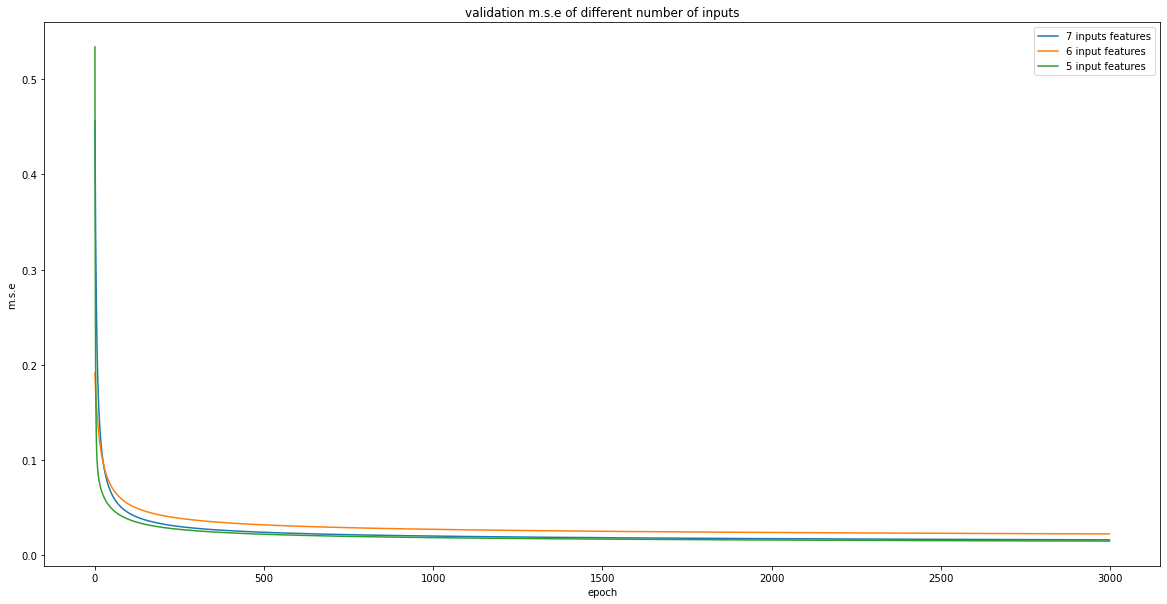

In [7]:
plt.figure(figsize=(20,10))
plt.plot(histories['qn2_0'].history['val_mse'])
plt.plot(histories['qn2_1'].history['val_mse'])
plt.plot(histories['qn2_2'].history['val_mse'])
plt.title('validation m.s.e of different number of inputs')
plt.ylabel('m.s.e')
plt.xlabel('epoch')
plt.legend(['7 inputs features','6 input features','5 input features'], loc='upper right')
plt.show()

## Part B - Question 3

In [3]:
epochs = 3000
batch_size = 8
seed = 10

histories={}
accuracies = []

np.random.seed(seed)
tf.random.set_seed(seed)

admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,[1,2,4,5,6]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

X_data = (X_data- np.mean(X_data, axis=0))/ np.std(X_data, axis=0)
X_train, X_test, Y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=seed)
print (X_train.shape, Y_train.shape)
print (X_test.shape, y_test.shape)

(280, 5) (280, 1)
(120, 5) (120, 1)


### 3-layer

In [4]:
# create a network
model = Sequential([
        Dense(10, activation='relu'),
        Dense(1)
])

opt = tf.keras.optimizers.SGD(lr=0.001, decay=1e-3)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['3_layered'] = model.fit(X_train, Y_train,
                             epochs=epochs,
                             batch_size=batch_size,
                             verbose = 2,
                             validation_data=(X_test, y_test))
accuracies.append(histories['3_layered'].history['val_mse'][epochs-1])

Epoch 1/3000
35/35 - 0s - loss: 0.4704 - mse: 0.4704 - val_loss: 0.4727 - val_mse: 0.4727
Epoch 2/3000
35/35 - 0s - loss: 0.3924 - mse: 0.3924 - val_loss: 0.4048 - val_mse: 0.4048
Epoch 3/3000
35/35 - 0s - loss: 0.3372 - mse: 0.3372 - val_loss: 0.3540 - val_mse: 0.3540
Epoch 4/3000
35/35 - 0s - loss: 0.2962 - mse: 0.2962 - val_loss: 0.3145 - val_mse: 0.3145
Epoch 5/3000
35/35 - 0s - loss: 0.2643 - mse: 0.2643 - val_loss: 0.2828 - val_mse: 0.2828
Epoch 6/3000
35/35 - 0s - loss: 0.2389 - mse: 0.2389 - val_loss: 0.2567 - val_mse: 0.2567
Epoch 7/3000
35/35 - 0s - loss: 0.2182 - mse: 0.2182 - val_loss: 0.2348 - val_mse: 0.2348
Epoch 8/3000
35/35 - 0s - loss: 0.2010 - mse: 0.2010 - val_loss: 0.2163 - val_mse: 0.2163
Epoch 9/3000
35/35 - 0s - loss: 0.1864 - mse: 0.1864 - val_loss: 0.2003 - val_mse: 0.2003
Epoch 10/3000
35/35 - 0s - loss: 0.1739 - mse: 0.1739 - val_loss: 0.1866 - val_mse: 0.1866
Epoch 11/3000
35/35 - 0s - loss: 0.1631 - mse: 0.1631 - val_loss: 0.1746 - val_mse: 0.1746
Epoch 12

Epoch 90/3000
35/35 - 0s - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 91/3000
35/35 - 0s - loss: 0.0419 - mse: 0.0419 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 92/3000
35/35 - 0s - loss: 0.0416 - mse: 0.0416 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 93/3000
35/35 - 0s - loss: 0.0413 - mse: 0.0413 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 94/3000
35/35 - 0s - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 95/3000
35/35 - 0s - loss: 0.0408 - mse: 0.0408 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 96/3000
35/35 - 0s - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 97/3000
35/35 - 0s - loss: 0.0403 - mse: 0.0403 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 98/3000
35/35 - 0s - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 99/3000
35/35 - 0s - loss: 0.0398 - mse: 0.0398 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 100/3000
35/35 - 0s - loss: 0.0396 - mse: 0.0396 - val_loss: 0.0357 - val_mse: 0.035

Epoch 180/3000
35/35 - 0s - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 181/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 182/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 183/3000
35/35 - 0s - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 184/3000
35/35 - 0s - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 185/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 186/3000
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 187/3000
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 188/3000
35/35 - 0s - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 189/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 190/3000
35/35 - 0s - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0244 - val_

Epoch 270/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 271/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 272/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 273/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 274/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 275/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 276/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 277/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 278/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 279/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 280/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0200 - val_

Epoch 360/3000
35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 361/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 362/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 363/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 364/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 365/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 366/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 367/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 368/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 369/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 370/3000
35/35 - 0s - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0176 - val_

Epoch 450/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 451/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 452/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 453/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 454/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 455/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 456/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 457/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 458/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 459/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 460/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0161 - val_

35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 540/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 541/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 542/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 543/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 544/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 545/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 546/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 547/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 548/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 549/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0151 - val_mse: 0.0151
Epo

Epoch 629/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 630/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 631/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 632/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 633/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 634/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 635/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 636/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 637/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 638/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 639/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0143 - val_

Epoch 719/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 720/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 721/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 722/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 723/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 724/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 725/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 726/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 727/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 728/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 729/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0137 - val_

Epoch 809/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 810/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 811/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 812/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 813/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 814/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 815/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 816/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 817/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 818/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 819/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0133 - val_

Epoch 899/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 900/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 901/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 902/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 903/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 904/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 905/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 906/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 907/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 908/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 909/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0129 - val_

Epoch 989/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 990/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 991/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 992/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 993/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 994/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 995/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 996/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 997/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 998/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 999/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0126 - val_

Epoch 1078/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1079/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1080/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1081/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1082/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1083/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1084/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1085/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1086/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1087/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1088/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.

Epoch 1167/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1168/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1169/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1170/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1171/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1172/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1173/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1174/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1175/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1176/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1177/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.

Epoch 1256/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1257/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1258/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1259/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1260/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1261/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1262/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1263/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1264/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1265/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1266/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.

Epoch 1345/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1346/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1347/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1348/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1349/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1350/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1351/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1352/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1353/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1354/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1355/3000
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.

Epoch 1434/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1435/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1436/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1437/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1438/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1439/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1440/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1441/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1442/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1443/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1444/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.

Epoch 1523/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1524/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1525/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1526/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1527/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1528/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1529/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1530/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1531/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1532/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1533/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.

Epoch 1612/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1613/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1614/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1615/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1616/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1617/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1618/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1619/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1620/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1621/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1622/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.

Epoch 1701/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1702/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1703/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1704/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1705/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1706/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1707/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1708/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1709/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1710/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1711/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.

Epoch 1790/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1791/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1792/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1793/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1794/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1795/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1796/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1797/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1798/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1799/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1800/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.

Epoch 1879/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1880/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1881/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1882/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1883/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1884/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1885/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1886/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1887/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1888/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1889/3000
35/35 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.

35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 1968/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 1969/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 1970/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 1971/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 1972/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 1973/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 1974/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 1975/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 1976/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 1977/3000
35/35 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0109 - val_mse: 

Epoch 2056/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2057/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2058/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2059/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2060/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2061/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2062/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2063/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2064/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2065/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2066/3000
35/35 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.

35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2145/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2146/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2147/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2148/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2149/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2150/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2151/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2152/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2153/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2154/3000
35/35 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0107 - val_mse: 

Epoch 2233/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2234/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2235/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2236/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2237/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2238/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2239/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2240/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2241/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2242/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2243/3000
35/35 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.

Epoch 2322/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2323/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2324/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2325/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2326/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2327/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2328/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2329/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2330/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2331/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2332/3000
35/35 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.

Epoch 2410/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2411/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2412/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2413/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2414/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2415/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2416/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2417/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2418/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2419/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2420/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.

Epoch 2499/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2500/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2501/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2502/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2503/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2504/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2505/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2506/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2507/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2508/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2509/3000
35/35 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.

Epoch 2588/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2589/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2590/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2591/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2592/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2593/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2594/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2595/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2596/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2597/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2598/3000
35/35 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.

Epoch 2677/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2678/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2679/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2680/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2681/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2682/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2683/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2684/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2685/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2686/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2687/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.

Epoch 2766/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2767/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2768/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2769/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2770/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2771/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2772/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2773/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2774/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2775/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2776/3000
35/35 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.

Epoch 2855/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2856/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2857/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2858/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2859/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2860/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2861/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2862/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2863/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2864/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2865/3000
35/35 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.

Epoch 2944/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2945/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2946/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2947/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2948/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2949/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2950/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2951/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2952/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2953/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2954/3000
35/35 - 0s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.

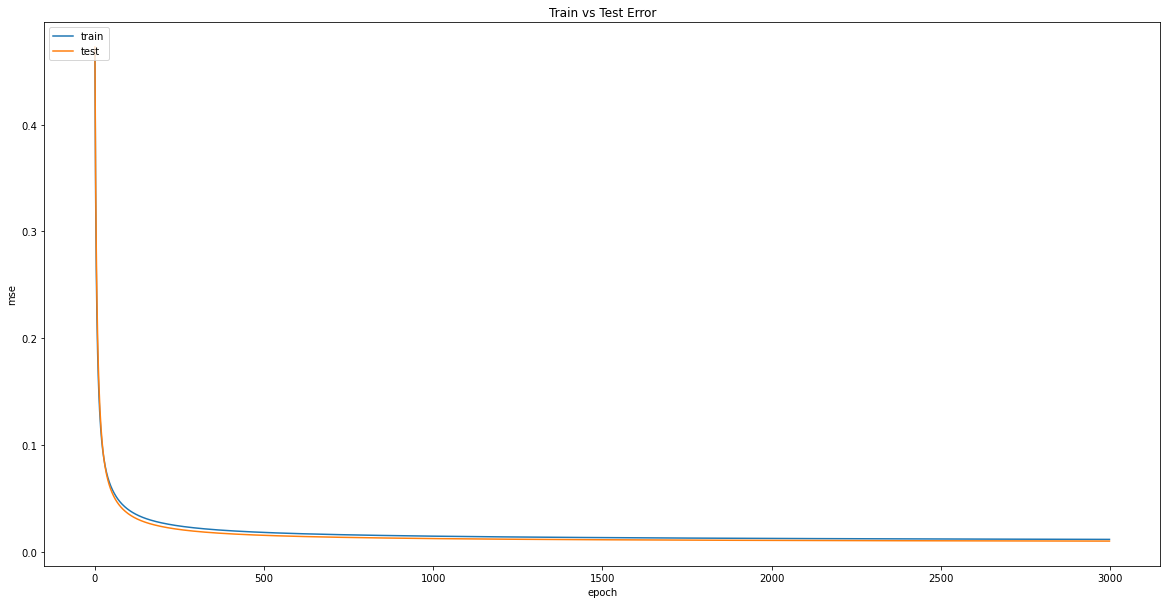

In [5]:
plt.figure(figsize=(20,10))
plt.plot(histories['3_layered'].history['mse'])
plt.plot(histories['3_layered'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4-layered no dropouts

In [7]:
# create a network
model = Sequential([
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(1)
])

opt = tf.keras.optimizers.SGD(lr=0.001, decay=1e-3)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['4_layered'] = model.fit(X_train, Y_train,
                             epochs=epochs,
                             batch_size=batch_size,
                             verbose = 2,
                             validation_data=(X_test, y_test))
accuracies.append(histories['4_layered'].history['val_mse'][epochs-1])

Epoch 1/3000
35/35 - 0s - loss: 1.4599 - mse: 1.4599 - val_loss: 0.9887 - val_mse: 0.9887
Epoch 2/3000
35/35 - 0s - loss: 0.7808 - mse: 0.7808 - val_loss: 0.5565 - val_mse: 0.5565
Epoch 3/3000
35/35 - 0s - loss: 0.4607 - mse: 0.4607 - val_loss: 0.3373 - val_mse: 0.3373
Epoch 4/3000
35/35 - 0s - loss: 0.2912 - mse: 0.2912 - val_loss: 0.2171 - val_mse: 0.2171
Epoch 5/3000
35/35 - 0s - loss: 0.1951 - mse: 0.1951 - val_loss: 0.1481 - val_mse: 0.1481
Epoch 6/3000
35/35 - 0s - loss: 0.1389 - mse: 0.1389 - val_loss: 0.1072 - val_mse: 0.1072
Epoch 7/3000
35/35 - 0s - loss: 0.1046 - mse: 0.1046 - val_loss: 0.0820 - val_mse: 0.0820
Epoch 8/3000
35/35 - 0s - loss: 0.0829 - mse: 0.0829 - val_loss: 0.0660 - val_mse: 0.0660
Epoch 9/3000
35/35 - 0s - loss: 0.0687 - mse: 0.0687 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 10/3000
35/35 - 0s - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0484 - val_mse: 0.0484
Epoch 11/3000
35/35 - 0s - loss: 0.0522 - mse: 0.0522 - val_loss: 0.0433 - val_mse: 0.0433
Epoch 12

Epoch 90/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 91/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 92/3000
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 93/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 94/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 95/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 96/3000
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 97/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 98/3000
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 99/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 100/3000
35/35 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0140 - val_mse: 0.014

Epoch 180/3000
35/35 - 0s - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 181/3000
35/35 - 0s - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 182/3000
35/35 - 0s - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 183/3000
35/35 - 0s - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 184/3000
35/35 - 0s - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 185/3000
35/35 - 0s - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 186/3000
35/35 - 0s - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 187/3000
35/35 - 0s - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 188/3000
35/35 - 0s - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 189/3000
35/35 - 0s - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 190/3000
35/35 - 0s - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0114 - val_

35/35 - 0s - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 270/3000
35/35 - 0s - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 271/3000
35/35 - 0s - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 272/3000
35/35 - 0s - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 273/3000
35/35 - 0s - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 274/3000
35/35 - 0s - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 275/3000
35/35 - 0s - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 276/3000
35/35 - 0s - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 277/3000
35/35 - 0s - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 278/3000
35/35 - 0s - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 279/3000
35/35 - 0s - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0103 - val_mse: 0.0103
Epo

Epoch 359/3000
35/35 - 0s - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 360/3000
35/35 - 0s - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 361/3000
35/35 - 0s - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 362/3000
35/35 - 0s - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 363/3000
35/35 - 0s - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 364/3000
35/35 - 0s - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 365/3000
35/35 - 0s - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 366/3000
35/35 - 0s - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 367/3000
35/35 - 0s - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 368/3000
35/35 - 0s - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 369/3000
35/35 - 0s - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0097 - val_

Epoch 449/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 450/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 451/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 452/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 453/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 454/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 455/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 456/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 457/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 458/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 459/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0093 - val_

Epoch 539/3000
35/35 - 0s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 540/3000
35/35 - 0s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 541/3000
35/35 - 0s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 542/3000
35/35 - 0s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 543/3000
35/35 - 0s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 544/3000
35/35 - 0s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 545/3000
35/35 - 0s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 546/3000
35/35 - 0s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 547/3000
35/35 - 0s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 548/3000
35/35 - 0s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 549/3000
35/35 - 0s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0090 - val_

35/35 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 629/3000
35/35 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 630/3000
35/35 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 631/3000
35/35 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 632/3000
35/35 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 633/3000
35/35 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 634/3000
35/35 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 635/3000
35/35 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 636/3000
35/35 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 637/3000
35/35 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 638/3000
35/35 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0088 - val_mse: 0.0088
Epo

Epoch 718/3000
35/35 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 719/3000
35/35 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 720/3000
35/35 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 721/3000
35/35 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 722/3000
35/35 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 723/3000
35/35 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 724/3000
35/35 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 725/3000
35/35 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 726/3000
35/35 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 727/3000
35/35 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 728/3000
35/35 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0086 - val_

Epoch 808/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 809/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 810/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 811/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 812/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 813/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 814/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 815/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 816/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 817/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 818/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0085 - val_

35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 898/3000
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 899/3000
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 900/3000
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 901/3000
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 902/3000
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 903/3000
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 904/3000
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 905/3000
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 906/3000
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 907/3000
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0084 - val_mse: 0.0084
Epo

Epoch 987/3000
35/35 - 0s - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 988/3000
35/35 - 0s - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 989/3000
35/35 - 0s - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 990/3000
35/35 - 0s - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 991/3000
35/35 - 0s - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 992/3000
35/35 - 0s - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 993/3000
35/35 - 0s - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 994/3000
35/35 - 0s - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 995/3000
35/35 - 0s - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 996/3000
35/35 - 0s - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 997/3000
35/35 - 0s - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0083 - val_

Epoch 1076/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1077/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1078/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1079/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1080/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1081/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1082/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1083/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1084/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1085/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1086/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.

Epoch 1165/3000
35/35 - 0s - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1166/3000
35/35 - 0s - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1167/3000
35/35 - 0s - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1168/3000
35/35 - 0s - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1169/3000
35/35 - 0s - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1170/3000
35/35 - 0s - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1171/3000
35/35 - 0s - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1172/3000
35/35 - 0s - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1173/3000
35/35 - 0s - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1174/3000
35/35 - 0s - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1175/3000
35/35 - 0s - loss: 0.0072 - mse: 0.0072 - val_loss: 0.

Epoch 1254/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1255/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1256/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1257/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1258/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1259/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1260/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1261/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1262/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1263/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1264/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.

Epoch 1343/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1344/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1345/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1346/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1347/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1348/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1349/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1350/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1351/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1352/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1353/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.

35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1432/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1433/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1434/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1435/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1436/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1437/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1438/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1439/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1440/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1441/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0079 - val_mse: 

Epoch 1520/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1521/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1522/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1523/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1524/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1525/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1526/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1527/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1528/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1529/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1530/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.

Epoch 1609/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1610/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1611/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1612/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1613/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1614/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1615/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1616/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1617/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1618/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1619/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.

35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1698/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1699/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1700/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1701/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1702/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1703/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1704/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1705/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1706/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1707/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0078 - val_mse: 

Epoch 1786/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1787/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1788/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1789/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1790/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1791/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1792/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1793/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1794/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1795/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1796/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.

35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1875/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1876/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1877/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1878/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1879/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1880/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1881/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1882/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1883/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1884/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 

Epoch 1963/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1964/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1965/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1966/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1967/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1968/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1969/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1970/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1971/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1972/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1973/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.

35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2052/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2053/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2054/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2055/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2056/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2057/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2058/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2059/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2060/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2061/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0076 - val_mse: 

Epoch 2140/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2141/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2142/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2143/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2144/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2145/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2146/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2147/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2148/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2149/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2150/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.

35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2229/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2230/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2231/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2232/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2233/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2234/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2235/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2236/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2237/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2238/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 

Epoch 2317/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2318/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2319/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2320/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2321/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2322/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2323/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2324/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2325/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2326/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2327/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.

35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2406/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2407/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2408/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2409/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2410/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2411/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2412/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2413/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2414/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2415/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0075 - val_mse: 

Epoch 2494/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2495/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2496/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2497/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2498/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2499/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2500/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2501/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2502/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2503/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2504/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.

35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2583/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2584/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2585/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2586/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2587/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2588/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2589/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2590/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2591/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2592/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 

Epoch 2671/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2672/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2673/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2674/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2675/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2676/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2677/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2678/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2679/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2680/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2681/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.

Epoch 2760/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2761/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2762/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2763/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2764/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2765/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2766/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2767/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2768/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2769/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2770/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.

35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2849/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2850/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2851/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2852/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2853/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2854/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2855/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2856/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2857/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2858/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 

Epoch 2937/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2938/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2939/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2940/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2941/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2942/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2943/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2944/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2945/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2946/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2947/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.

In [8]:
print("Validation accuracy of 4-layered network with no dropouts: " + str(accuracies[1]))

Validation accuracy of 4-layered network with no dropouts: 0.007382259238511324


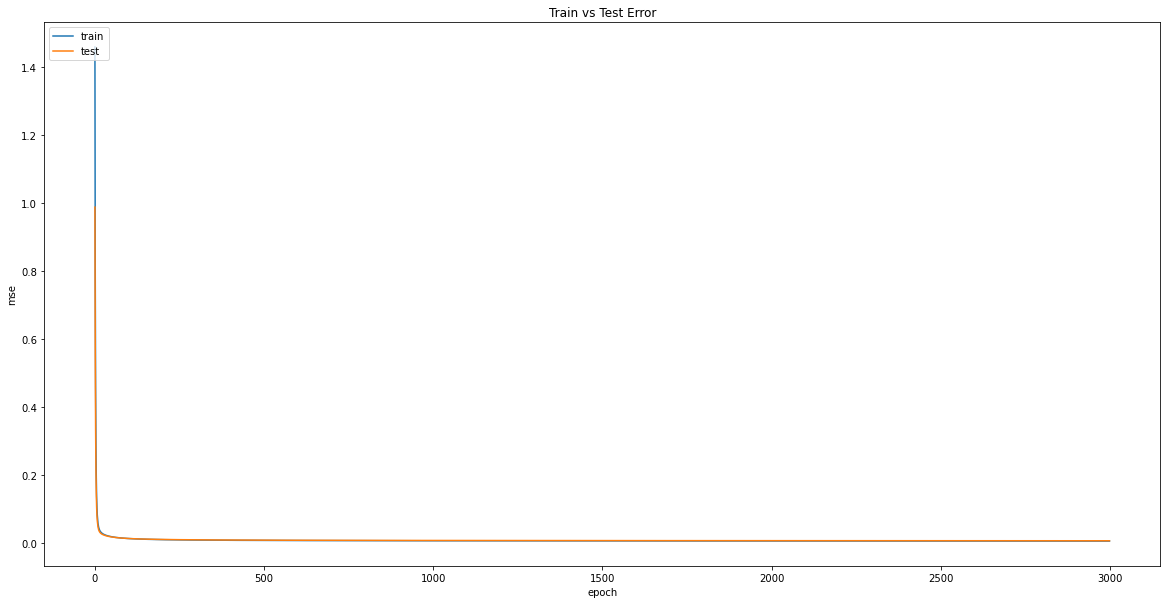

In [9]:
plt.figure(figsize=(20,10))
plt.plot(histories['4_layered'].history['mse'])
plt.plot(histories['4_layered'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

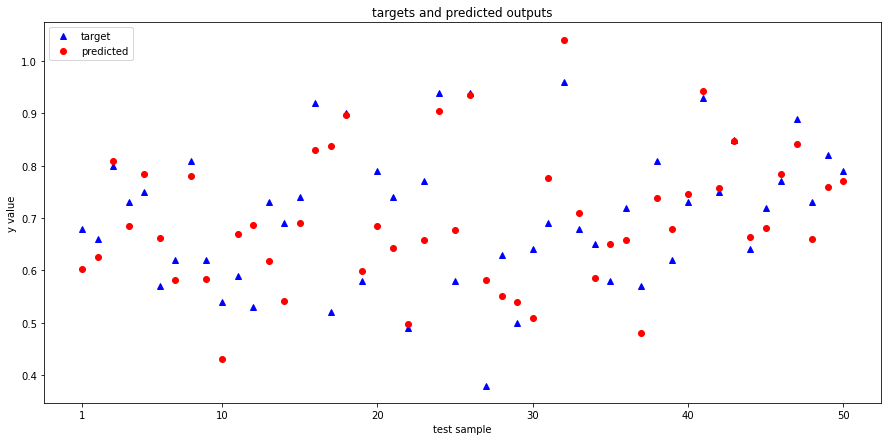

In [10]:
y_pred = model.predict(X_test)

plt.figure(figsize=(15,7))
for i in range(0,50):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, y_pred[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40,50])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

### 5-layered no dropouts

In [11]:
# create a network
model = Sequential([
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(1)
])

opt = tf.keras.optimizers.SGD(lr=0.001, decay=1e-3)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['5_layered'] = model.fit(X_train, Y_train,
                             epochs=epochs,
                             batch_size=batch_size,
                             verbose = 2,
                             validation_data=(X_test, y_test))
accuracies.append(histories['5_layered'].history['val_mse'][epochs-1])

Epoch 1/3000
35/35 - 0s - loss: 0.6816 - mse: 0.6816 - val_loss: 0.5006 - val_mse: 0.5006
Epoch 2/3000
35/35 - 0s - loss: 0.3972 - mse: 0.3972 - val_loss: 0.3117 - val_mse: 0.3117
Epoch 3/3000
35/35 - 0s - loss: 0.2515 - mse: 0.2515 - val_loss: 0.2083 - val_mse: 0.2083
Epoch 4/3000
35/35 - 0s - loss: 0.1694 - mse: 0.1694 - val_loss: 0.1472 - val_mse: 0.1472
Epoch 5/3000
35/35 - 0s - loss: 0.1206 - mse: 0.1206 - val_loss: 0.1104 - val_mse: 0.1104
Epoch 6/3000
35/35 - 0s - loss: 0.0911 - mse: 0.0911 - val_loss: 0.0879 - val_mse: 0.0879
Epoch 7/3000
35/35 - 0s - loss: 0.0731 - mse: 0.0731 - val_loss: 0.0735 - val_mse: 0.0735
Epoch 8/3000
35/35 - 0s - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 9/3000
35/35 - 0s - loss: 0.0541 - mse: 0.0541 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 10/3000
35/35 - 0s - loss: 0.0489 - mse: 0.0489 - val_loss: 0.0529 - val_mse: 0.0529
Epoch 11/3000
35/35 - 0s - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0495 - val_mse: 0.0495
Epoch 12

Epoch 90/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 91/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 92/3000
35/35 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 93/3000
35/35 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 94/3000
35/35 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 95/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 96/3000
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 97/3000
35/35 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 98/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 99/3000
35/35 - 0s - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 100/3000
35/35 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0146 - val_mse: 0.014

35/35 - 0s - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 180/3000
35/35 - 0s - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 181/3000
35/35 - 0s - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 182/3000
35/35 - 0s - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 183/3000
35/35 - 0s - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 184/3000
35/35 - 0s - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 185/3000
35/35 - 0s - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 186/3000
35/35 - 0s - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 187/3000
35/35 - 0s - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 188/3000
35/35 - 0s - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 189/3000
35/35 - 0s - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0111 - val_mse: 0.0111
Epo

Epoch 269/3000
35/35 - 0s - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 270/3000
35/35 - 0s - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 271/3000
35/35 - 0s - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 272/3000
35/35 - 0s - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 273/3000
35/35 - 0s - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 274/3000
35/35 - 0s - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 275/3000
35/35 - 0s - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 276/3000
35/35 - 0s - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 277/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 278/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 279/3000
35/35 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0098 - val_

35/35 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 359/3000
35/35 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 360/3000
35/35 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 361/3000
35/35 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 362/3000
35/35 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 363/3000
35/35 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 364/3000
35/35 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 365/3000
35/35 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 366/3000
35/35 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 367/3000
35/35 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 368/3000
35/35 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0091 - val_mse: 0.0091
Epo

Epoch 448/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 449/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 450/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 451/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 452/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 453/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 454/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 455/3000
35/35 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 456/3000
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 457/3000
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 458/3000
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0087 - val_

35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 538/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 539/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 540/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 541/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 542/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 543/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 544/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 545/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 546/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 547/3000
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0084 - val_mse: 0.0084
Epo

Epoch 627/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 628/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 629/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 630/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 631/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 632/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 633/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 634/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 635/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 636/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 637/3000
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0082 - val_

35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 717/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 718/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 719/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 720/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 721/3000
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 722/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 723/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 724/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 725/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 726/3000
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0080 - val_mse: 0.0080
Epo

Epoch 806/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 807/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 808/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 809/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 810/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 811/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 812/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 813/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 814/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 815/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 816/3000
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0079 - val_

35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 896/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 897/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 898/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 899/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 900/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 901/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 902/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 903/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 904/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 905/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0078 - val_mse: 0.0078
Epo

Epoch 985/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 986/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 987/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 988/3000
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 989/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 990/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 991/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 992/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 993/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 994/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 995/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0077 - val_

Epoch 1074/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1075/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1076/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1077/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1078/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1079/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1080/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1081/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1082/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1083/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1084/3000
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.

35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1163/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1164/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1165/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1166/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1167/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1168/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1169/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1170/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1171/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1172/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0076 - val_mse: 

Epoch 1251/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1252/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1253/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1254/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1255/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1256/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1257/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1258/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1259/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1260/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1261/3000
35/35 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.

35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1340/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1341/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1342/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1343/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1344/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1345/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1346/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1347/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1348/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1349/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0075 - val_mse: 

Epoch 1428/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1429/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1430/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1431/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1432/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1433/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1434/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1435/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1436/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1437/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1438/3000
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.

35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1517/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1518/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1519/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1520/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1521/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1522/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1523/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1524/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1525/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1526/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 

Epoch 1605/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1606/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1607/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1608/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1609/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1610/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1611/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1612/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1613/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1614/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1615/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.

35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1694/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1695/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1696/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1697/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1698/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1699/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1700/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1701/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1702/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1703/3000
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0073 - val_mse: 

Epoch 1782/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1783/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1784/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1785/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1786/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1787/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1788/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1789/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1790/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1791/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1792/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.

35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1871/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1872/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1873/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1874/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1875/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1876/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1877/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1878/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1879/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1880/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0073 - val_mse: 

Epoch 1959/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1960/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1961/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1962/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1963/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1964/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1965/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1966/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1967/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1968/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1969/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.

35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2048/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2049/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2050/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2051/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2052/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2053/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2054/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2055/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2056/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2057/3000
35/35 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0072 - val_mse: 

Epoch 2136/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2137/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2138/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2139/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2140/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2141/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2142/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2143/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2144/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2145/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2146/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.

35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2225/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2226/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2227/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2228/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2229/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2230/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2231/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2232/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2233/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2234/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 

Epoch 2313/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2314/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2315/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2316/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2317/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2318/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2319/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2320/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2321/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2322/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2323/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.

35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2402/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2403/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2404/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2405/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2406/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2407/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2408/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2409/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2410/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2411/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 

Epoch 2490/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2491/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2492/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2493/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2494/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2495/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2496/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2497/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2498/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2499/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2500/3000
35/35 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.

35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2579/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2580/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2581/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2582/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2583/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2584/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2585/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2586/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2587/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2588/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 

Epoch 2667/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2668/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2669/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2670/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2671/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2672/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2673/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2674/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2675/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2676/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2677/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.

35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2756/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2757/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2758/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2759/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2760/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2761/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2762/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2763/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2764/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2765/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 

Epoch 2844/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2845/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2846/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2847/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2848/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2849/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2850/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2851/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2852/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2853/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2854/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.

35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2933/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2934/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2935/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2936/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2937/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2938/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2939/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2940/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2941/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2942/3000
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0071 - val_mse: 

In [13]:
print("Validation accuracy of 5-layered network with no dropouts: " + str(accuracies[2]))

Validation accuracy of 5-layered network with no dropouts: 0.007046908140182495


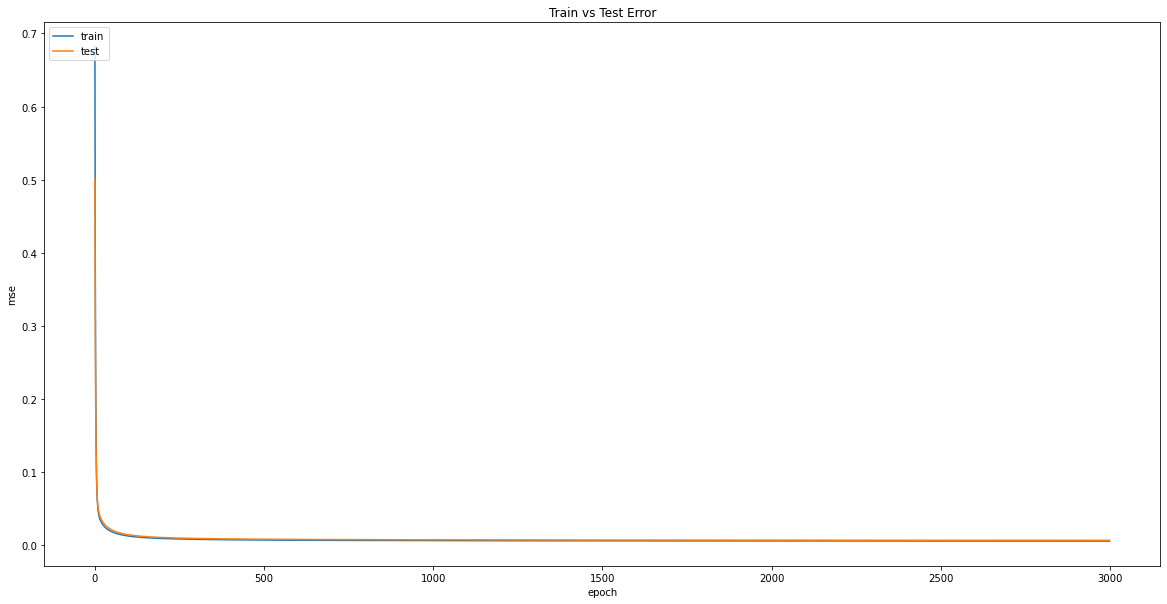

In [14]:
plt.figure(figsize=(20,10))
plt.plot(histories['5_layered'].history['mse'])
plt.plot(histories['5_layered'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

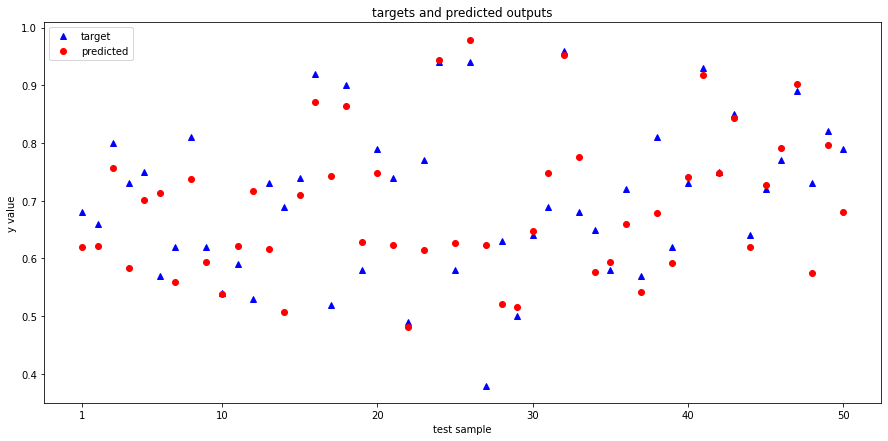

In [15]:
y_pred = model.predict(X_test)

plt.figure(figsize=(15,7))
for i in range(0,50):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, y_pred[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40,50])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

### 4-layered with dropouts

In [19]:
# create a network
model = Sequential([
        Dense(50, activation='relu'),
        Dropout(rate=0.2),
        Dense(50, activation='relu'),
        Dropout(rate=0.2),
        Dense(1)
])

opt = tf.keras.optimizers.SGD(lr=0.001, decay=1e-3)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['4_layered_dropout'] = model.fit(X_train, Y_train,
                             epochs=epochs,
                             batch_size=batch_size,
                             verbose = 2,
                             validation_data=(X_test, y_test))
accuracies.append(histories['4_layered_dropout'].history['val_mse'][epochs-1])

Epoch 1/3000
35/35 - 0s - loss: 1.4100 - mse: 1.4100 - val_loss: 0.7699 - val_mse: 0.7699
Epoch 2/3000
35/35 - 0s - loss: 0.6551 - mse: 0.6551 - val_loss: 0.3798 - val_mse: 0.3798
Epoch 3/3000
35/35 - 0s - loss: 0.3247 - mse: 0.3247 - val_loss: 0.2090 - val_mse: 0.2090
Epoch 4/3000
35/35 - 0s - loss: 0.2130 - mse: 0.2130 - val_loss: 0.1236 - val_mse: 0.1236
Epoch 5/3000
35/35 - 0s - loss: 0.1508 - mse: 0.1508 - val_loss: 0.0790 - val_mse: 0.0790
Epoch 6/3000
35/35 - 0s - loss: 0.1223 - mse: 0.1223 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 7/3000
35/35 - 0s - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0476 - val_mse: 0.0476
Epoch 8/3000
35/35 - 0s - loss: 0.0956 - mse: 0.0956 - val_loss: 0.0418 - val_mse: 0.0418
Epoch 9/3000
35/35 - 0s - loss: 0.0984 - mse: 0.0984 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 10/3000
35/35 - 0s - loss: 0.0943 - mse: 0.0943 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 11/3000
35/35 - 0s - loss: 0.0957 - mse: 0.0957 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 12

Epoch 92/3000
35/35 - 0s - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 93/3000
35/35 - 0s - loss: 0.0501 - mse: 0.0501 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 94/3000
35/35 - 0s - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 95/3000
35/35 - 0s - loss: 0.0531 - mse: 0.0531 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 96/3000
35/35 - 0s - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 97/3000
35/35 - 0s - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 98/3000
35/35 - 0s - loss: 0.0445 - mse: 0.0445 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 99/3000
35/35 - 0s - loss: 0.0465 - mse: 0.0465 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 100/3000
35/35 - 0s - loss: 0.0435 - mse: 0.0435 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 101/3000
35/35 - 0s - loss: 0.0555 - mse: 0.0555 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 102/3000
35/35 - 0s - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0134 - val_mse: 0.0

35/35 - 0s - loss: 0.0396 - mse: 0.0396 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 182/3000
35/35 - 0s - loss: 0.0400 - mse: 0.0400 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 183/3000
35/35 - 0s - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 184/3000
35/35 - 0s - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 185/3000
35/35 - 0s - loss: 0.0407 - mse: 0.0407 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 186/3000
35/35 - 0s - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 187/3000
35/35 - 0s - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 188/3000
35/35 - 0s - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 189/3000
35/35 - 0s - loss: 0.0420 - mse: 0.0420 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 190/3000
35/35 - 0s - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 191/3000
35/35 - 0s - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0111 - val_mse: 0.0111
Epo

Epoch 271/3000
35/35 - 0s - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 272/3000
35/35 - 0s - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 273/3000
35/35 - 0s - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 274/3000
35/35 - 0s - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 275/3000
35/35 - 0s - loss: 0.0354 - mse: 0.0354 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 276/3000
35/35 - 0s - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 277/3000
35/35 - 0s - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 278/3000
35/35 - 0s - loss: 0.0396 - mse: 0.0396 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 279/3000
35/35 - 0s - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 280/3000
35/35 - 0s - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 281/3000
35/35 - 0s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0100 - val_

35/35 - 0s - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 361/3000
35/35 - 0s - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 362/3000
35/35 - 0s - loss: 0.0363 - mse: 0.0363 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 363/3000
35/35 - 0s - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 364/3000
35/35 - 0s - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 365/3000
35/35 - 0s - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 366/3000
35/35 - 0s - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 367/3000
35/35 - 0s - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 368/3000
35/35 - 0s - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 369/3000
35/35 - 0s - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 370/3000
35/35 - 0s - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0094 - val_mse: 0.0094
Epo

Epoch 450/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 451/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 452/3000
35/35 - 0s - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 453/3000
35/35 - 0s - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 454/3000
35/35 - 0s - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 455/3000
35/35 - 0s - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 456/3000
35/35 - 0s - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 457/3000
35/35 - 0s - loss: 0.0332 - mse: 0.0332 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 458/3000
35/35 - 0s - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 459/3000
35/35 - 0s - loss: 0.0332 - mse: 0.0332 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 460/3000
35/35 - 0s - loss: 0.0342 - mse: 0.0342 - val_loss: 0.0090 - val_

Epoch 540/3000
35/35 - 0s - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 541/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 542/3000
35/35 - 0s - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 543/3000
35/35 - 0s - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 544/3000
35/35 - 0s - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 545/3000
35/35 - 0s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 546/3000
35/35 - 0s - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 547/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 548/3000
35/35 - 0s - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 549/3000
35/35 - 0s - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 550/3000
35/35 - 0s - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0087 - val_

35/35 - 0s - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 630/3000
35/35 - 0s - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 631/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 632/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 633/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 634/3000
35/35 - 0s - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 635/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 636/3000
35/35 - 0s - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 637/3000
35/35 - 0s - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 638/3000
35/35 - 0s - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 639/3000
35/35 - 0s - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0085 - val_mse: 0.0085
Epo

Epoch 719/3000
35/35 - 0s - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 720/3000
35/35 - 0s - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 721/3000
35/35 - 0s - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 722/3000
35/35 - 0s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 723/3000
35/35 - 0s - loss: 0.0317 - mse: 0.0317 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 724/3000
35/35 - 0s - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 725/3000
35/35 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 726/3000
35/35 - 0s - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 727/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 728/3000
35/35 - 0s - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 729/3000
35/35 - 0s - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0083 - val_

Epoch 809/3000
35/35 - 0s - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 810/3000
35/35 - 0s - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 811/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 812/3000
35/35 - 0s - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 813/3000
35/35 - 0s - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 814/3000
35/35 - 0s - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 815/3000
35/35 - 0s - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 816/3000
35/35 - 0s - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 817/3000
35/35 - 0s - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 818/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 819/3000
35/35 - 0s - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0082 - val_

35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 899/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 900/3000
35/35 - 0s - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 901/3000
35/35 - 0s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 902/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 903/3000
35/35 - 0s - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 904/3000
35/35 - 0s - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 905/3000
35/35 - 0s - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 906/3000
35/35 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 907/3000
35/35 - 0s - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 908/3000
35/35 - 0s - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0080 - val_mse: 0.0080
Epo

Epoch 988/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 989/3000
35/35 - 0s - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 990/3000
35/35 - 0s - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 991/3000
35/35 - 0s - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 992/3000
35/35 - 0s - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 993/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 994/3000
35/35 - 0s - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 995/3000
35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 996/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 997/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 998/3000
35/35 - 0s - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0079 - val_

Epoch 1077/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1078/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1079/3000
35/35 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1080/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1081/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1082/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1083/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1084/3000
35/35 - 0s - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1085/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1086/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1087/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.

Epoch 1166/3000
35/35 - 0s - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1167/3000
35/35 - 0s - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1168/3000
35/35 - 0s - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1169/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1170/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1171/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1172/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1173/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1174/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1175/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1176/3000
35/35 - 0s - loss: 0.0280 - mse: 0.0280 - val_loss: 0.

Epoch 1255/3000
35/35 - 0s - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1256/3000
35/35 - 0s - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1257/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1258/3000
35/35 - 0s - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1259/3000
35/35 - 0s - loss: 0.0355 - mse: 0.0355 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1260/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1261/3000
35/35 - 0s - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1262/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1263/3000
35/35 - 0s - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1264/3000
35/35 - 0s - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1265/3000
35/35 - 0s - loss: 0.0287 - mse: 0.0287 - val_loss: 0.

35/35 - 0s - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1344/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1345/3000
35/35 - 0s - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1346/3000
35/35 - 0s - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1347/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1348/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1349/3000
35/35 - 0s - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1350/3000
35/35 - 0s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1351/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1352/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1353/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0076 - val_mse: 

Epoch 1432/3000
35/35 - 0s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1433/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1434/3000
35/35 - 0s - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1435/3000
35/35 - 0s - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1436/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1437/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1438/3000
35/35 - 0s - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1439/3000
35/35 - 0s - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1440/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1441/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1442/3000
35/35 - 0s - loss: 0.0284 - mse: 0.0284 - val_loss: 0.

Epoch 1521/3000
35/35 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1522/3000
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1523/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1524/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1525/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1526/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1527/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1528/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1529/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1530/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1531/3000
35/35 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.

35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1610/3000
35/35 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1611/3000
35/35 - 0s - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1612/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1613/3000
35/35 - 0s - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1614/3000
35/35 - 0s - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1615/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1616/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1617/3000
35/35 - 0s - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1618/3000
35/35 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1619/3000
35/35 - 0s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0075 - val_mse: 

Epoch 1698/3000
35/35 - 0s - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1699/3000
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1700/3000
35/35 - 0s - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1701/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1702/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1703/3000
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1704/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1705/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1706/3000
35/35 - 0s - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1707/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1708/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.

35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1787/3000
35/35 - 0s - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1788/3000
35/35 - 0s - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1789/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1790/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1791/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1792/3000
35/35 - 0s - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1793/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1794/3000
35/35 - 0s - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1795/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1796/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0074 - val_mse: 

Epoch 1875/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1876/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1877/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1878/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1879/3000
35/35 - 0s - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1880/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1881/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1882/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1883/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1884/3000
35/35 - 0s - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1885/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.

35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1964/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1965/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1966/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1967/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1968/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1969/3000
35/35 - 0s - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1970/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1971/3000
35/35 - 0s - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1972/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1973/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0073 - val_mse: 

Epoch 2052/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2053/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2054/3000
35/35 - 0s - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2055/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2056/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2057/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2058/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2059/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2060/3000
35/35 - 0s - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2061/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2062/3000
35/35 - 0s - loss: 0.0205 - mse: 0.0205 - val_loss: 0.

Epoch 2141/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2142/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2143/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2144/3000
35/35 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2145/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2146/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2147/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2148/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2149/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2150/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2151/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.

Epoch 2230/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2231/3000
35/35 - 0s - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2232/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2233/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2234/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2235/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2236/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2237/3000
35/35 - 0s - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2238/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2239/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2240/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.

Epoch 2319/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2320/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2321/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2322/3000
35/35 - 0s - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2323/3000
35/35 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2324/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2325/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2326/3000
35/35 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2327/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2328/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2329/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.

Epoch 2408/3000
35/35 - 0s - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2409/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2410/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2411/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2412/3000
35/35 - 0s - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2413/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2414/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2415/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2416/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2417/3000
35/35 - 0s - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2418/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.

Epoch 2497/3000
35/35 - 0s - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2498/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2499/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2500/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2501/3000
35/35 - 0s - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2502/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2503/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2504/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2505/3000
35/35 - 0s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2506/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2507/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.

35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2586/3000
35/35 - 0s - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2587/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2588/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2589/3000
35/35 - 0s - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2590/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2591/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2592/3000
35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2593/3000
35/35 - 0s - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2594/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2595/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0072 - val_mse: 

Epoch 2674/3000
35/35 - 0s - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2675/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2676/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2677/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2678/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2679/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2680/3000
35/35 - 0s - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2681/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2682/3000
35/35 - 0s - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2683/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2684/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.

35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2763/3000
35/35 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2764/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2765/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2766/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2767/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2768/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2769/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2770/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2771/3000
35/35 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2772/3000
35/35 - 0s - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0071 - val_mse: 

Epoch 2851/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2852/3000
35/35 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2853/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2854/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2855/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2856/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2857/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2858/3000
35/35 - 0s - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2859/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2860/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2861/3000
35/35 - 0s - loss: 0.0254 - mse: 0.0254 - val_loss: 0.

Epoch 2940/3000
35/35 - 0s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2941/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2942/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2943/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2944/3000
35/35 - 0s - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2945/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2946/3000
35/35 - 0s - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2947/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2948/3000
35/35 - 0s - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2949/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2950/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.

In [31]:
print("Validation accuracy of 4-layered network with dropouts: " + str(accuracies[3]))

Validation accuracy of 4-layered network with dropouts: 0.007067261263728142


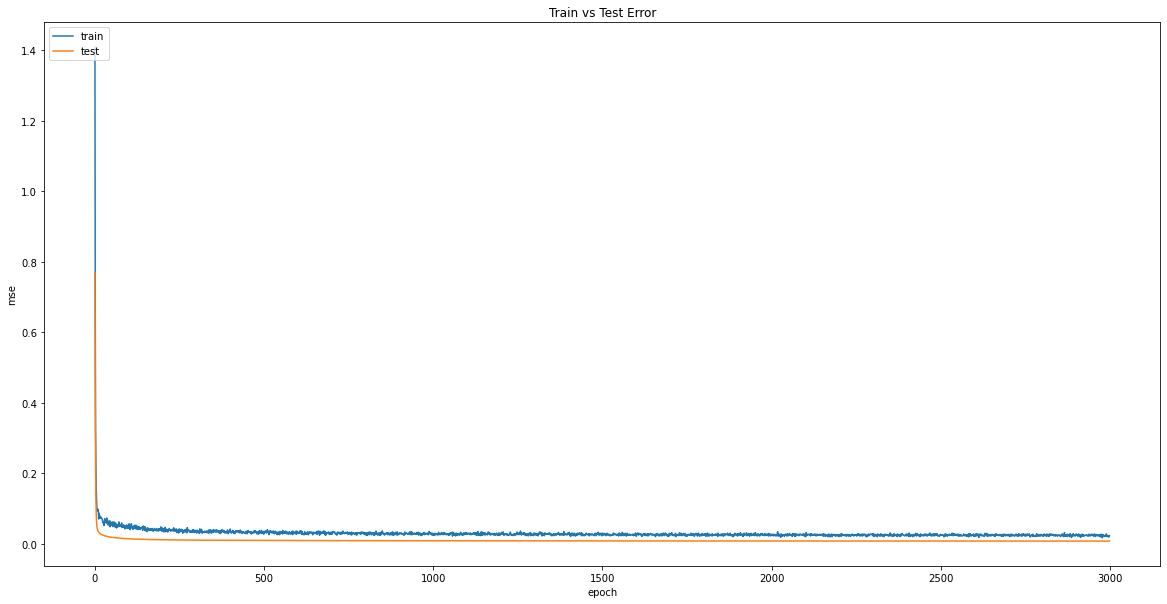

In [21]:
plt.figure(figsize=(20,10))
plt.plot(histories['4_layered_dropout'].history['mse'])
plt.plot(histories['4_layered_dropout'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

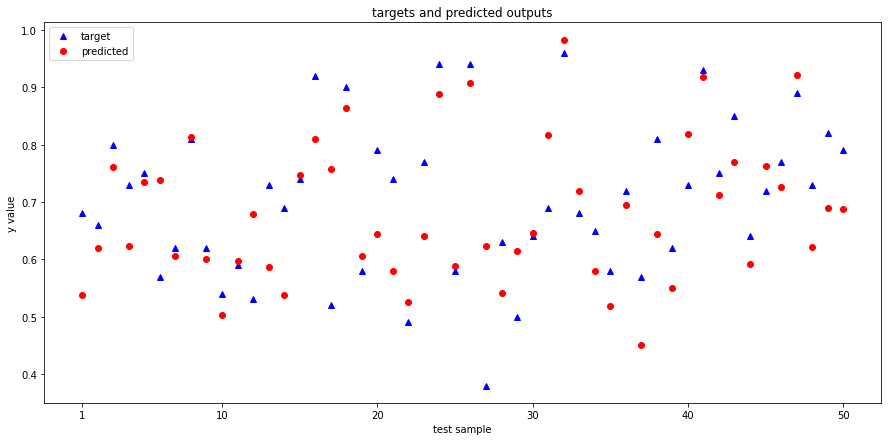

In [22]:
y_pred = model.predict(X_test)

plt.figure(figsize=(15,7))
for i in range(0,50):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, y_pred[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40,50])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

### 5-layered with dropouts

In [33]:
# create a network
model = Sequential([
        Dense(50, activation='relu'),
        Dropout(rate=0.2),
        Dense(50, activation='relu'),
        Dropout(rate=0.2),
        Dense(50, activation='relu'),
        Dropout(rate=0.2),
        Dense(1)
])

opt = tf.keras.optimizers.SGD(lr=0.001, decay=1e-3)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['5_layered_dropout'] = model.fit(X_train, Y_train,
                             epochs=epochs,
                             batch_size=batch_size,
                             verbose = 2,
                             validation_data=(X_test, y_test))
accuracies.append(histories['5_layered_dropout'].history['val_mse'][epochs-1])

Epoch 1/3000
35/35 - 0s - loss: 0.9401 - mse: 0.9401 - val_loss: 0.5659 - val_mse: 0.5659
Epoch 2/3000
35/35 - 0s - loss: 0.6185 - mse: 0.6185 - val_loss: 0.3625 - val_mse: 0.3625
Epoch 3/3000
35/35 - 0s - loss: 0.4280 - mse: 0.4280 - val_loss: 0.2585 - val_mse: 0.2585
Epoch 4/3000
35/35 - 0s - loss: 0.3046 - mse: 0.3046 - val_loss: 0.1959 - val_mse: 0.1959
Epoch 5/3000
35/35 - 0s - loss: 0.2411 - mse: 0.2411 - val_loss: 0.1576 - val_mse: 0.1576
Epoch 6/3000
35/35 - 0s - loss: 0.2135 - mse: 0.2135 - val_loss: 0.1285 - val_mse: 0.1285
Epoch 7/3000
35/35 - 0s - loss: 0.1849 - mse: 0.1849 - val_loss: 0.1078 - val_mse: 0.1078
Epoch 8/3000
35/35 - 0s - loss: 0.1524 - mse: 0.1524 - val_loss: 0.0932 - val_mse: 0.0932
Epoch 9/3000
35/35 - 0s - loss: 0.1377 - mse: 0.1377 - val_loss: 0.0819 - val_mse: 0.0819
Epoch 10/3000
35/35 - 0s - loss: 0.1439 - mse: 0.1439 - val_loss: 0.0725 - val_mse: 0.0725
Epoch 11/3000
35/35 - 0s - loss: 0.1119 - mse: 0.1119 - val_loss: 0.0652 - val_mse: 0.0652
Epoch 12

35/35 - 0s - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 92/3000
35/35 - 0s - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 93/3000
35/35 - 0s - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 94/3000
35/35 - 0s - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 95/3000
35/35 - 0s - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 96/3000
35/35 - 0s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 97/3000
35/35 - 0s - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 98/3000
35/35 - 0s - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 99/3000
35/35 - 0s - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 100/3000
35/35 - 0s - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 101/3000
35/35 - 0s - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 102/3

Epoch 181/3000
35/35 - 0s - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 182/3000
35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 183/3000
35/35 - 0s - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 184/3000
35/35 - 0s - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 185/3000
35/35 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 186/3000
35/35 - 0s - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 187/3000
35/35 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 188/3000
35/35 - 0s - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 189/3000
35/35 - 0s - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 190/3000
35/35 - 0s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 191/3000
35/35 - 0s - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0084 - val_

Epoch 271/3000
35/35 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 272/3000
35/35 - 0s - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 273/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 274/3000
35/35 - 0s - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 275/3000
35/35 - 0s - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 276/3000
35/35 - 0s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 277/3000
35/35 - 0s - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 278/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 279/3000
35/35 - 0s - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 280/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 281/3000
35/35 - 0s - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0074 - val_

35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 361/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 362/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 363/3000
35/35 - 0s - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 364/3000
35/35 - 0s - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 365/3000
35/35 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 366/3000
35/35 - 0s - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 367/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 368/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 369/3000
35/35 - 0s - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 370/3000
35/35 - 0s - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0068 - val_mse: 0.0068
Epo

Epoch 450/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 451/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 452/3000
35/35 - 0s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 453/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 454/3000
35/35 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 455/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 456/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 457/3000
35/35 - 0s - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 458/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 459/3000
35/35 - 0s - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 460/3000
35/35 - 0s - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0064 - val_

35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 540/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 541/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 542/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 543/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 544/3000
35/35 - 0s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 545/3000
35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 546/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 547/3000
35/35 - 0s - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 548/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 549/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0062 - val_mse: 0.0062
Epo

Epoch 629/3000
35/35 - 0s - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 630/3000
35/35 - 0s - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 631/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 632/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 633/3000
35/35 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 634/3000
35/35 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 635/3000
35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 636/3000
35/35 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 637/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 638/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 639/3000
35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0060 - val_

35/35 - 0s - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 719/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 720/3000
35/35 - 0s - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 721/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 722/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 723/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 724/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 725/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 726/3000
35/35 - 0s - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 727/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 728/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0059 - val_mse: 0.0059
Epo

Epoch 808/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 809/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 810/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 811/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 812/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 813/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 814/3000
35/35 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 815/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 816/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 817/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 818/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0058 - val_

35/35 - 0s - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 898/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 899/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 900/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 901/3000
35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 902/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 903/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 904/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 905/3000
35/35 - 0s - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 906/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 907/3000
35/35 - 0s - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0057 - val_mse: 0.0057
Epo

Epoch 987/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 988/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 989/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 990/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 991/3000
35/35 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 992/3000
35/35 - 0s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 993/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 994/3000
35/35 - 0s - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 995/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 996/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 997/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0056 - val_

Epoch 1076/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1077/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1078/3000
35/35 - 0s - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1079/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1080/3000
35/35 - 0s - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1081/3000
35/35 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1082/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1083/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1084/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1085/3000
35/35 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1086/3000
35/35 - 0s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.

35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1165/3000
35/35 - 0s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1166/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1167/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1168/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1169/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1170/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1171/3000
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1172/3000
35/35 - 0s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1173/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1174/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0055 - val_mse: 

Epoch 1253/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1254/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1255/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1256/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1257/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1258/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1259/3000
35/35 - 0s - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1260/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1261/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1262/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1263/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.

35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1342/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1343/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1344/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1345/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1346/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1347/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1348/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1349/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1350/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1351/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0055 - val_mse: 

Epoch 1430/3000
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1431/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1432/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1433/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1434/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1435/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1436/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1437/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1438/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1439/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1440/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.

35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1519/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1520/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1521/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1522/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1523/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1524/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1525/3000
35/35 - 0s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1526/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1527/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1528/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0054 - val_mse: 

Epoch 1607/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1608/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1609/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1610/3000
35/35 - 0s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1611/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1612/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1613/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1614/3000
35/35 - 0s - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1615/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1616/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1617/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.

35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1696/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1697/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1698/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1699/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1700/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1701/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1702/3000
35/35 - 0s - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1703/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1704/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1705/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0053 - val_mse: 

Epoch 1784/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1785/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1786/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1787/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1788/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1789/3000
35/35 - 0s - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1790/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1791/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1792/3000
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1793/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1794/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.

35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1873/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1874/3000
35/35 - 0s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1875/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1876/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1877/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1878/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1879/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1880/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1881/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1882/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0053 - val_mse: 

Epoch 1961/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1962/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1963/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1964/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1965/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1966/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1967/3000
35/35 - 0s - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1968/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1969/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1970/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1971/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.

35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2050/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2051/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2052/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2053/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2054/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2055/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2056/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2057/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2058/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2059/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0053 - val_mse: 

Epoch 2138/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2139/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2140/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2141/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2142/3000
35/35 - 0s - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2143/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2144/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2145/3000
35/35 - 0s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2146/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2147/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2148/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.

35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2227/3000
35/35 - 0s - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2228/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2229/3000
35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2230/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2231/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2232/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2233/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2234/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2235/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2236/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0052 - val_mse: 

Epoch 2315/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2316/3000
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2317/3000
35/35 - 0s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2318/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2319/3000
35/35 - 0s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2320/3000
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2321/3000
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2322/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2323/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2324/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2325/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.

35/35 - 0s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2404/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2405/3000
35/35 - 0s - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2406/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2407/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2408/3000
35/35 - 0s - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2409/3000
35/35 - 0s - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2410/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2411/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2412/3000
35/35 - 0s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2413/3000
35/35 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0052 - val_mse: 

Epoch 2492/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2493/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2494/3000
35/35 - 0s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2495/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2496/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2497/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2498/3000
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2499/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2500/3000
35/35 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2501/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2502/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.

35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2581/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2582/3000
35/35 - 0s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2583/3000
35/35 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2584/3000
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2585/3000
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2586/3000
35/35 - 0s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2587/3000
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2588/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2589/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2590/3000
35/35 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0052 - val_mse: 

Epoch 2669/3000
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2670/3000
35/35 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2671/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2672/3000
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2673/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2674/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2675/3000
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2676/3000
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2677/3000
35/35 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2678/3000
35/35 - 0s - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2679/3000
35/35 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.

35/35 - 0s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2758/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2759/3000
35/35 - 0s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2760/3000
35/35 - 0s - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2761/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2762/3000
35/35 - 0s - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2763/3000
35/35 - 0s - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2764/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2765/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2766/3000
35/35 - 0s - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2767/3000
35/35 - 0s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0052 - val_mse: 

Epoch 2846/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2847/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2848/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2849/3000
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2850/3000
35/35 - 0s - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2851/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2852/3000
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2853/3000
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2854/3000
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2855/3000
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2856/3000
35/35 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.

35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2935/3000
35/35 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2936/3000
35/35 - 0s - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2937/3000
35/35 - 0s - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2938/3000
35/35 - 0s - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2939/3000
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2940/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2941/3000
35/35 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2942/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2943/3000
35/35 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2944/3000
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0051 - val_mse: 

In [34]:
print("Validation accuracy of 5-layered network with dropouts: " + str(accuracies[4]))

Validation accuracy of 5-layered network with dropouts: 0.005137385334819555


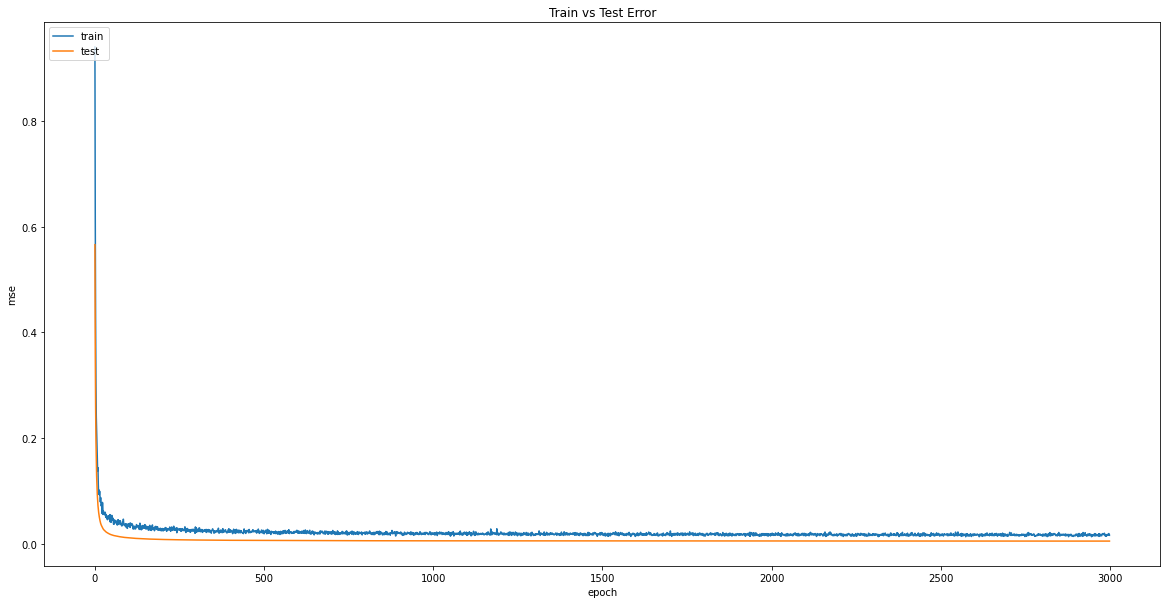

In [35]:
plt.figure(figsize=(20,10))
plt.plot(histories['5_layered_dropout'].history['mse'])
plt.plot(histories['5_layered_dropout'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

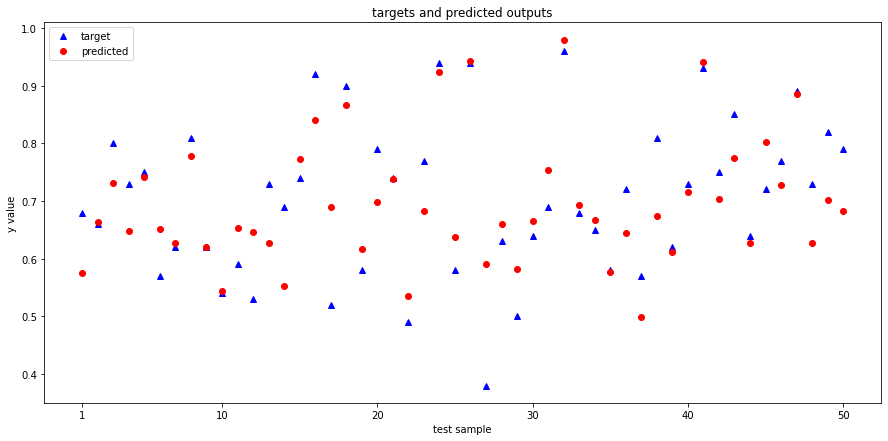

In [36]:
y_pred = model.predict(X_test)

plt.figure(figsize=(15,7))
for i in range(0,50):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, y_pred[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40,50])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

## m.s.e of all networks

In [37]:
print("Validation accuracy of 3-layered network: " + str(accuracies[0]))
print("Validation accuracy of 4-layered network without dropouts: " + str(accuracies[1]))
print("Validation accuracy of 5-layered network without dropouts: " + str(accuracies[2]))
print("Validation accuracy of 4-layered network with dropouts: " + str(accuracies[3]))
print("Validation accuracy of 5-layered network with dropouts: " + str(accuracies[4]))

Validation accuracy of 3-layered network: 0.0102140037342906
Validation accuracy of 4-layered network without dropouts: 0.007382259238511324
Validation accuracy of 5-layered network without dropouts: 0.007046908140182495
Validation accuracy of 4-layered network with dropouts: 0.007067261263728142
Validation accuracy of 5-layered network with dropouts: 0.005137385334819555


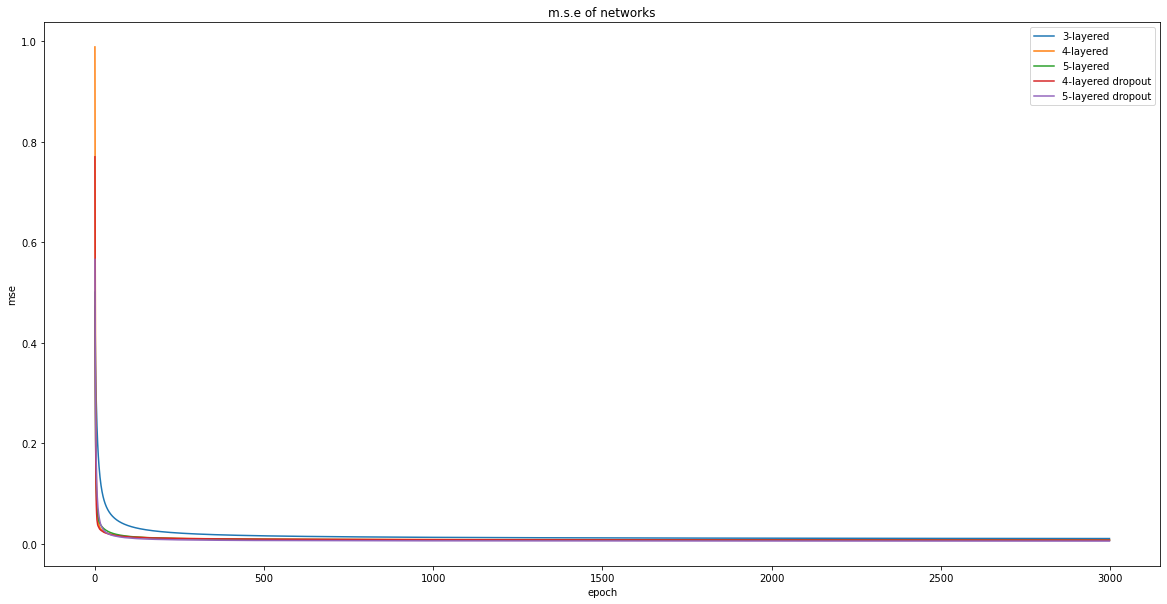

In [40]:
plt.figure(figsize=(20,10))
plt.plot(histories['3_layered'].history['val_mse'])
plt.plot(histories['4_layered'].history['val_mse'])
plt.plot(histories['5_layered'].history['val_mse'])
plt.plot(histories['4_layered_dropout'].history['val_mse'])
plt.plot(histories['5_layered_dropout'].history['val_mse'])
plt.title('m.s.e of networks')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['3-layered', '4-layered','5-layered','4-layered dropout','5-layered dropout'], loc='upper right')
plt.show()